
add zero section -9717.0 123.0
:::::::
outer cycle 0 0
add one section -9630.0 -304.0
inner cycle 1
do wall to right
:::::::
outer cycle 1 1
add one section -9548.0 -356.0
inner cycle 2
do merge right right
:::::::
outer cycle 1 2
add one section -9338.0 -1124.0
inner cycle 2
do merge right right
:::::::
outer cycle 1 3
add one section -9204.0 -952.0
inner cycle 2
do (make pool)
fill_pool 518130.0
fill mkdict(h=-1.124e+03, minl=0.0, maxl=0.0) mkdict(h=-952.0, minl=181.0, maxl=181.0) 15568.6875
do toright (fill pool)
:::::::
outer cycle 1 4
add one section -8951.0 -815.0
inner cycle 2
do (make pool)
fill_pool 758091.3125
fill mkdict(h=-952.0, minl=181.0, maxl=181.0) mkdict(h=-815.0, minl=471.5, maxl=471.5) 44697.85546875
do toright (fill pool)
:::::::
outer cycle 1 5
add one section -8839.0 -1328.0
inner cycle 2
do merge right right
:::::::
outer cycle 1 6
add one section -8621.0 -500.0
inner cycle 2
do (make pool)
fill_pool 1046693.45703125
fill mkdict(h=-1.328e+03, minl=0.0, maxl=0.0

C:\Users\FeelUs\AppData\Local\Temp\ipykernel_4800\1346643969.py:211: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,7))


do (make pool)
fill_pool 933209.0285714285
fill mkdict(h=1.621e+03, minl=0.0, maxl=0.0) mkdict(h=1.88e+03, minl=315.2, maxl=315.2) 40823.40340909091
fill mkdict(h=1.88e+03, minl=315.2, maxl=315.2) mkdict(h=2.181e+03, minl=605.3, maxl=756.8) 138536.96022727274
fill mkdict(h=2.181e+03, minl=605.3, maxl=756.8) mkdict(h=2.325e+03, minl=856.9, maxl=856.9) 116188.55064935064
do toright (fill pool)
:::::::
outer cycle 3 19
add one section -5838.0 1980.0
inner cycle 4
do merge right right
:::::::
outer cycle 3 20
add one section -5735.0 1822.0
inner cycle 4
do merge right right
:::::::
outer cycle 3 21
add one section -5686.0 2184.0
inner cycle 4
do (make pool)
fill_pool 1067920.1142857142
fill mkdict(h=1.822e+03, minl=0.0, maxl=0.0) mkdict(h=1.98e+03, minl=124.4, maxl=124.4) 9826.552486187846
fill mkdict(h=1.98e+03, minl=124.4, maxl=124.4) mkdict(h=2.184e+03, minl=314.0, maxl=314.0) 44717.221426855634
do toright (fill pool)
:::::::
outer cycle 3 22
add one section -5544.0 2108.0
inner cycle 4

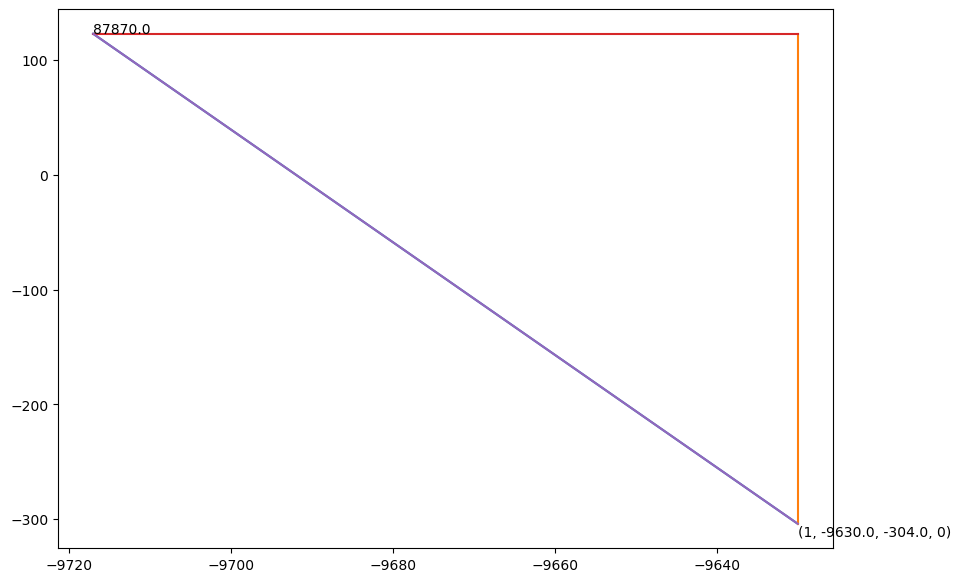

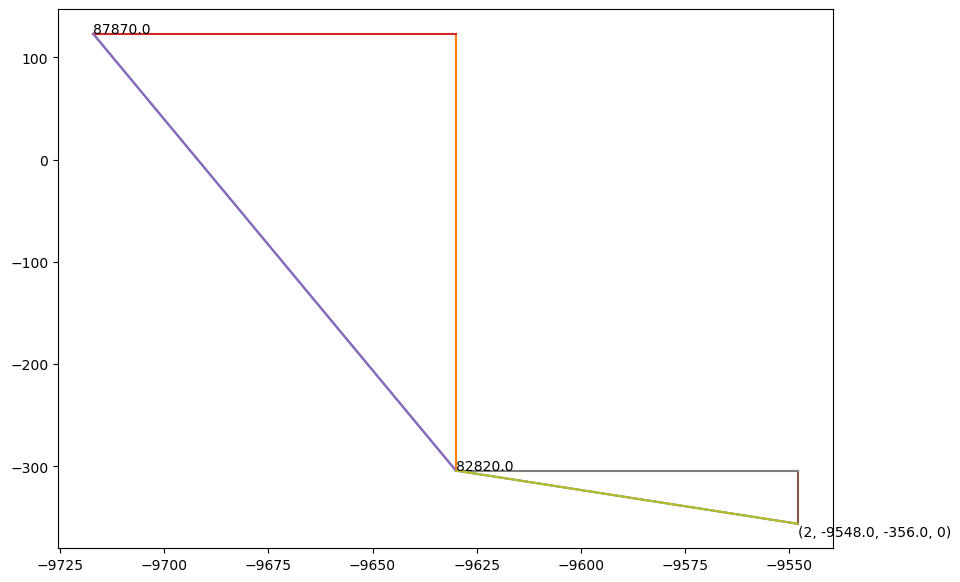

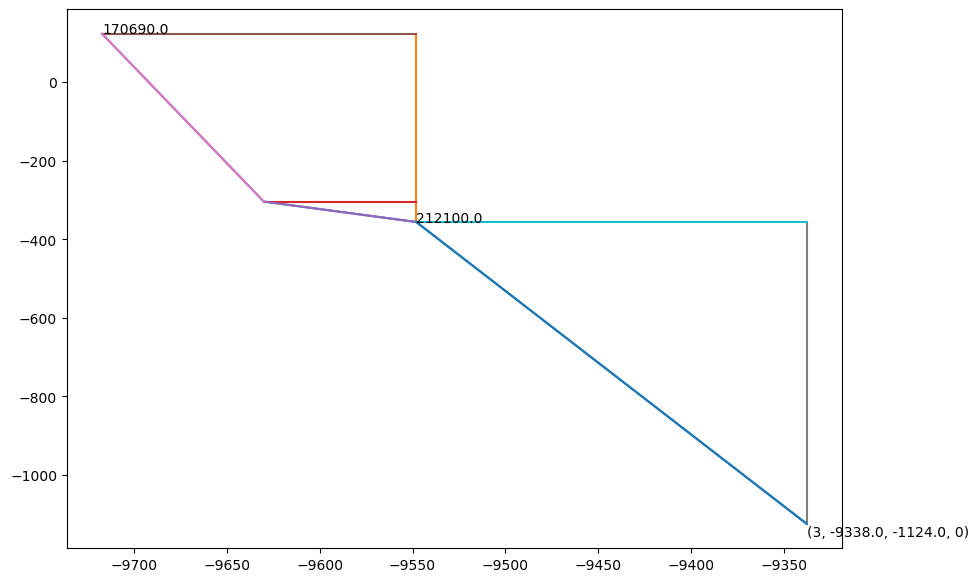

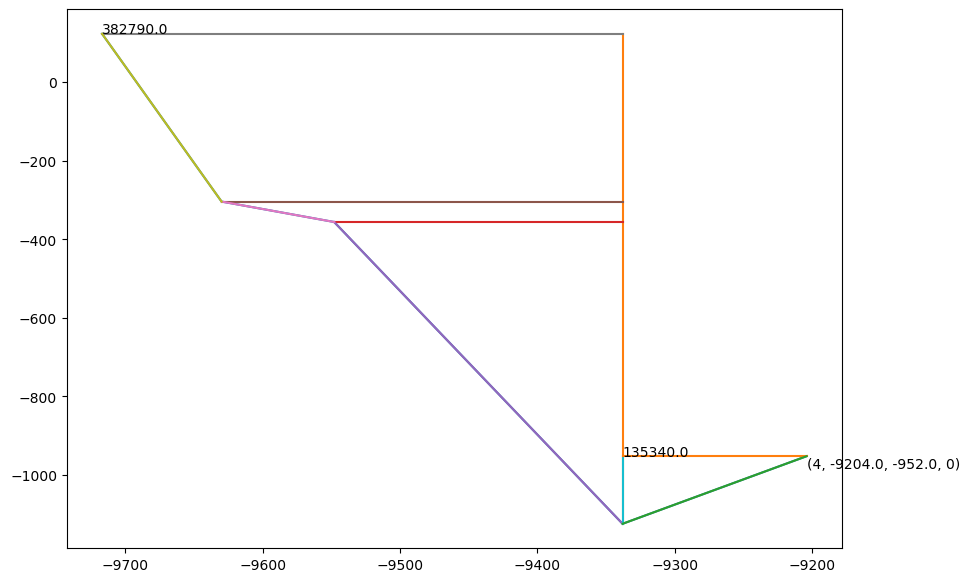

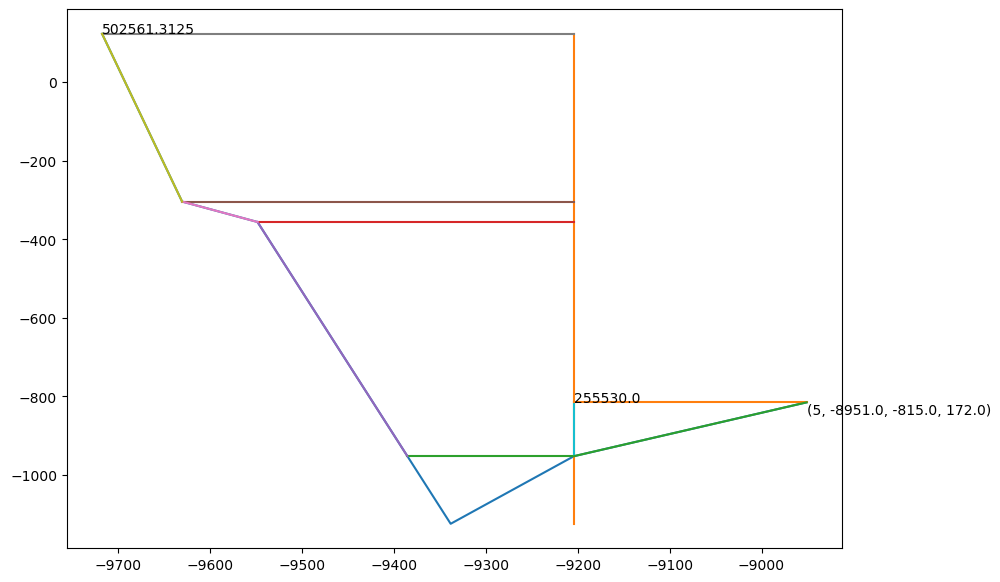

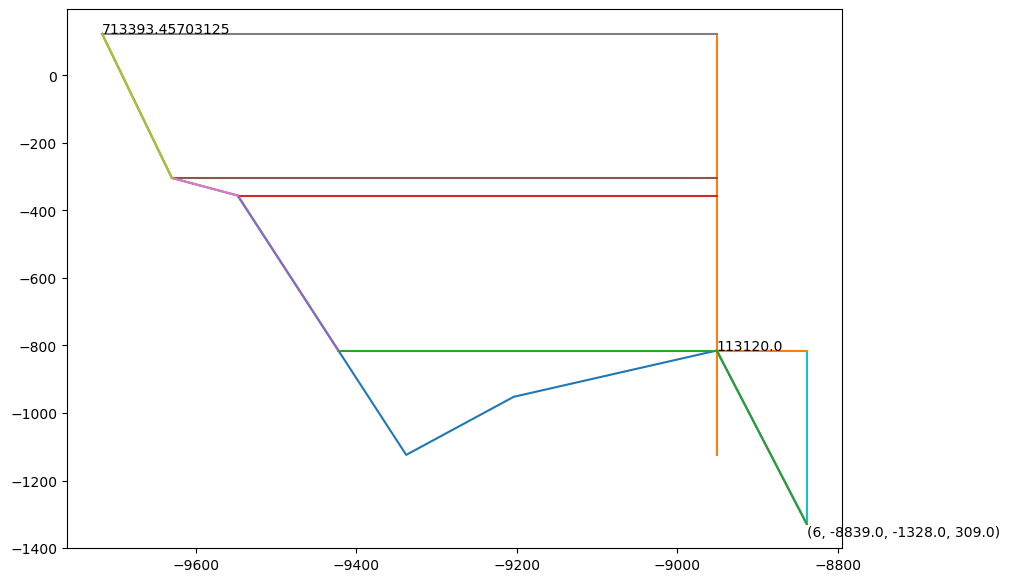

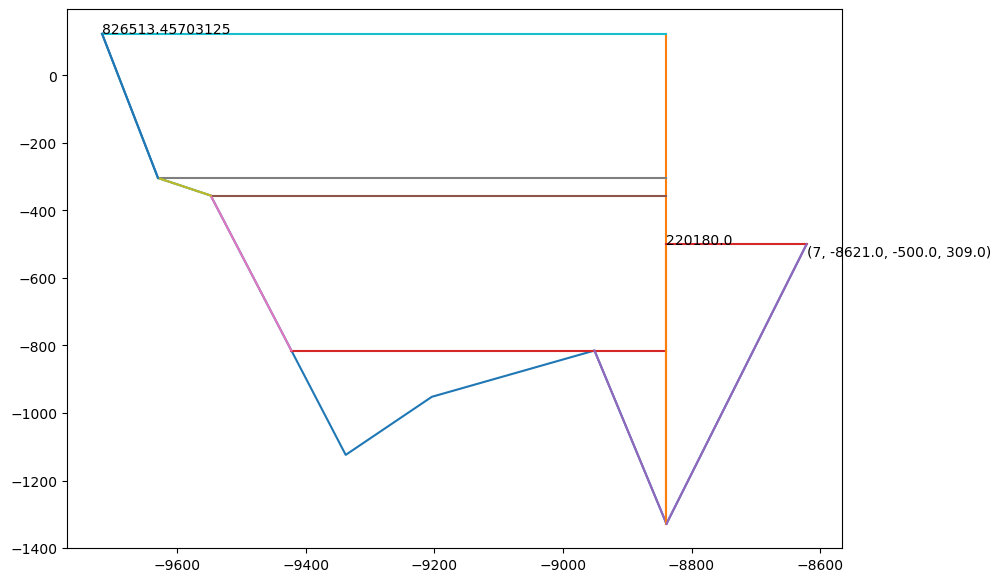

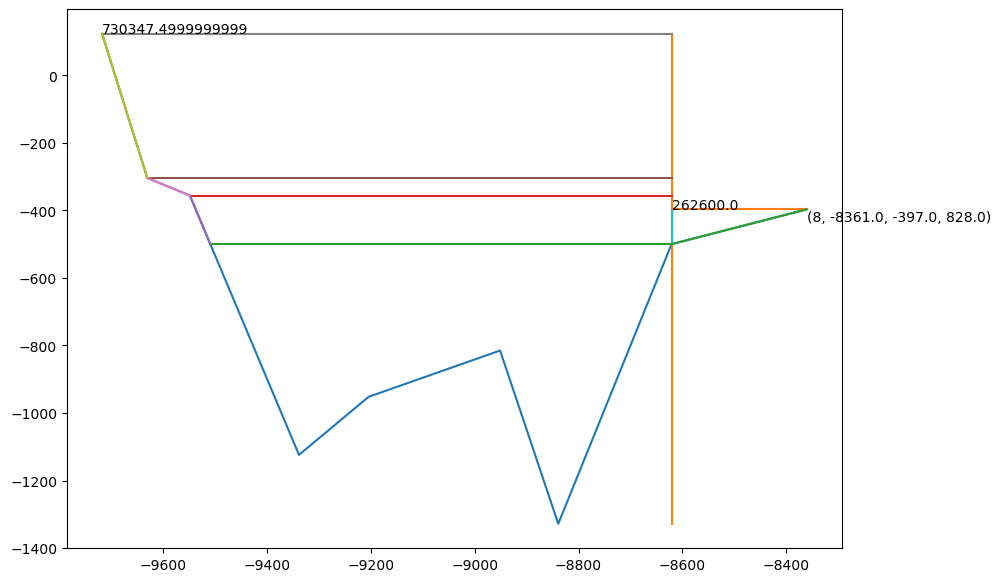

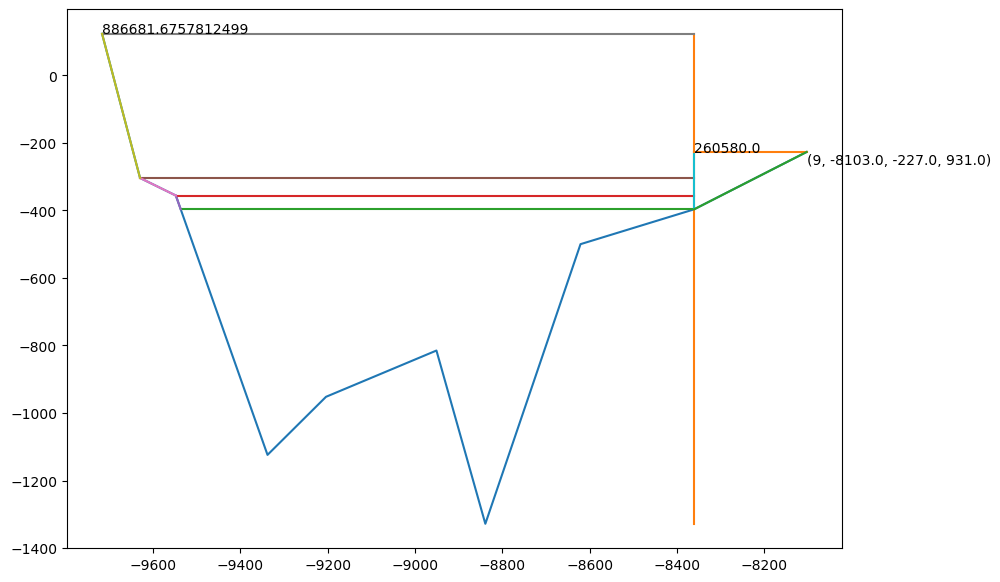

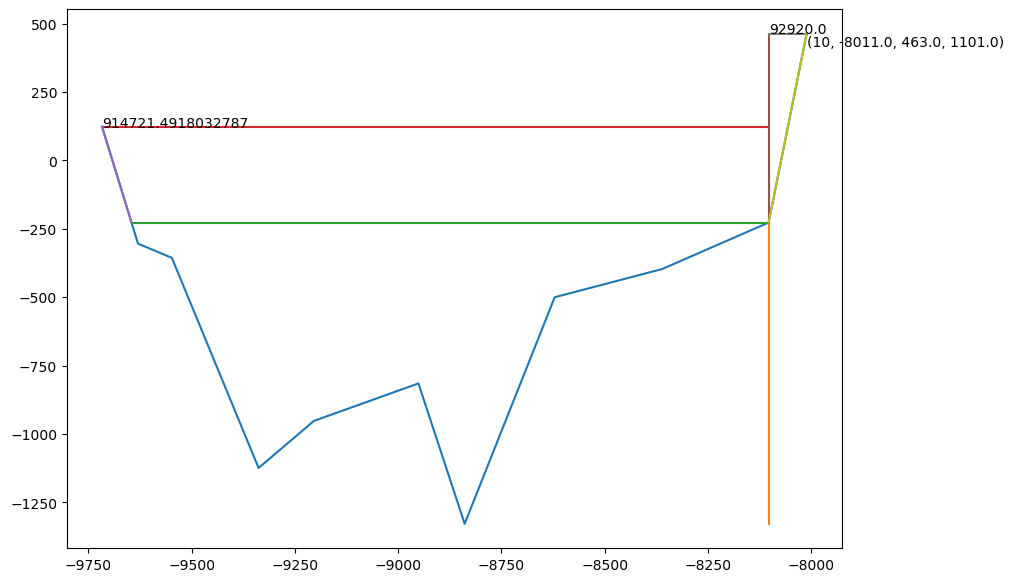

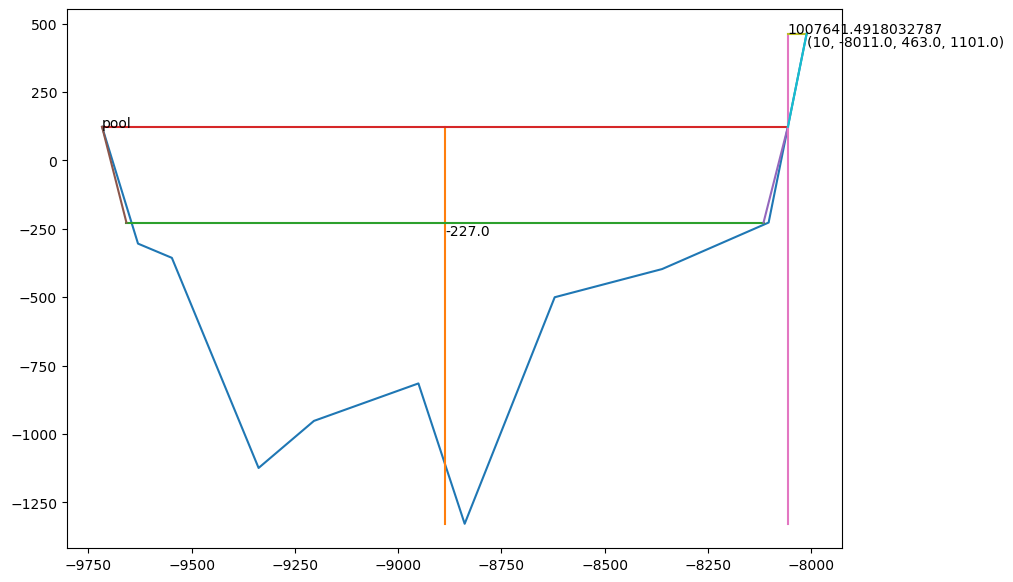

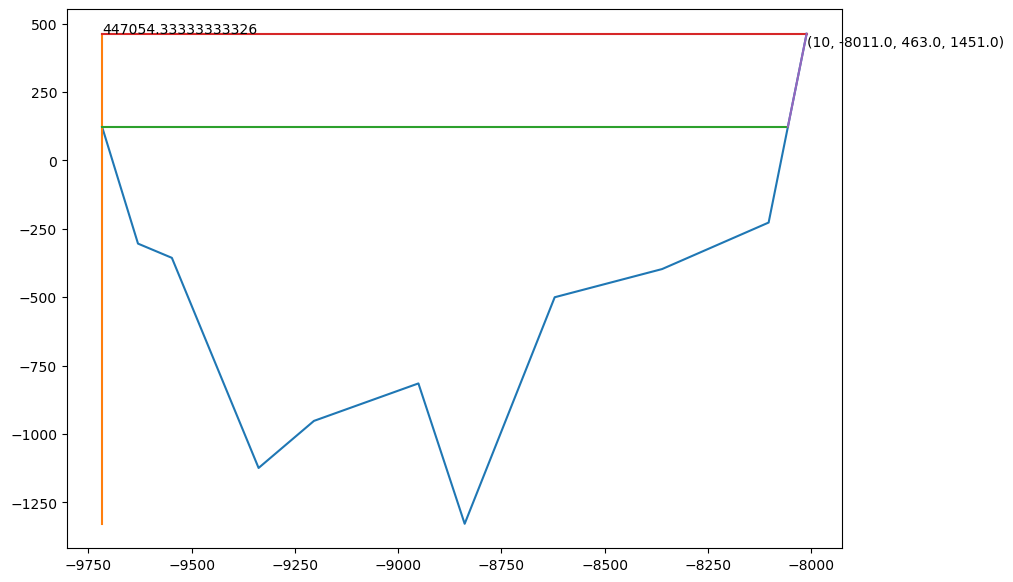

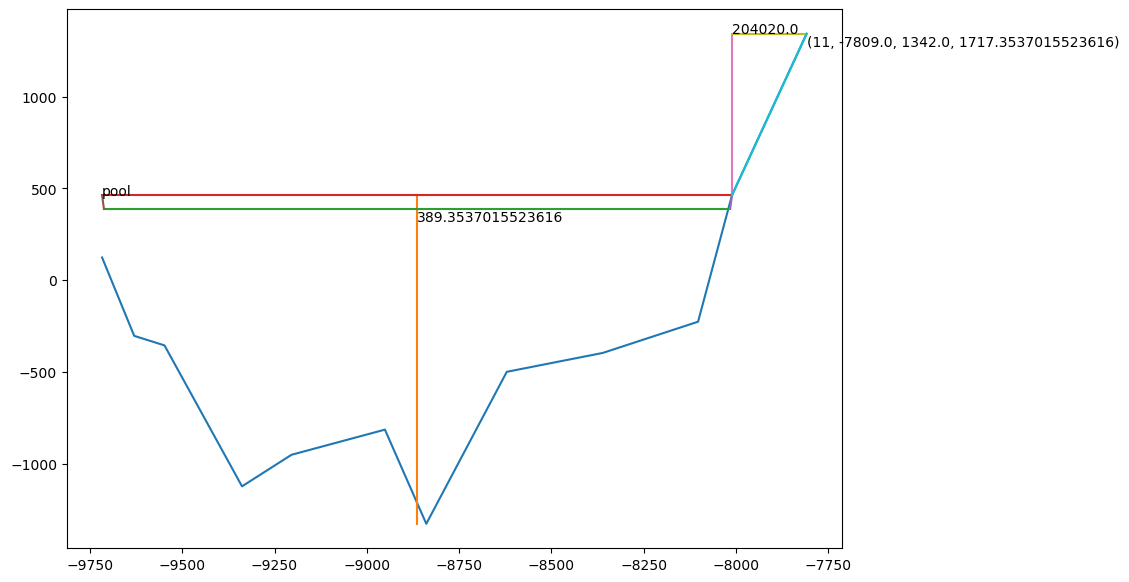

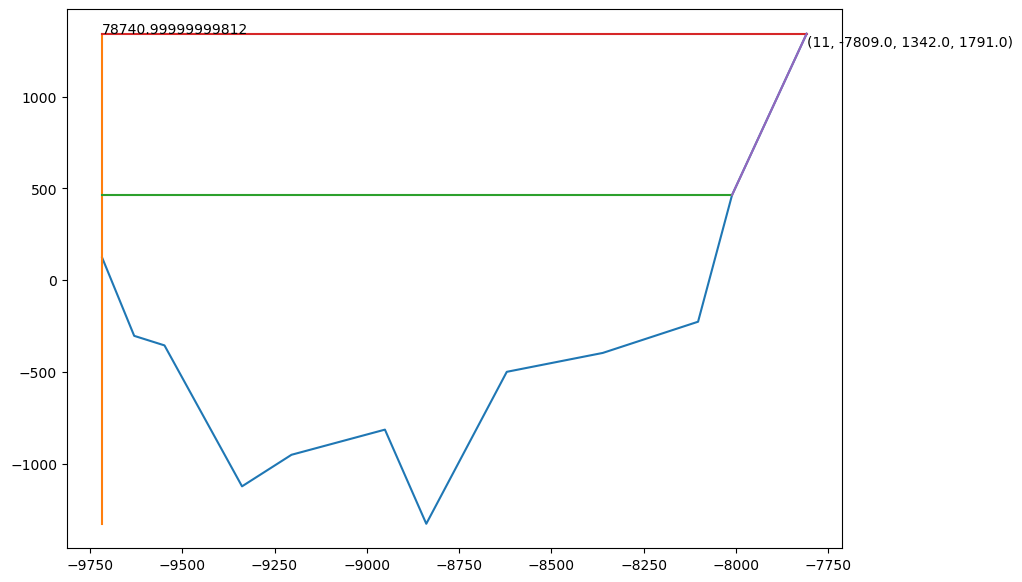

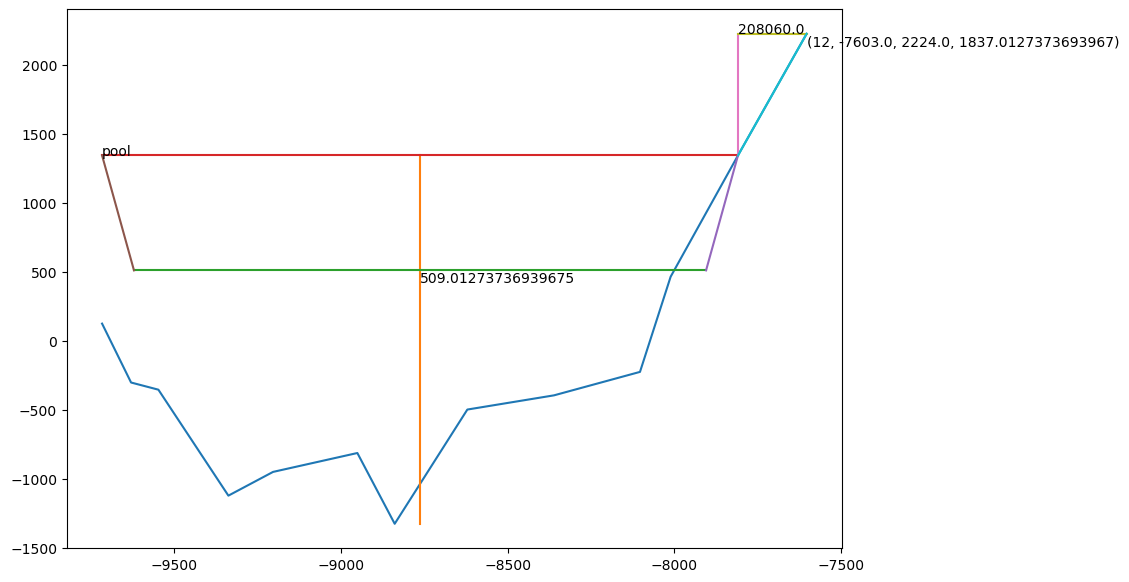

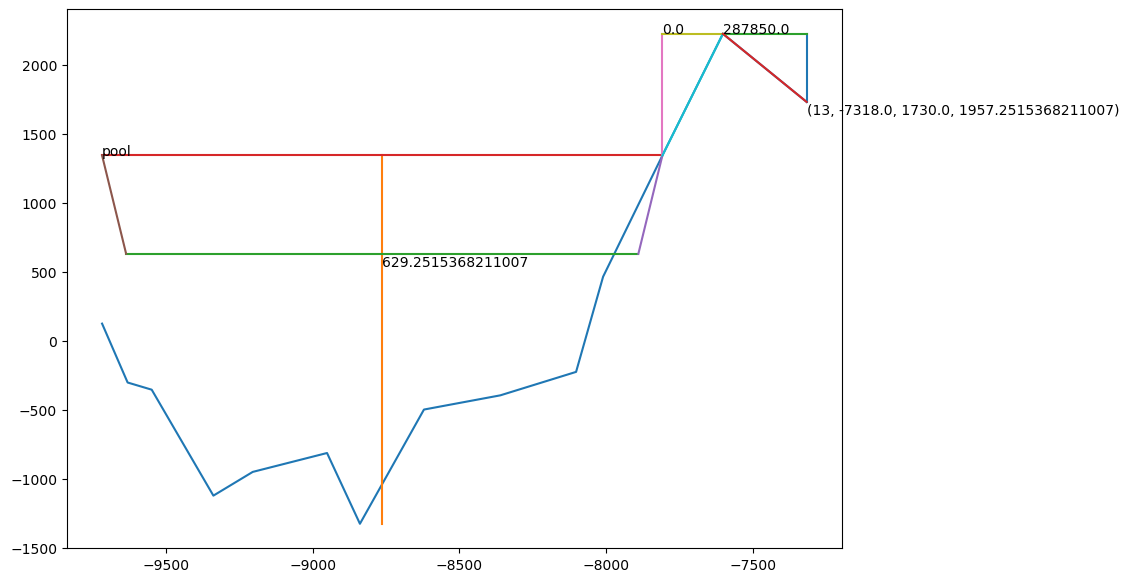

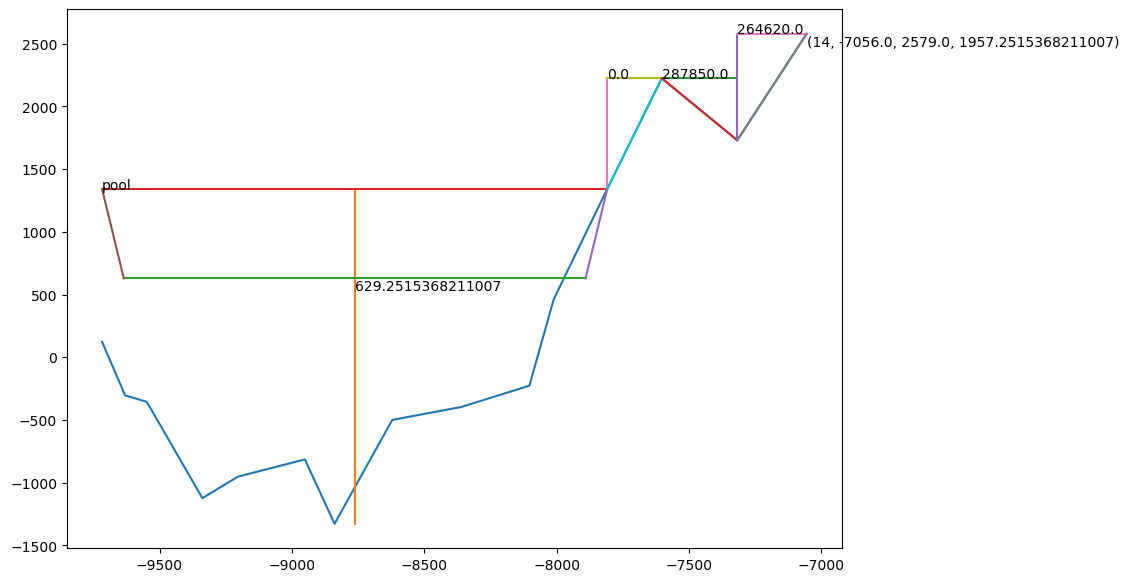

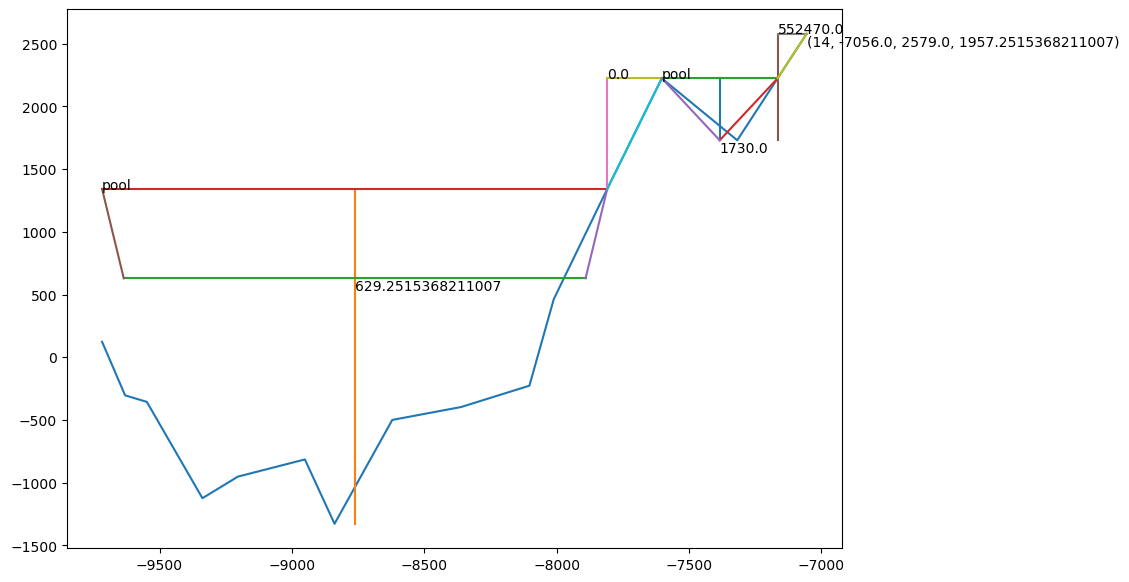

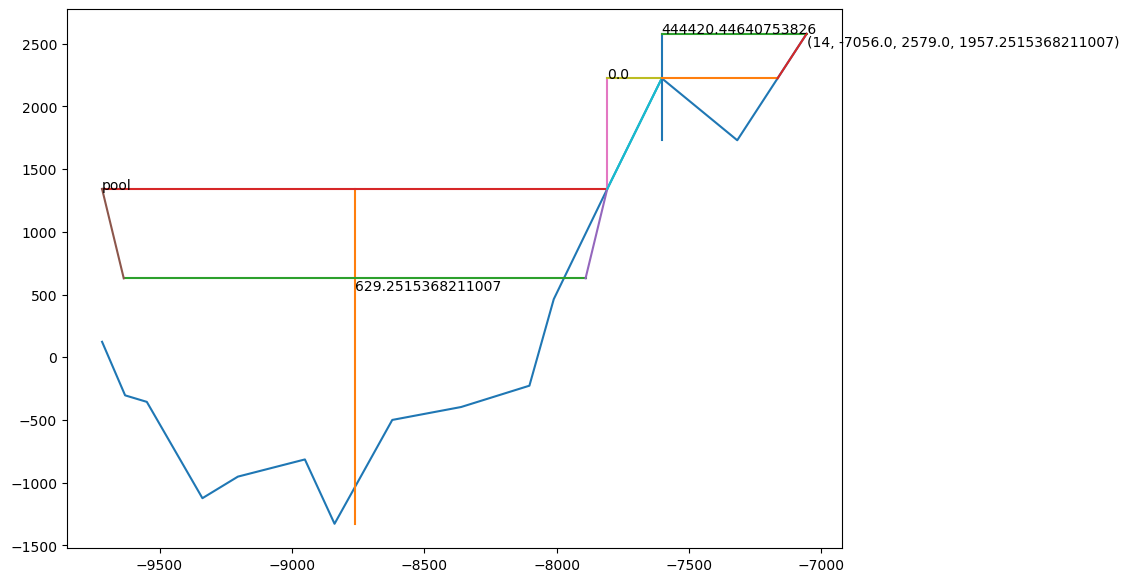

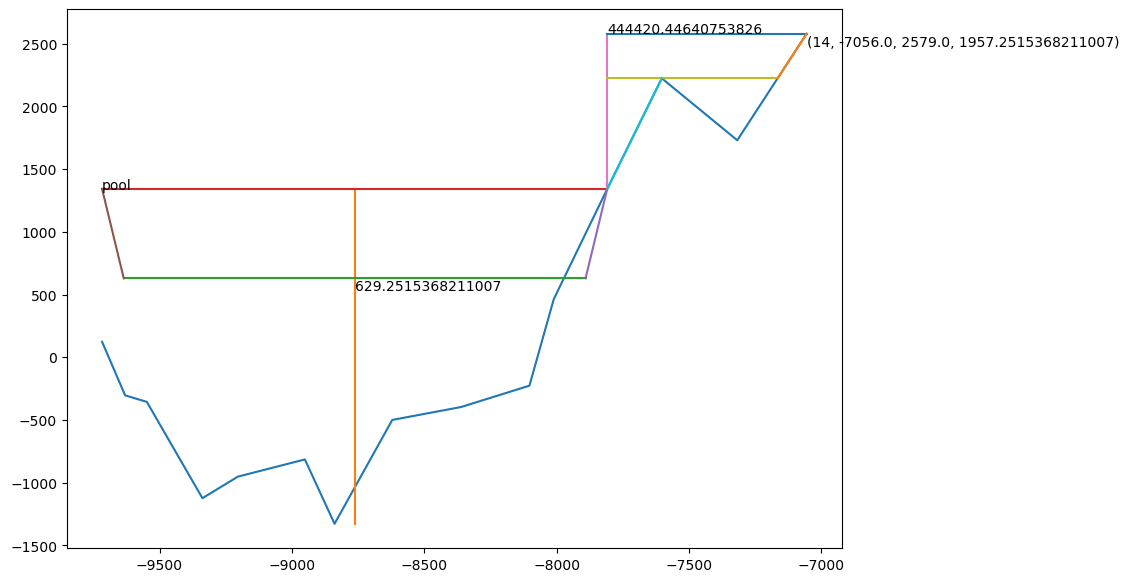

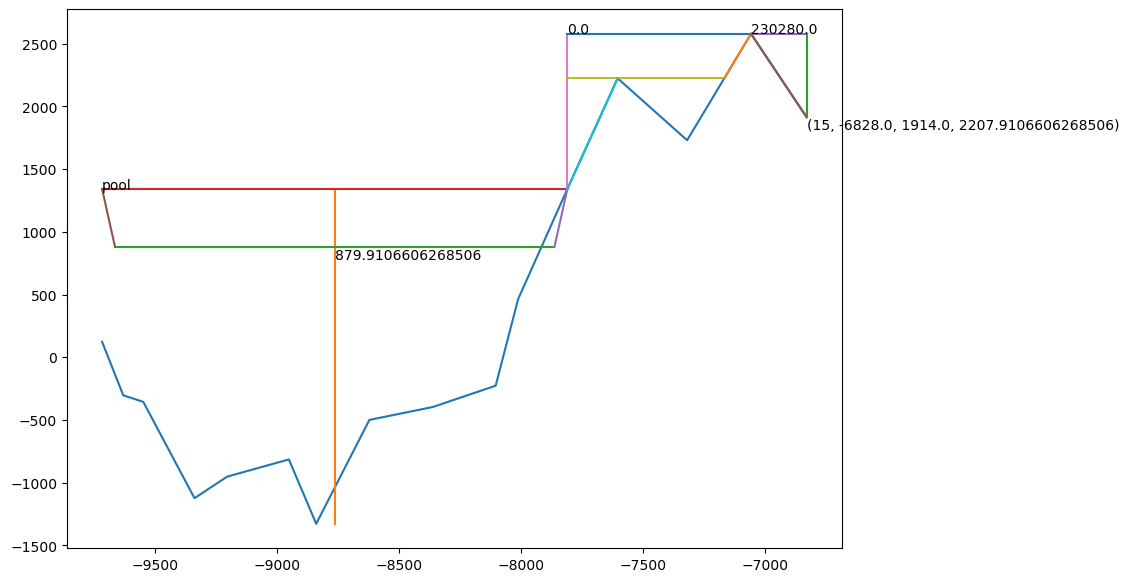

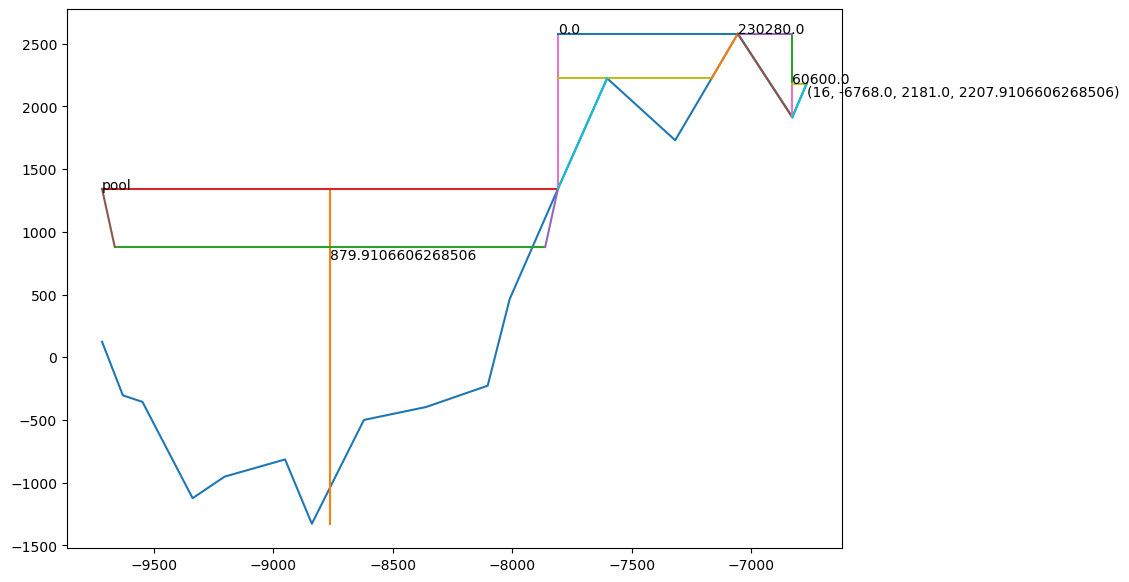

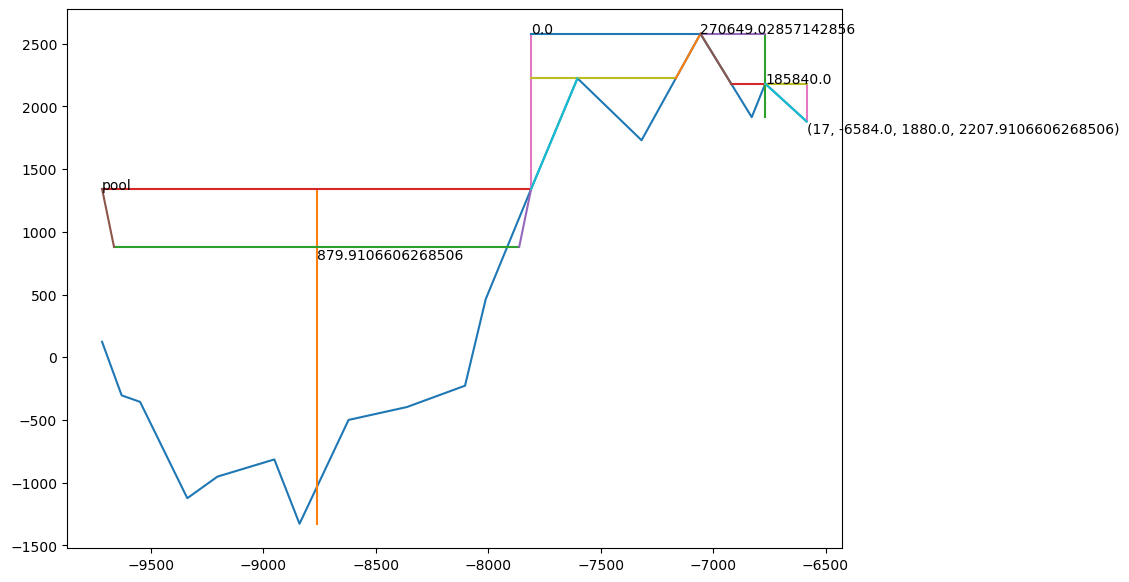

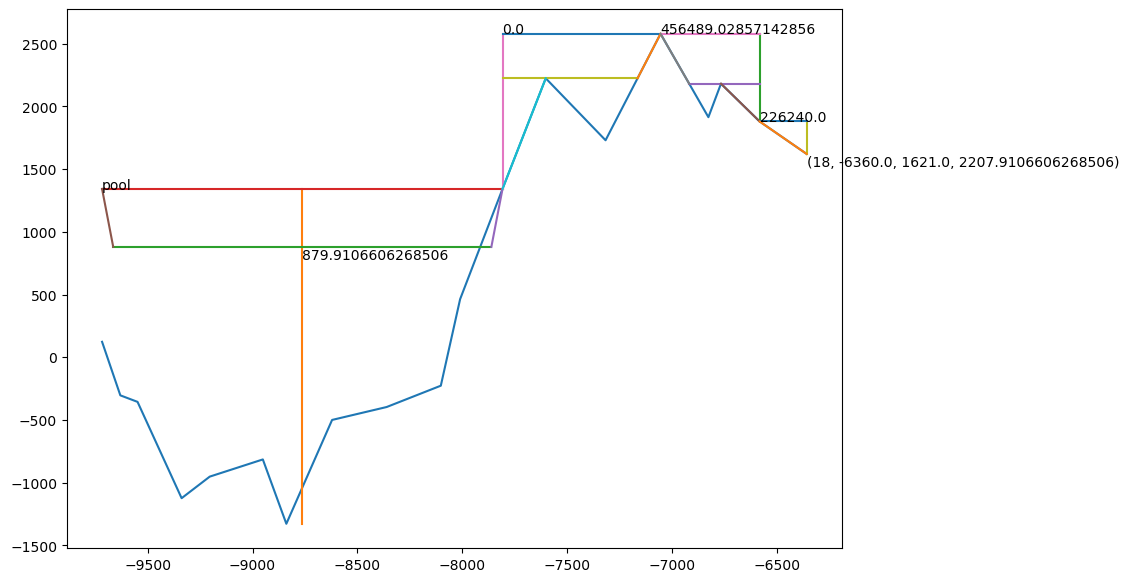

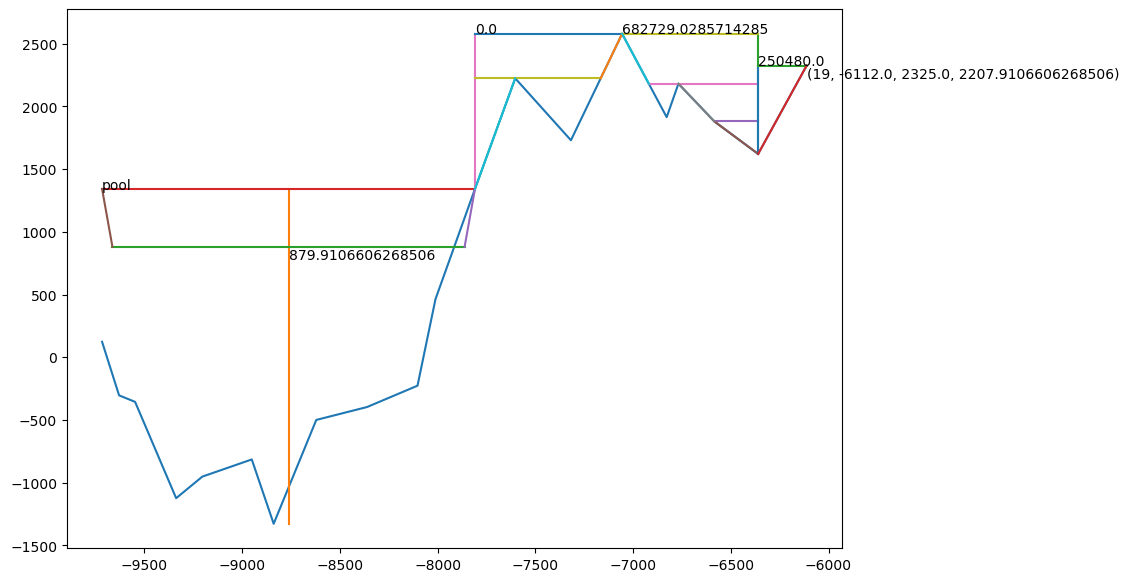

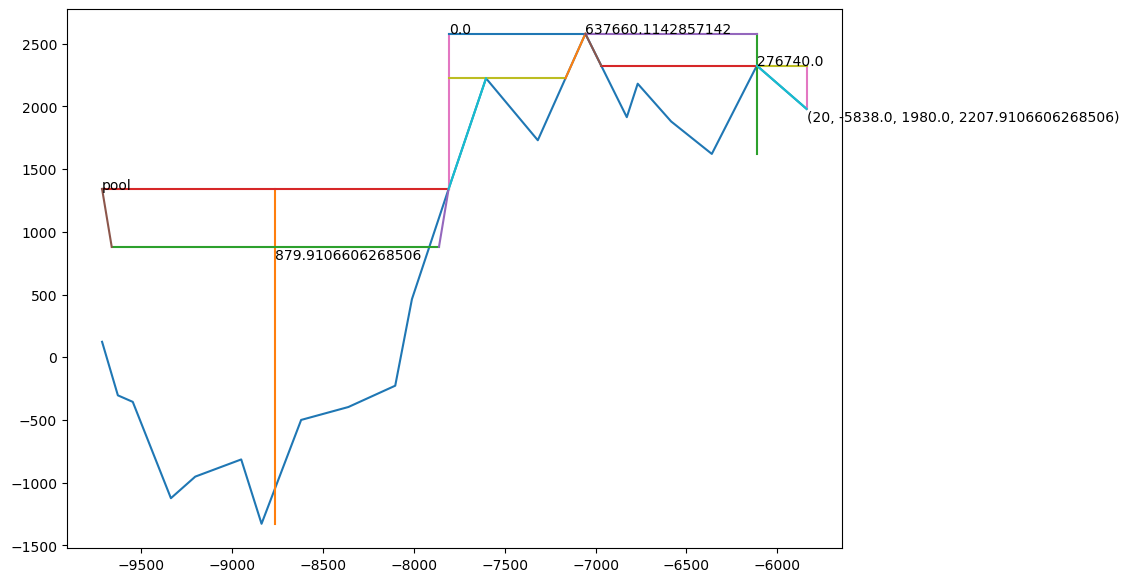

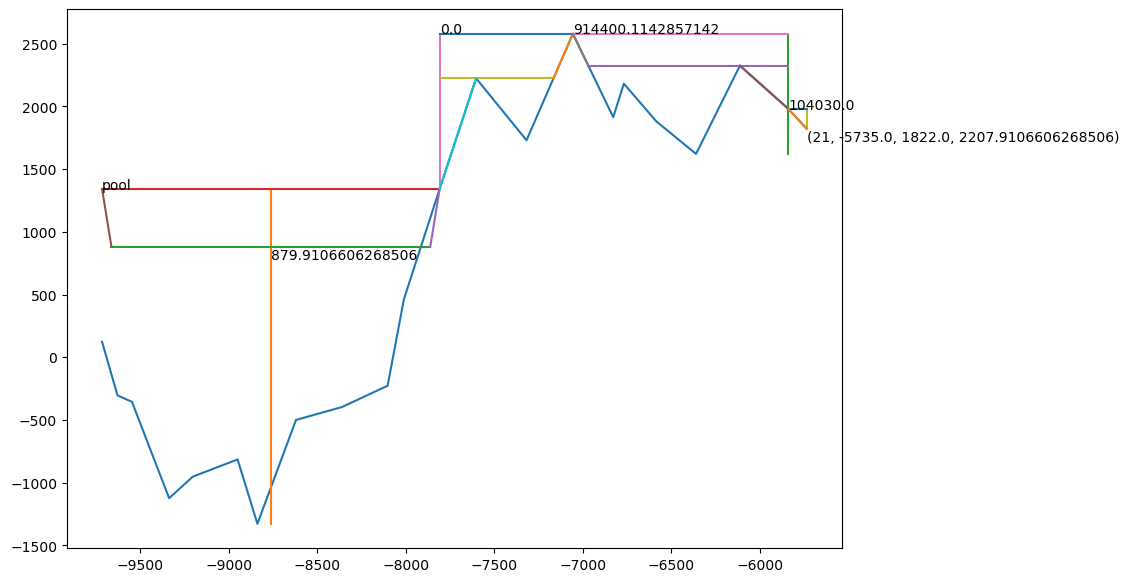

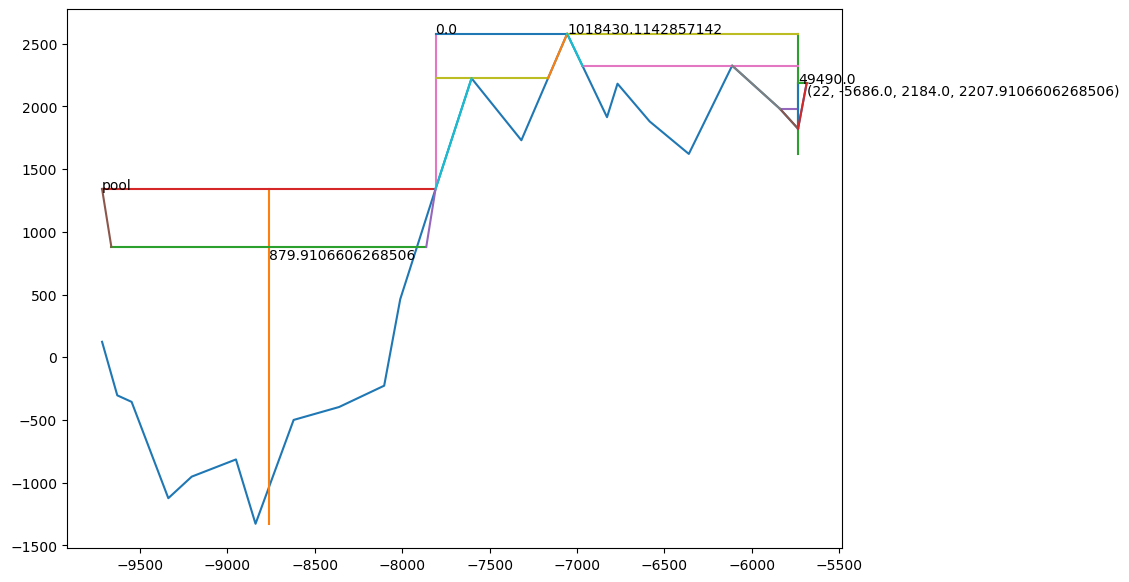

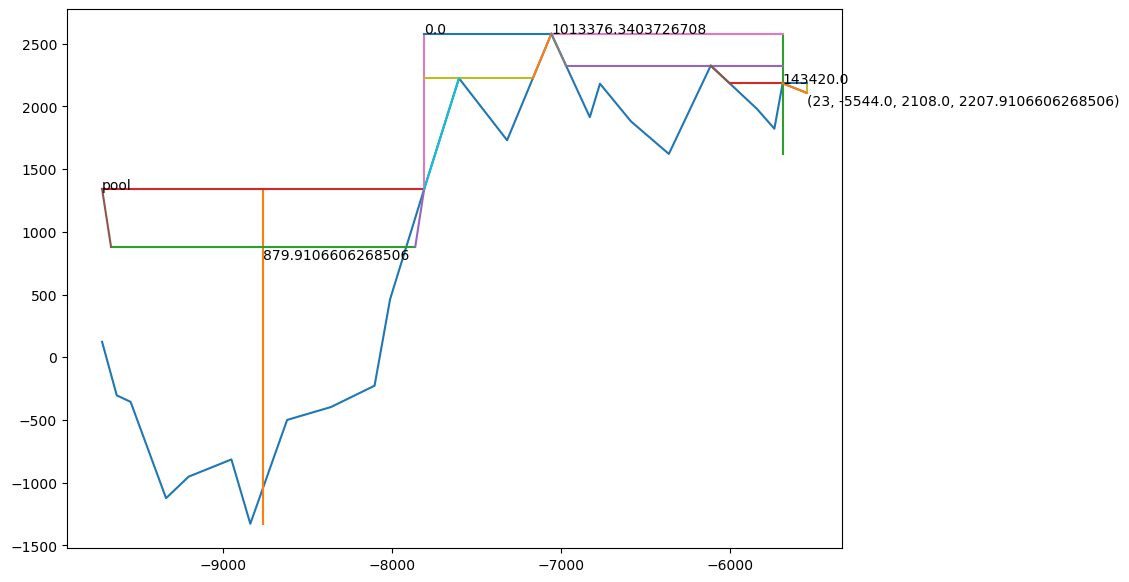

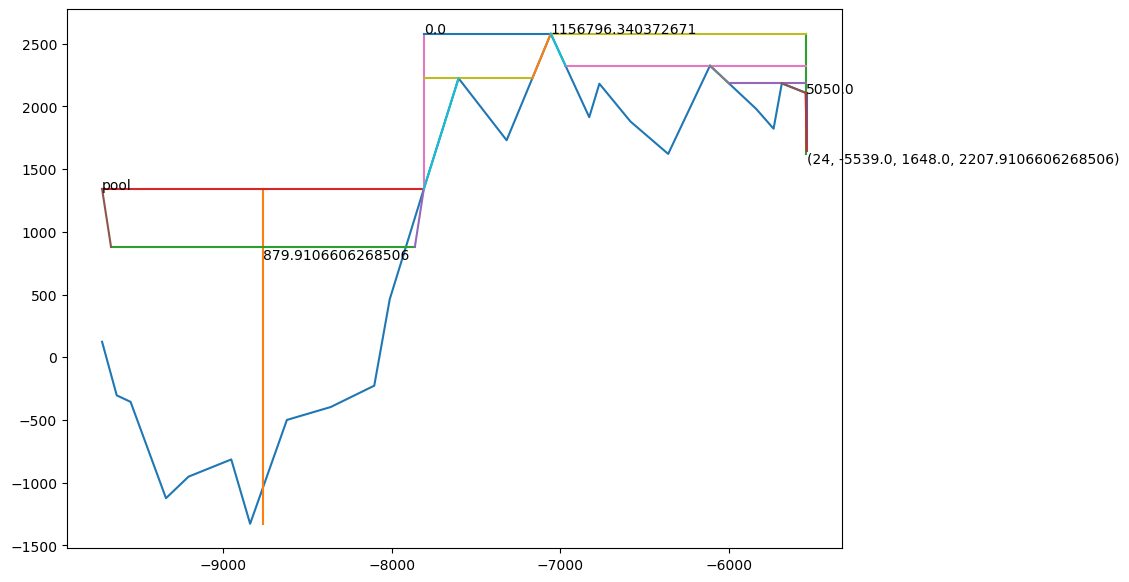

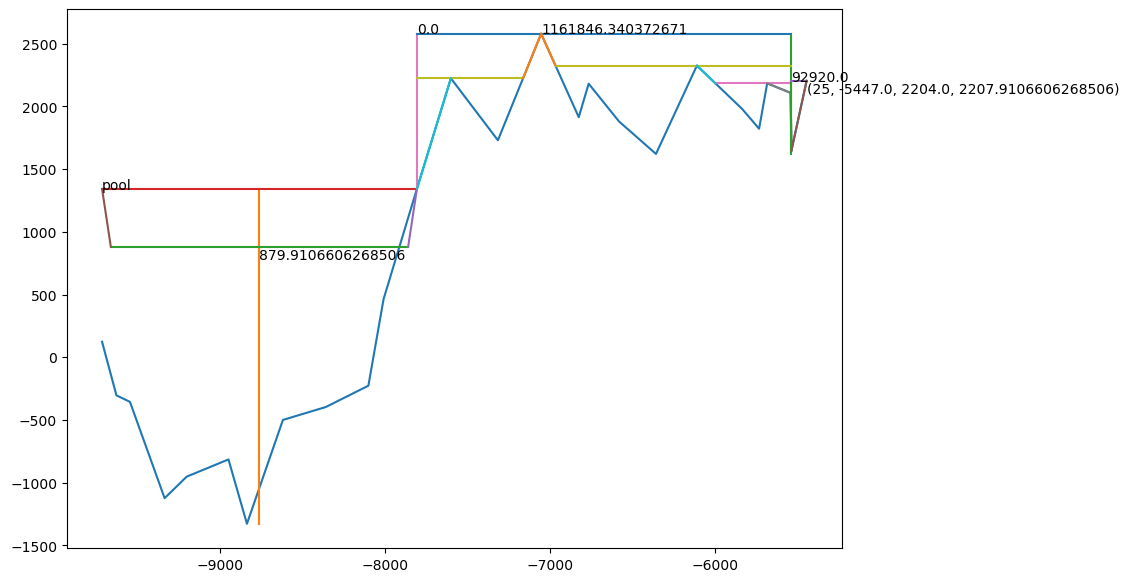

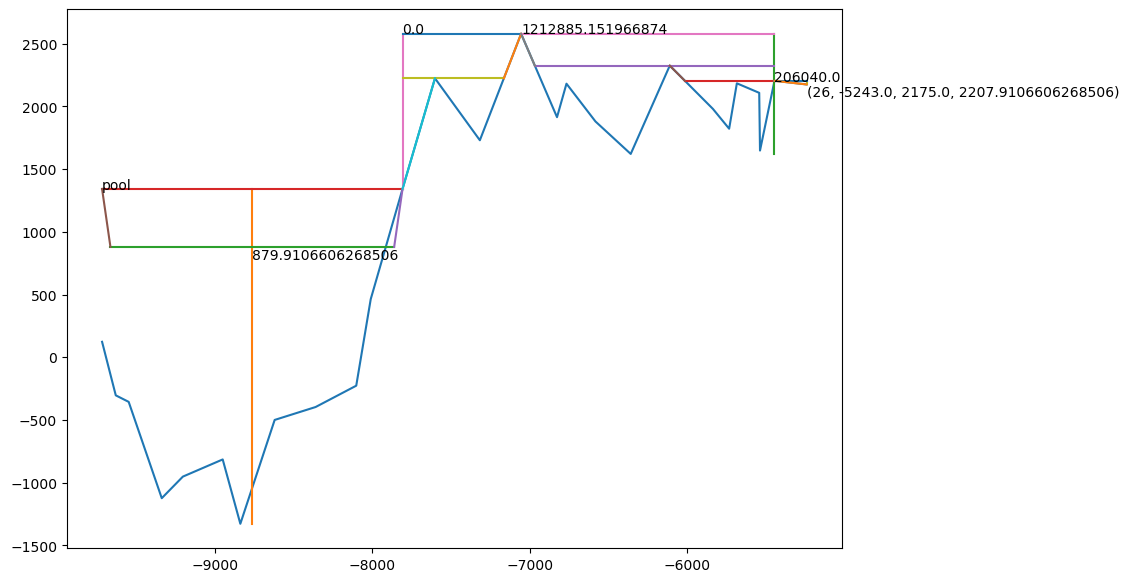

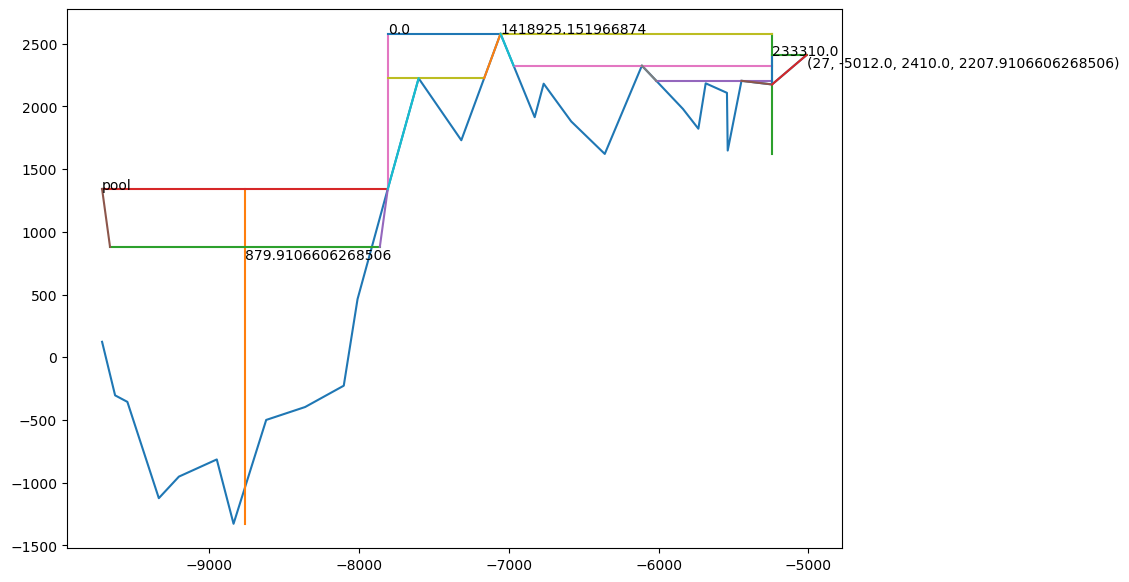

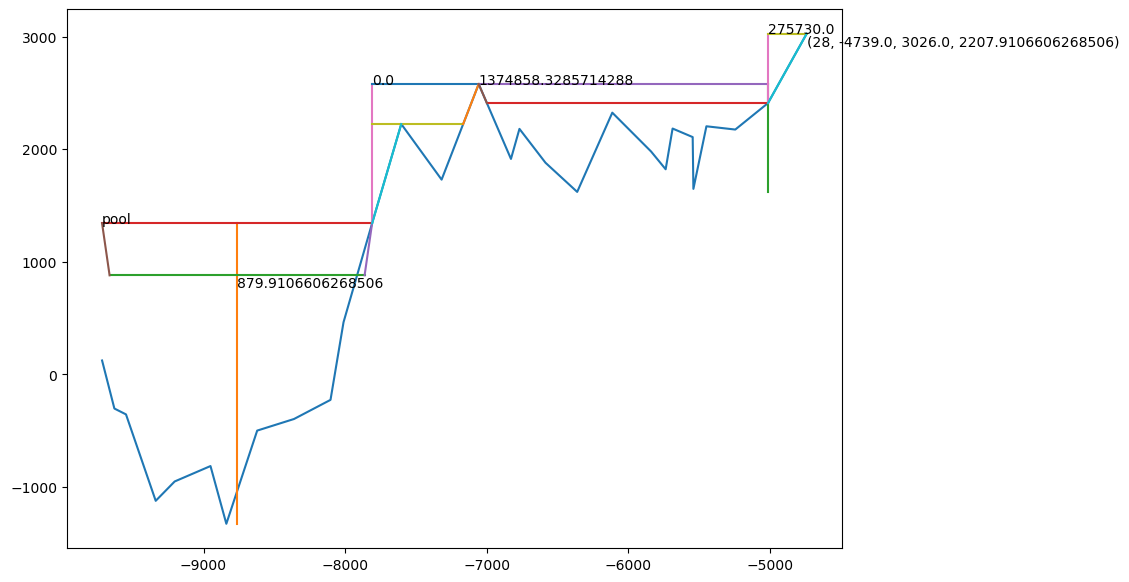

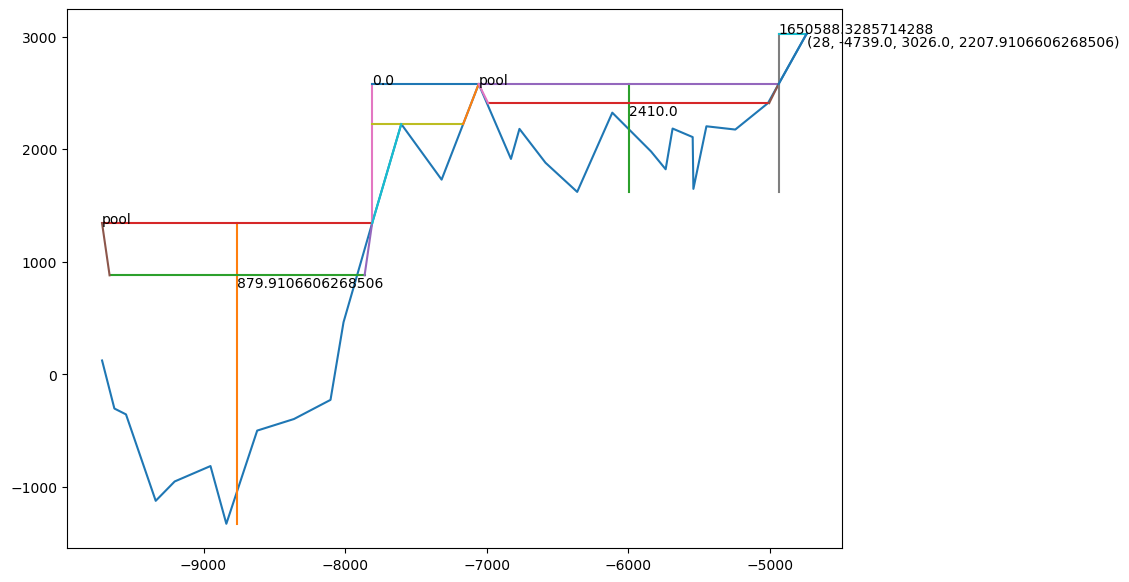

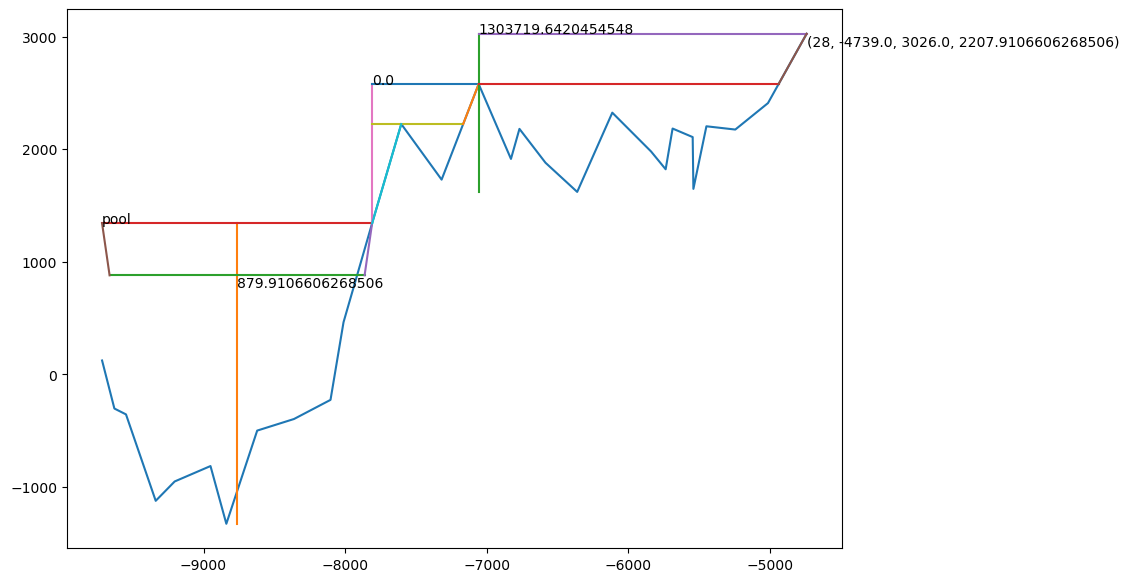

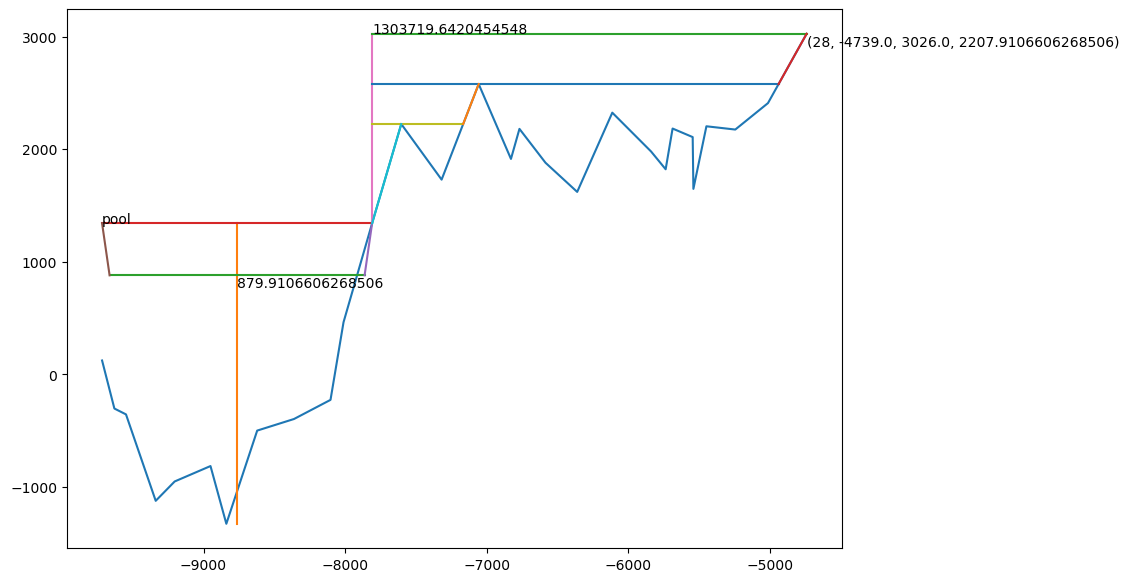

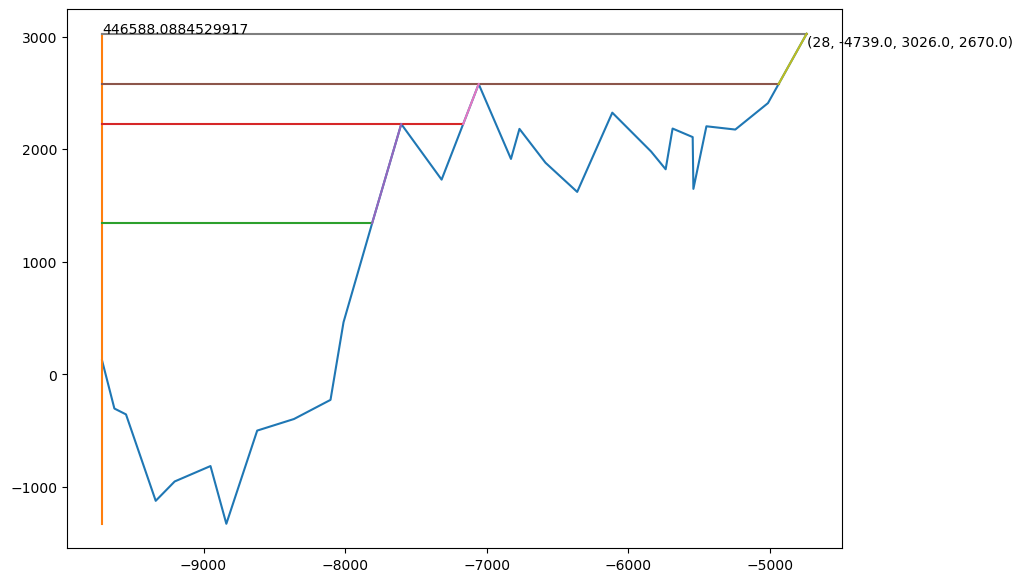

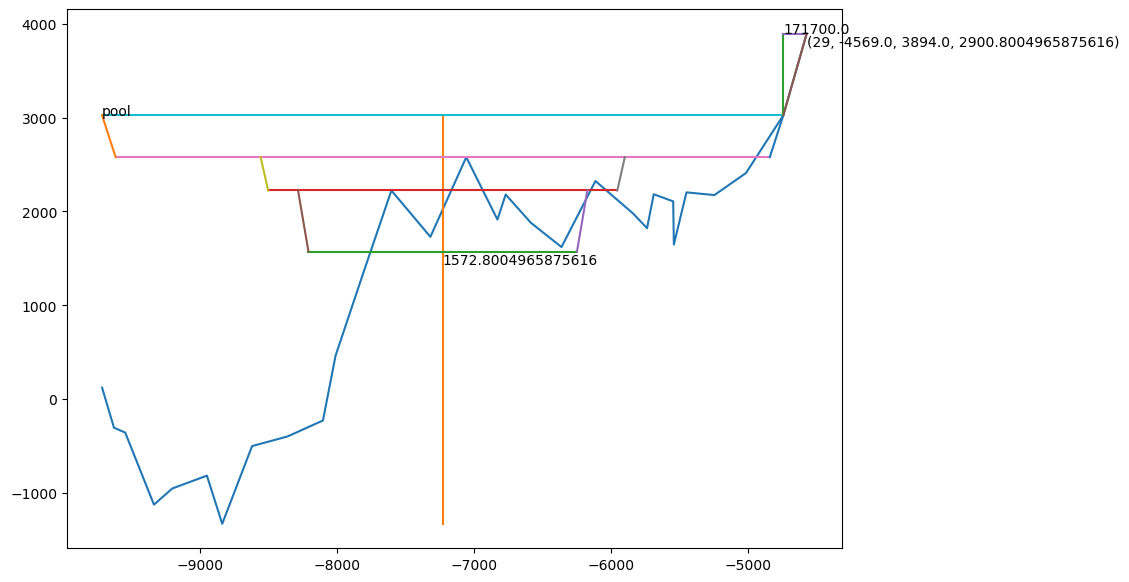

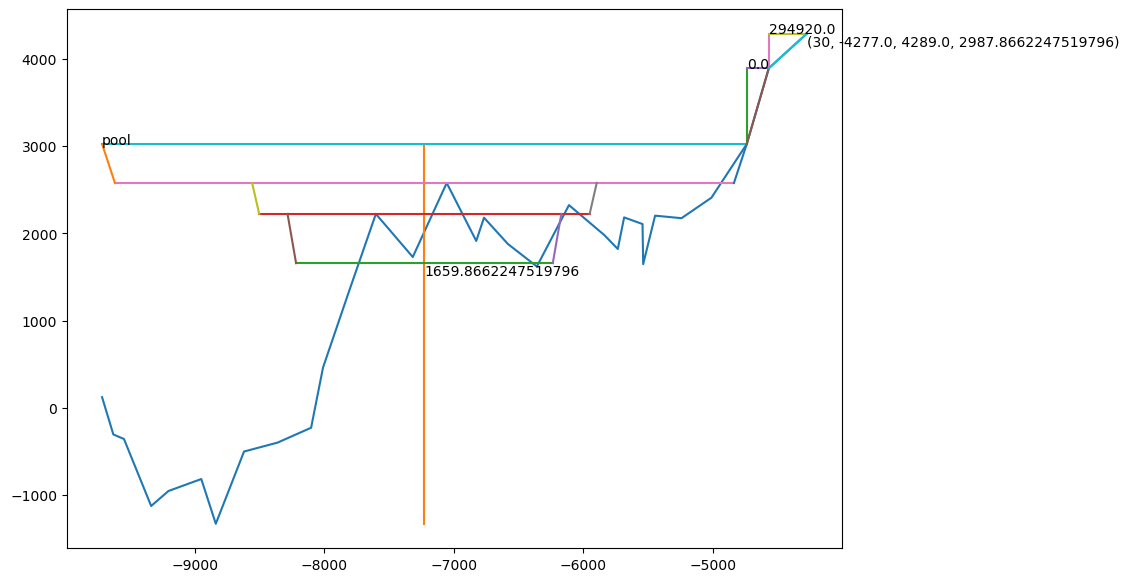

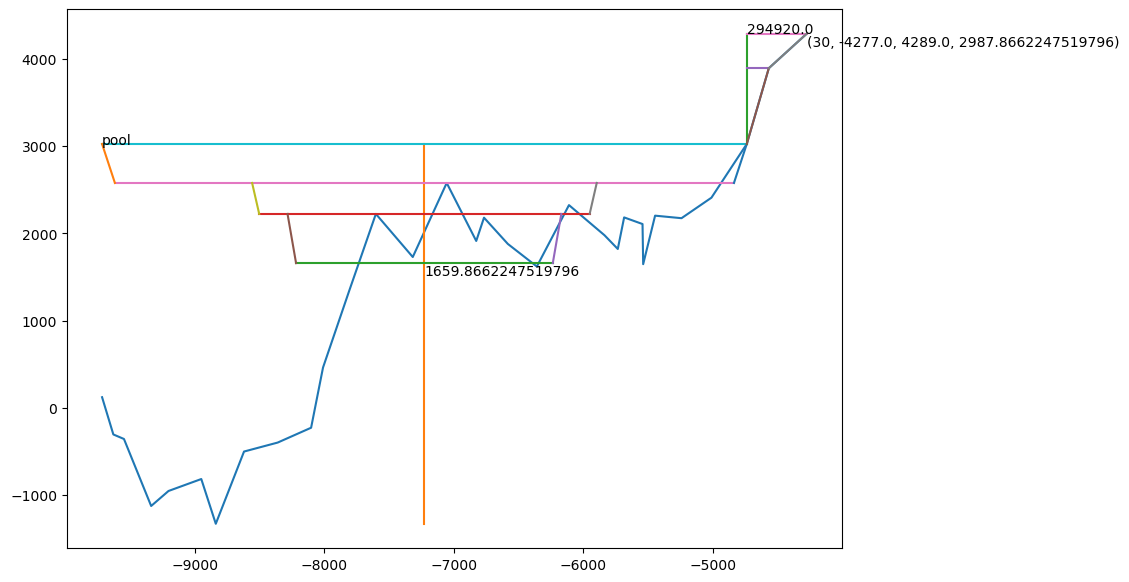

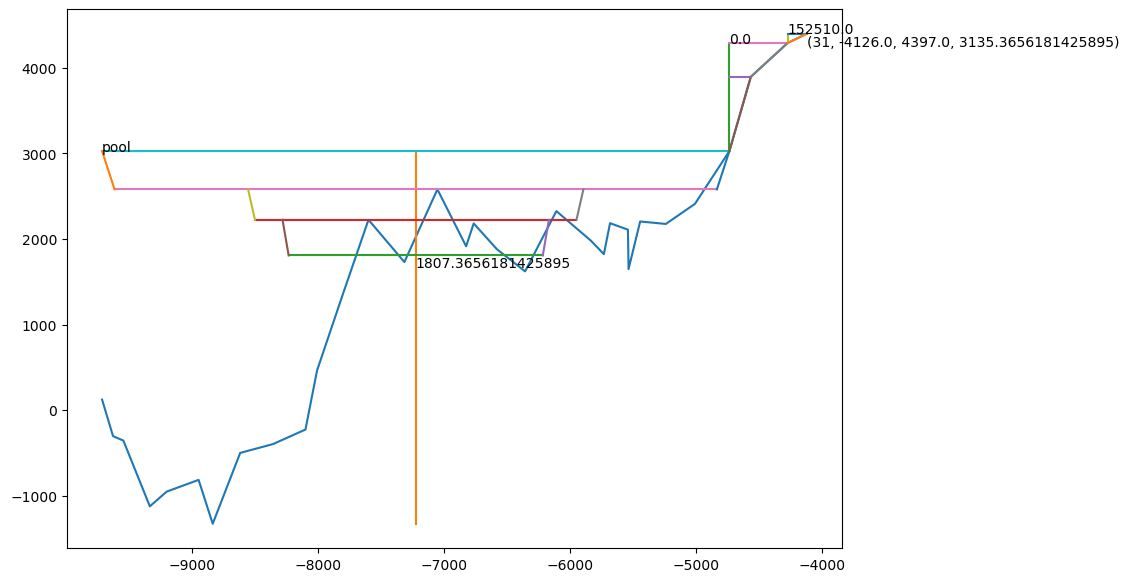

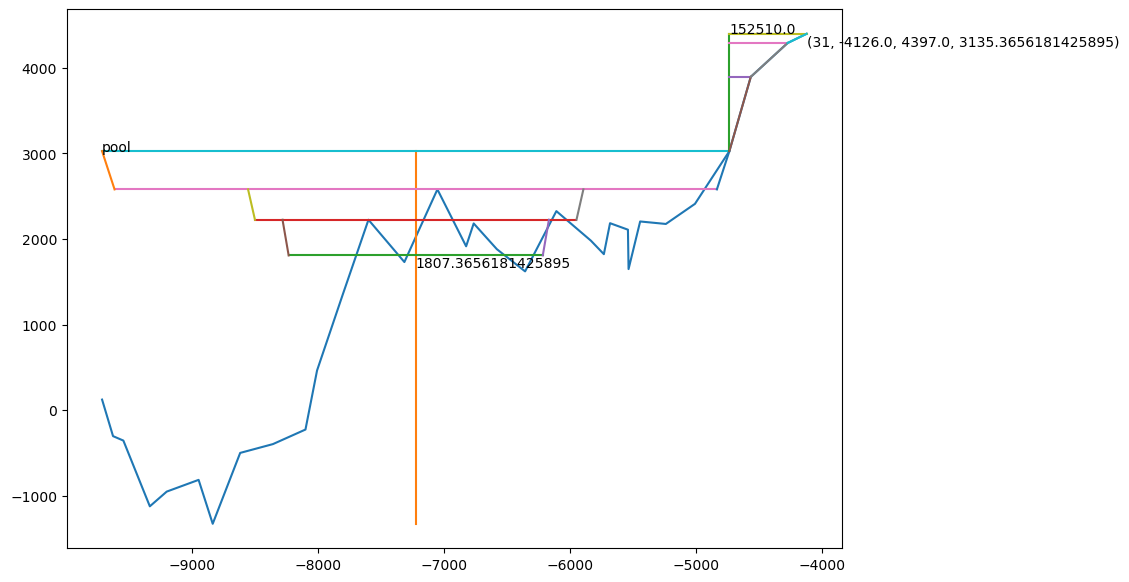

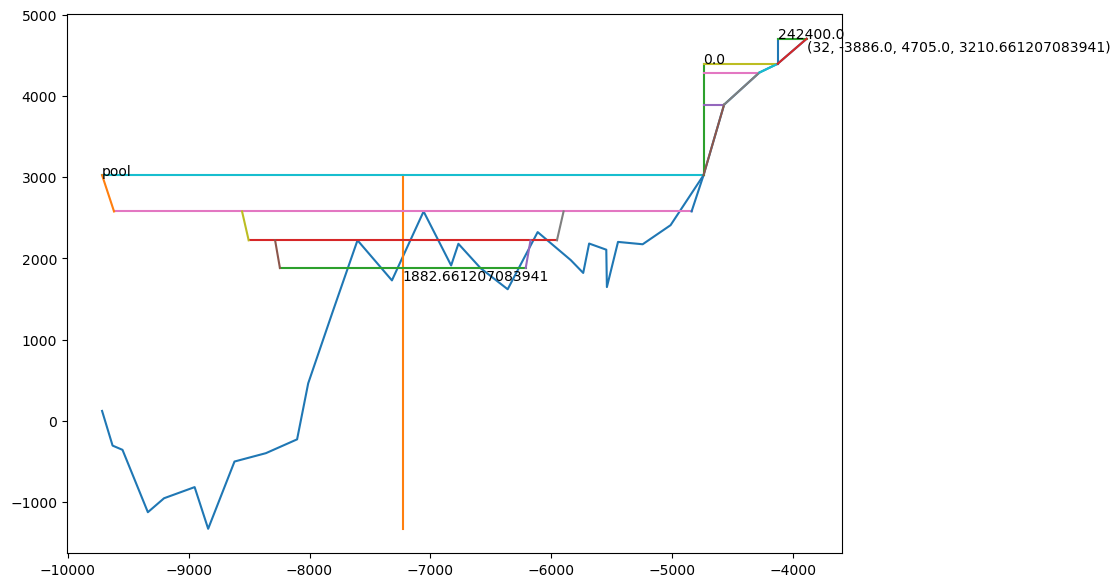

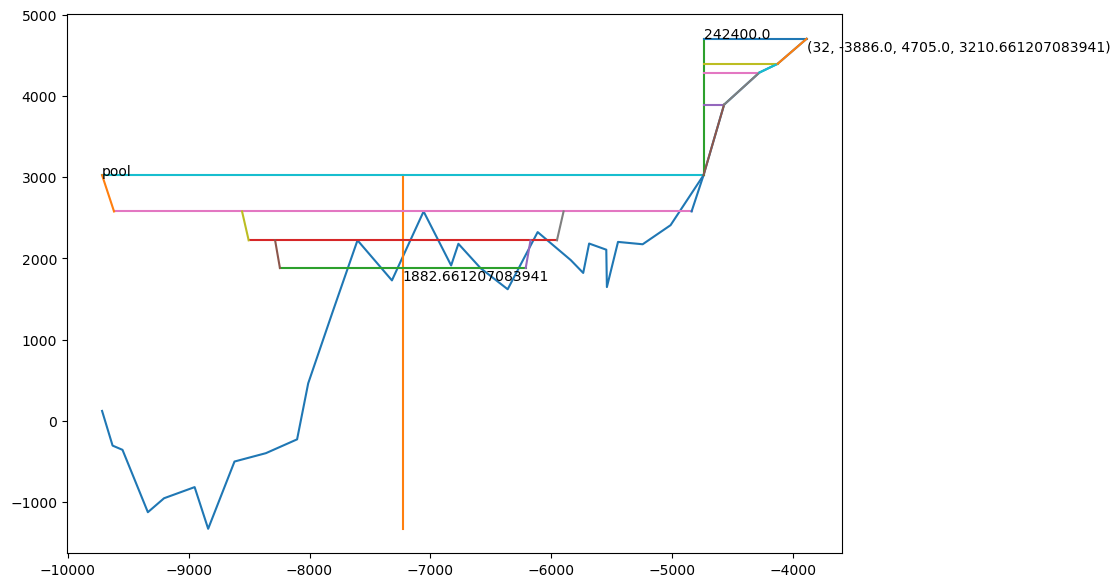

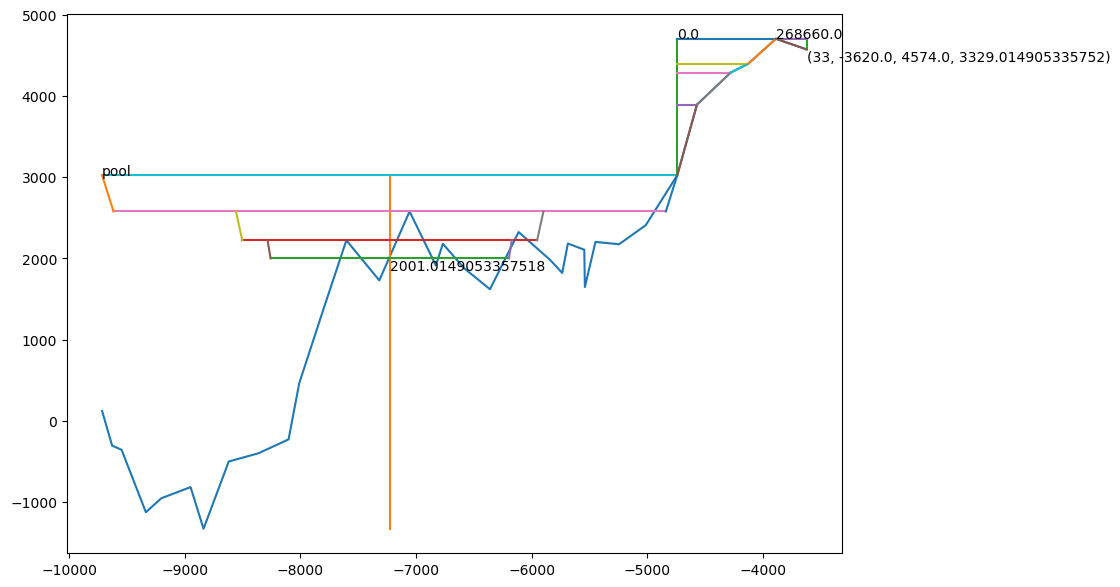

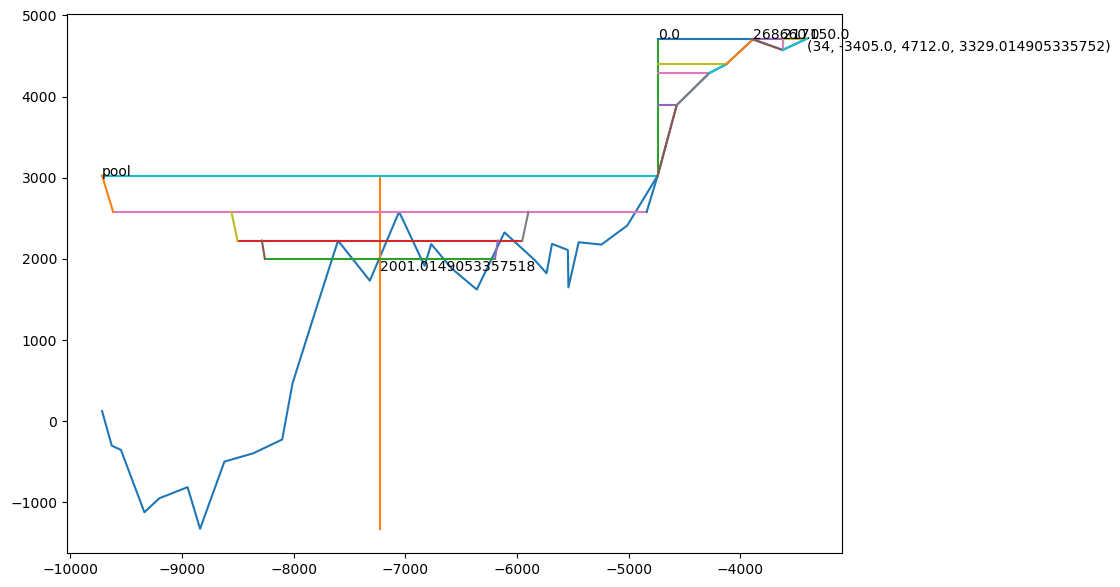

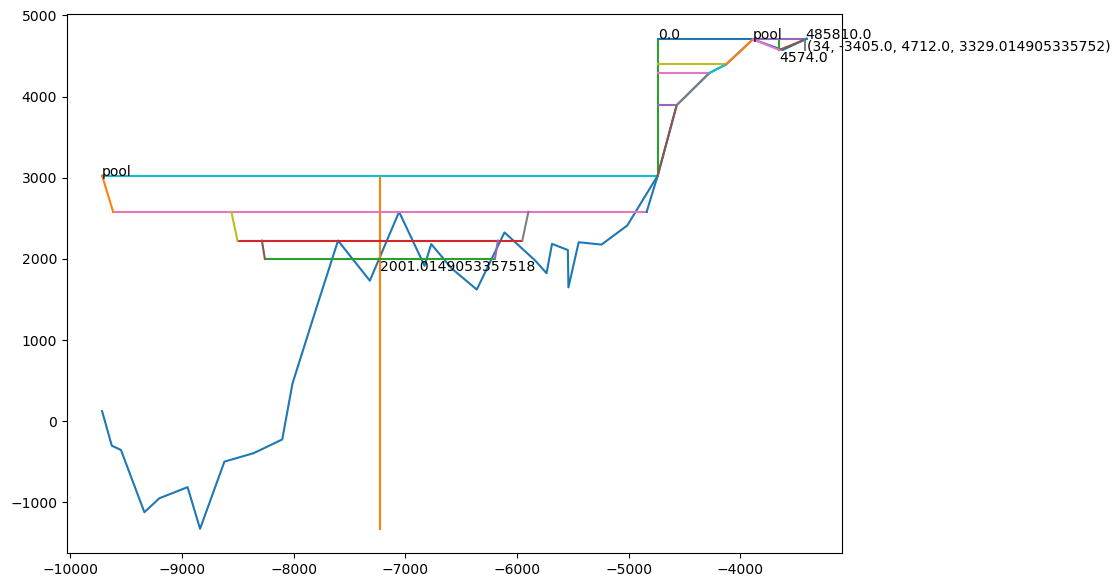

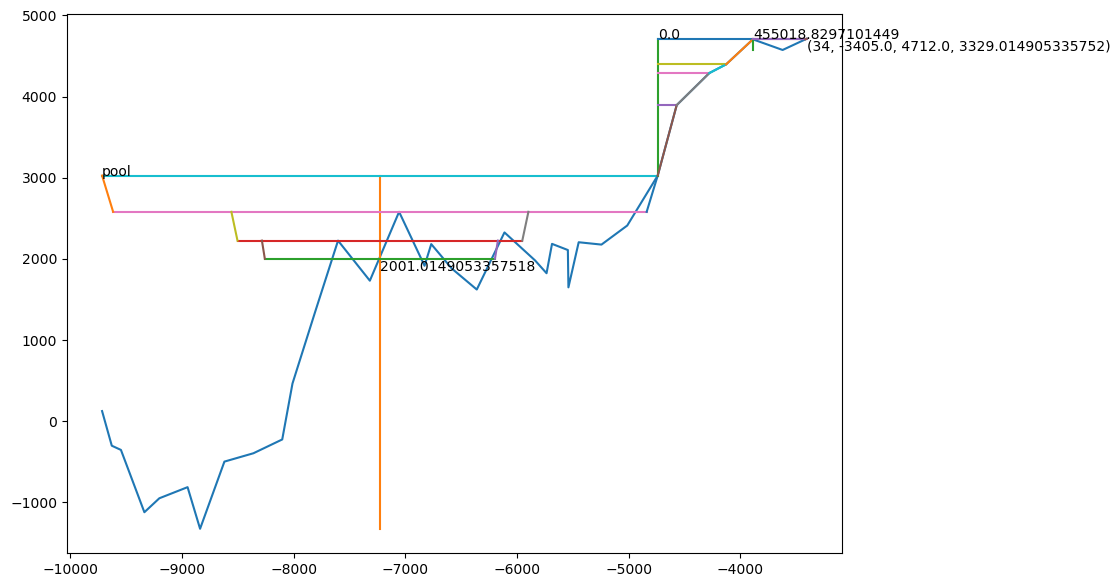

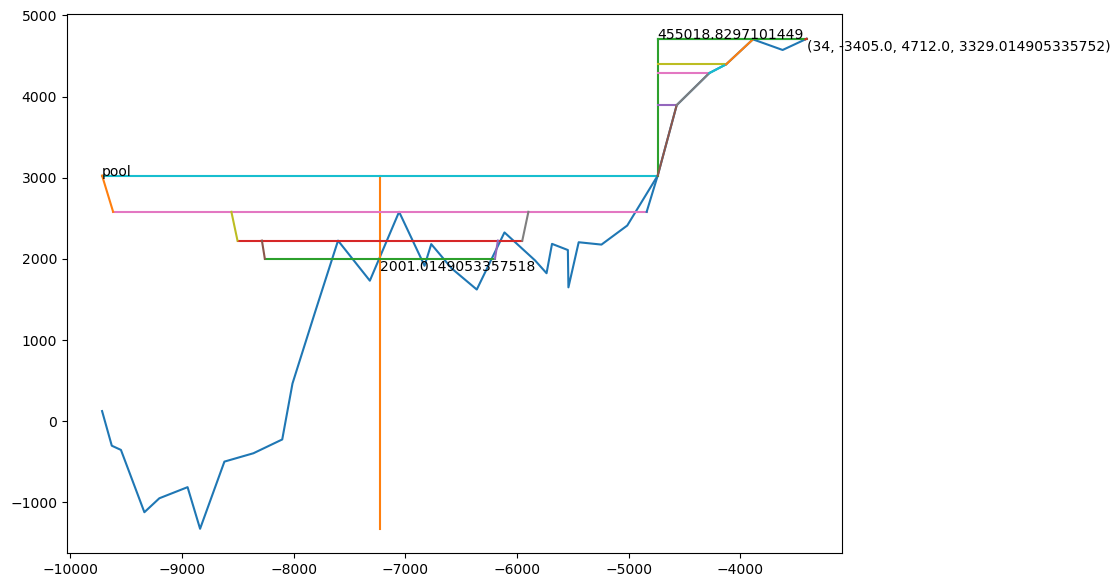

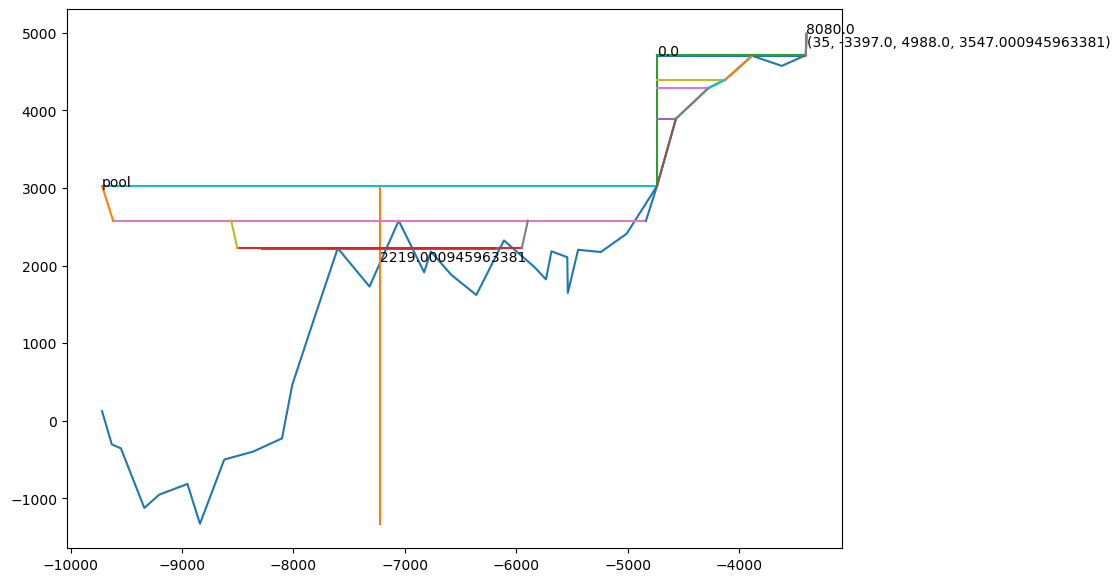

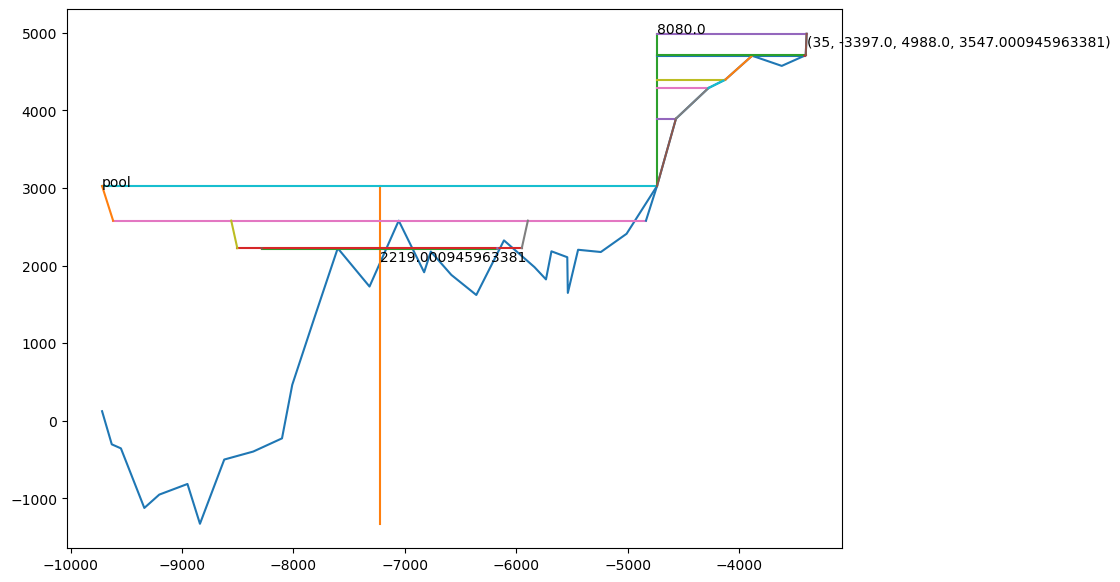

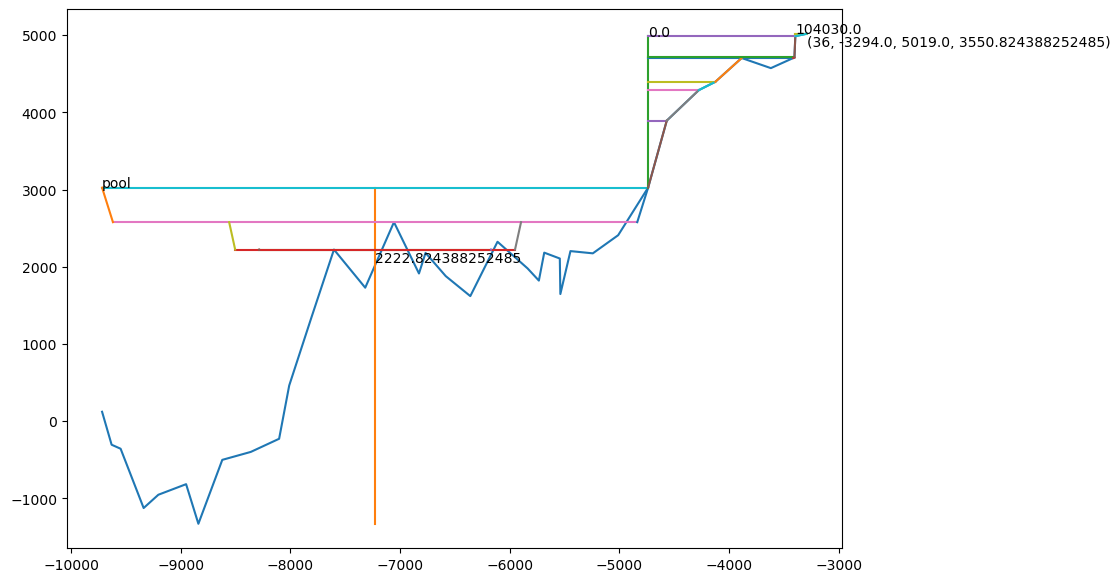

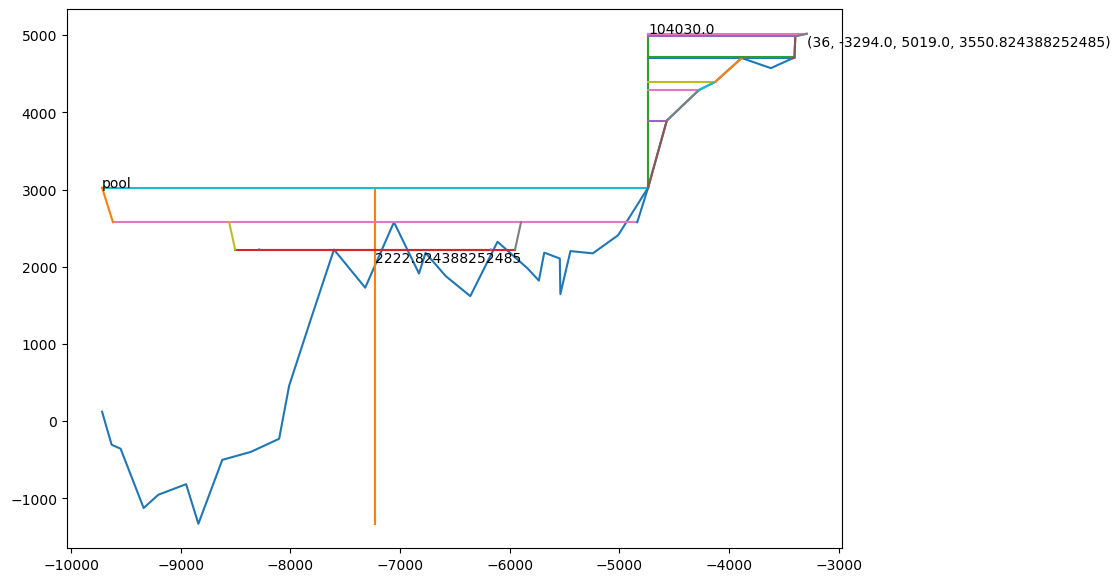

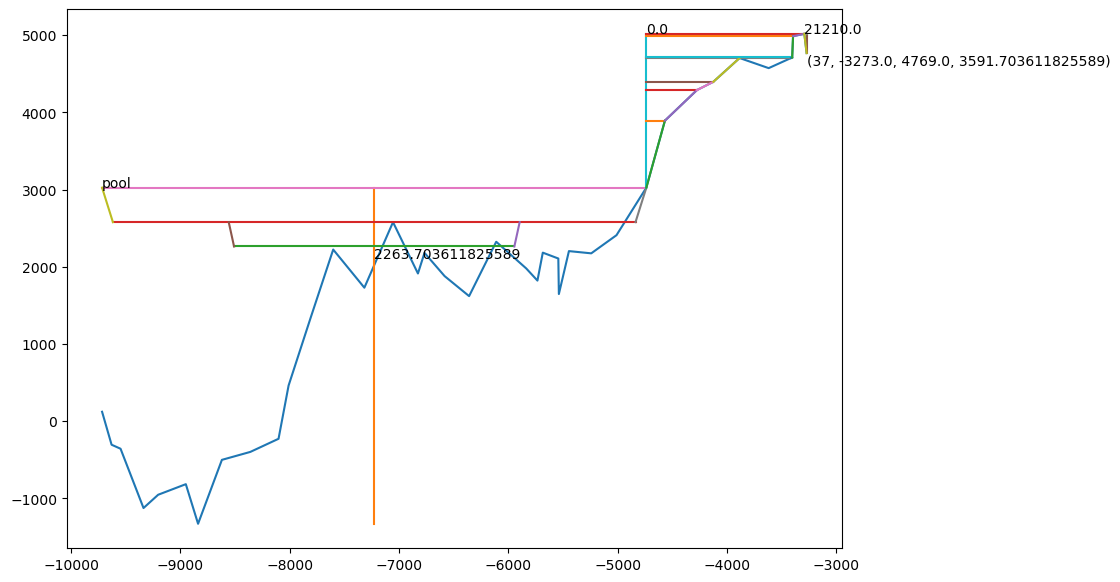

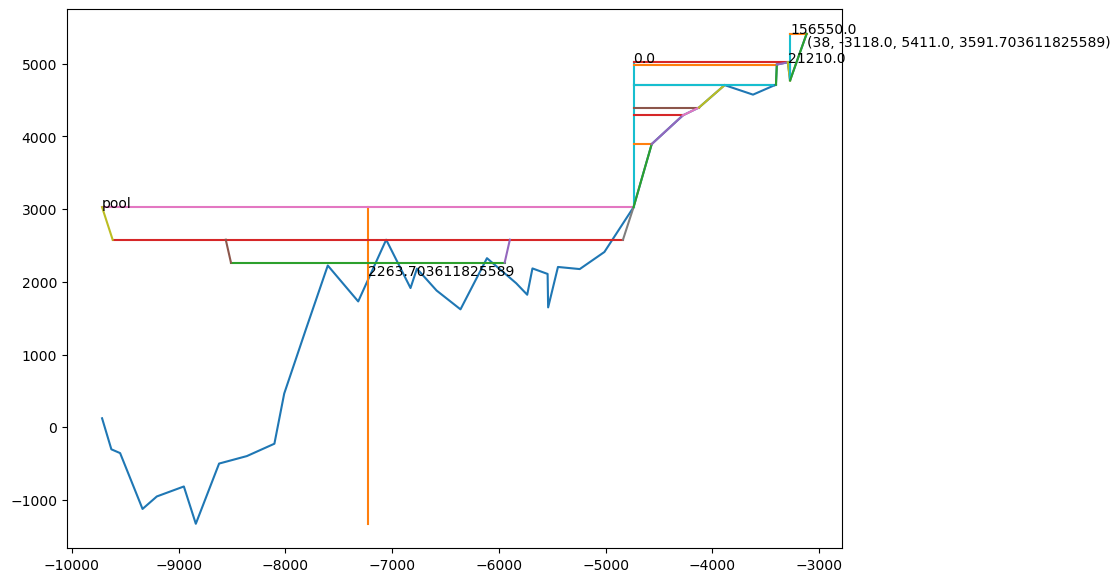

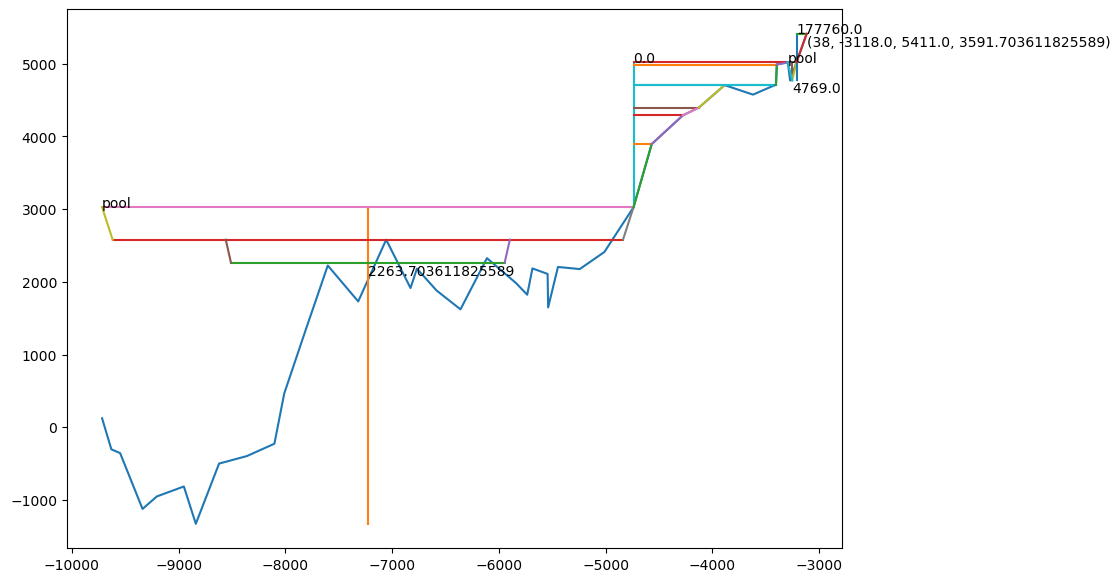

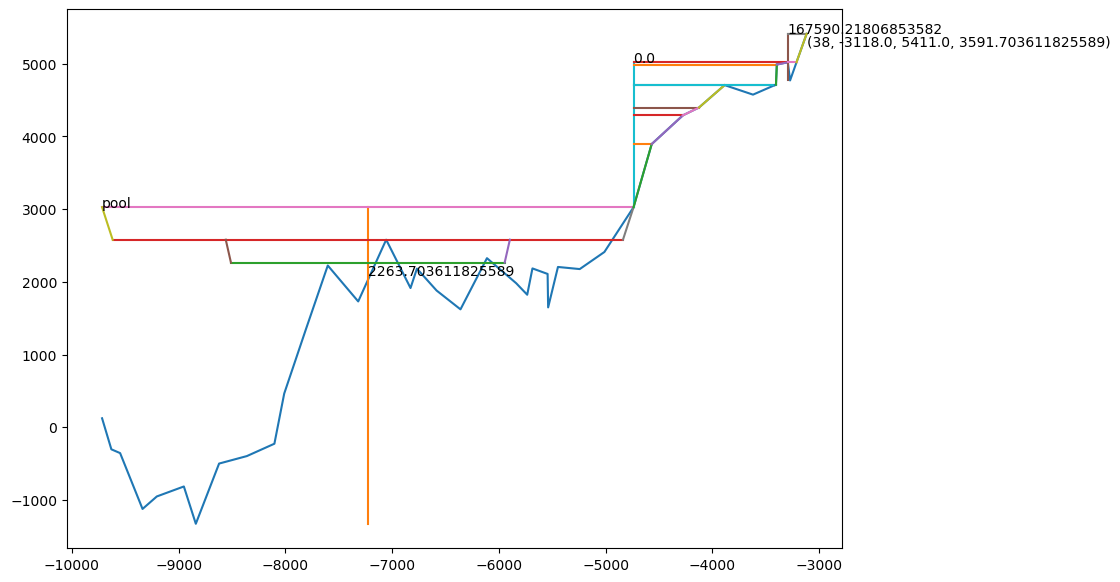

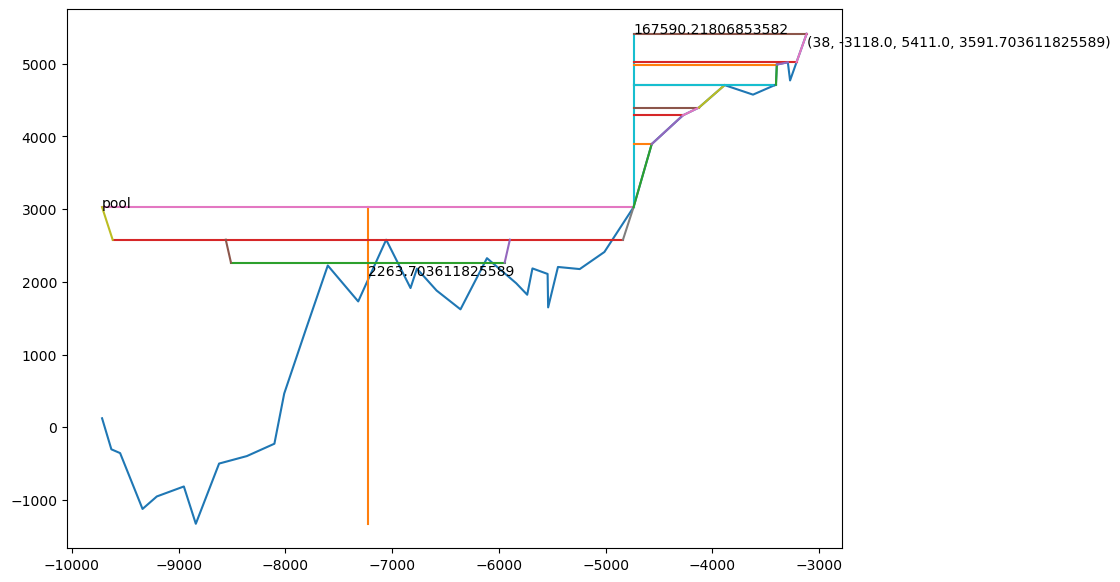

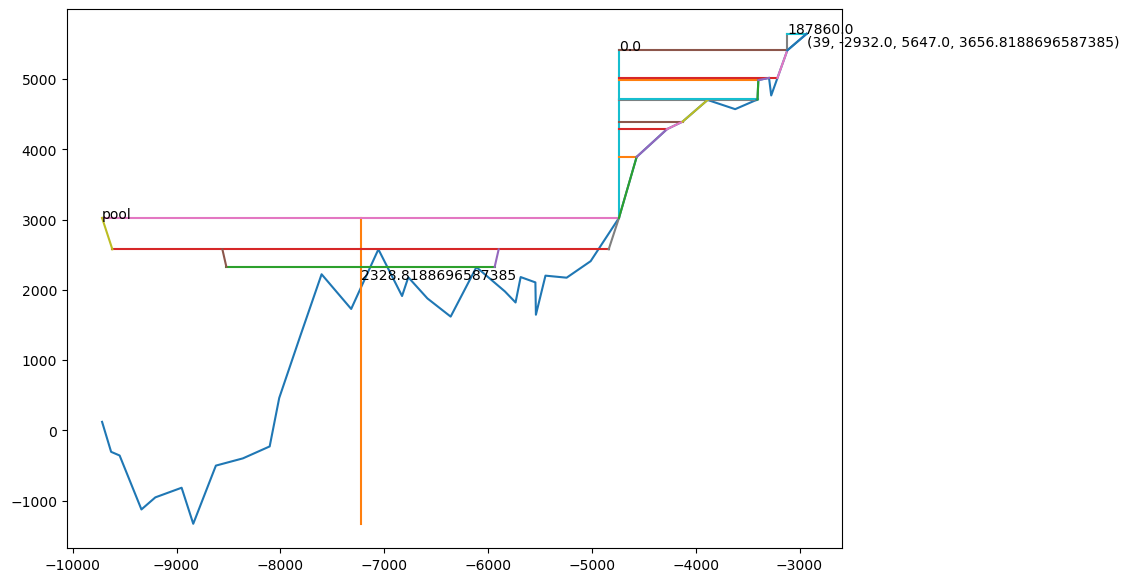

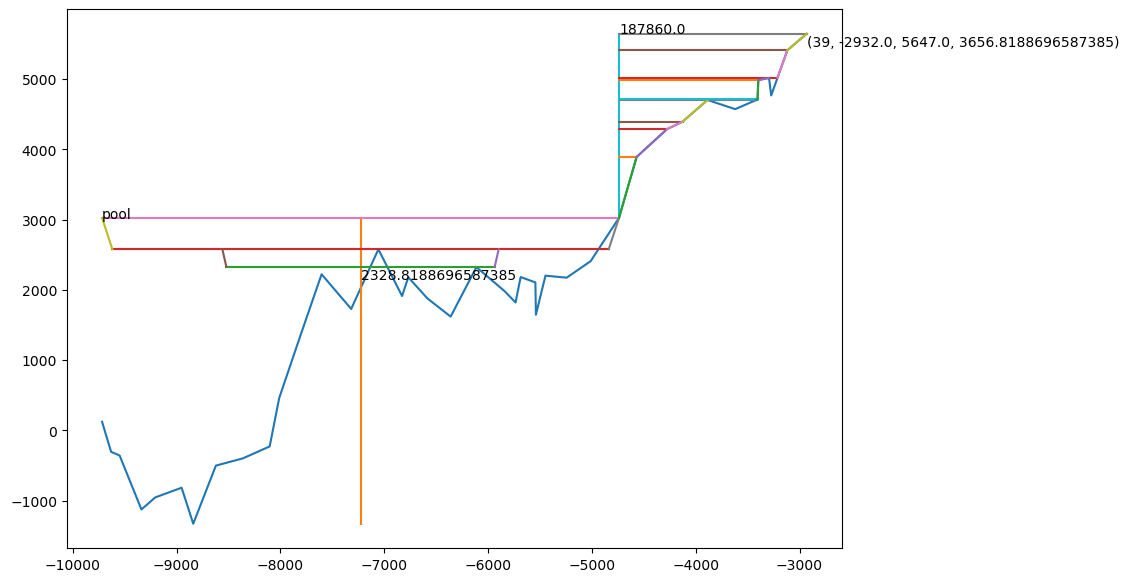

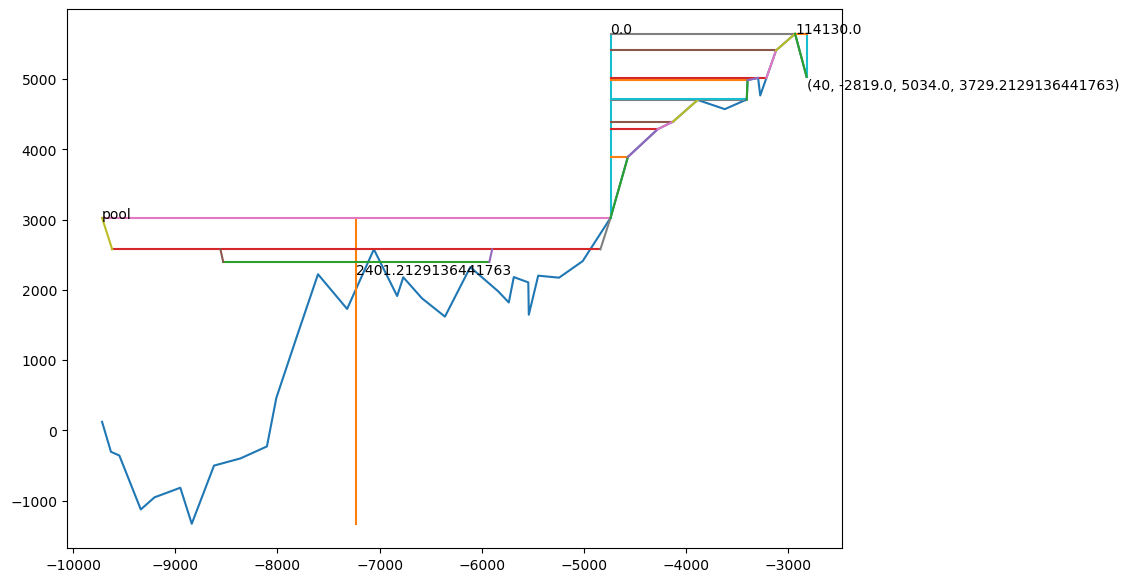

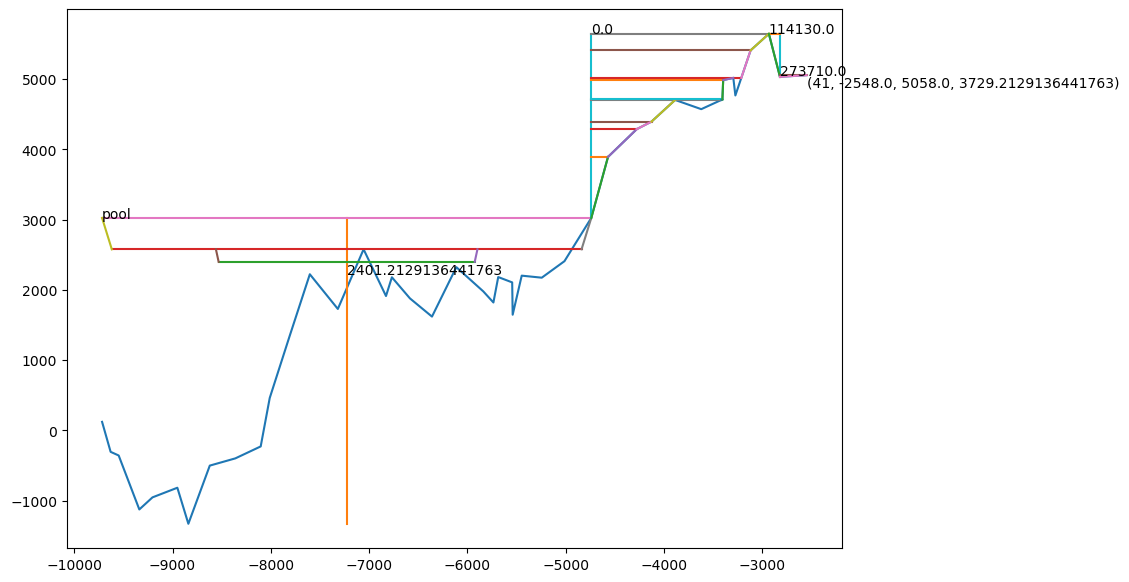

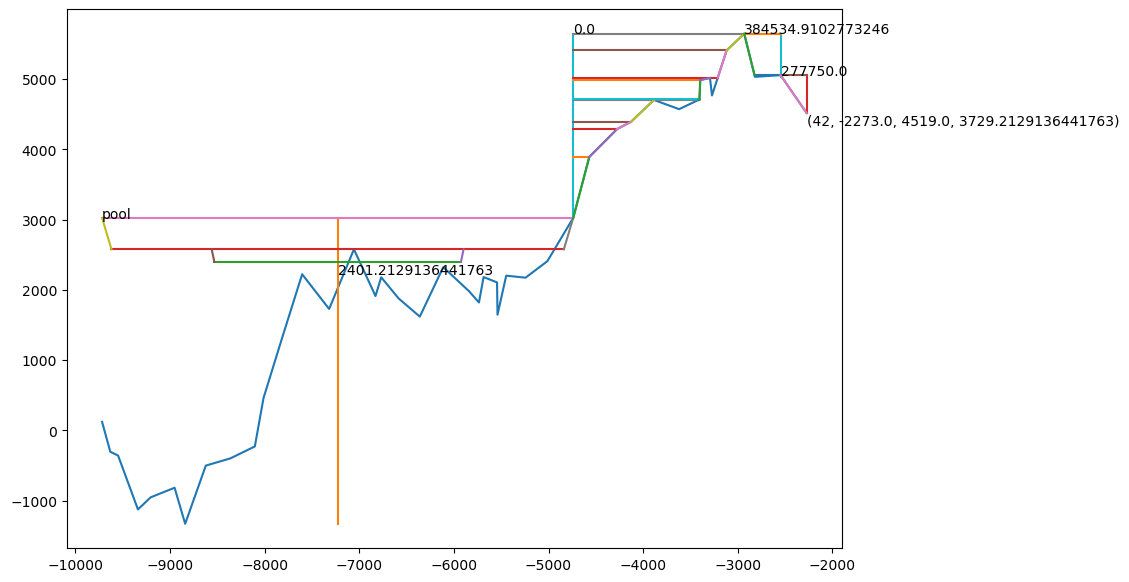

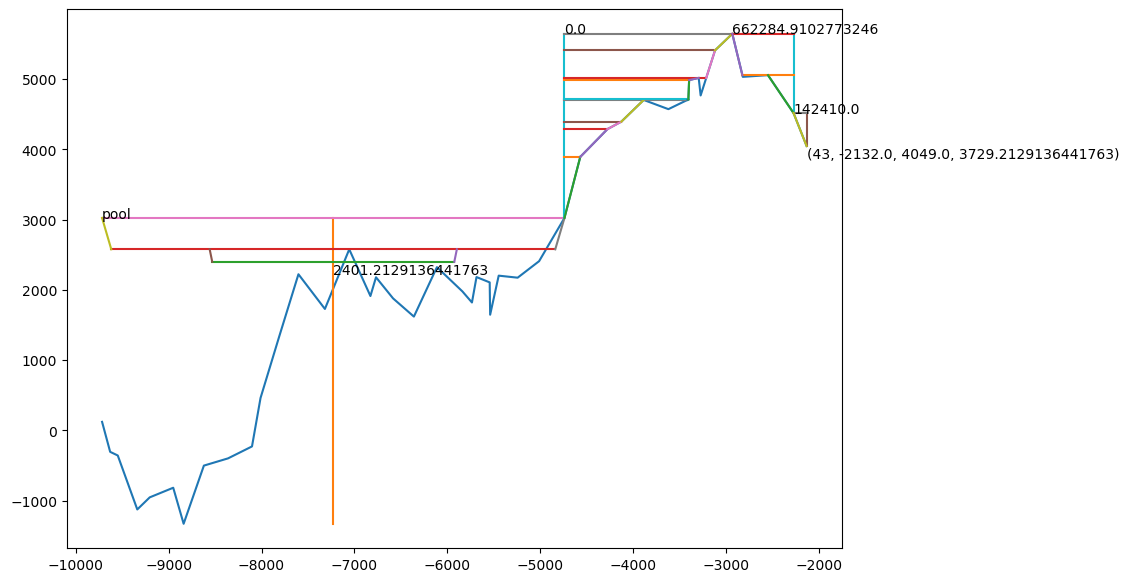

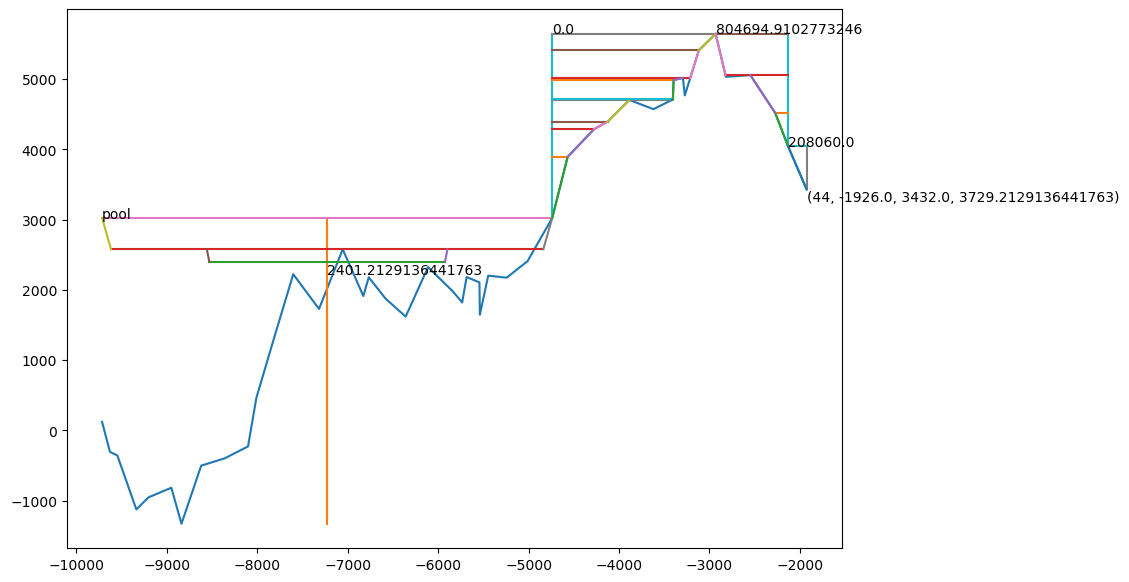

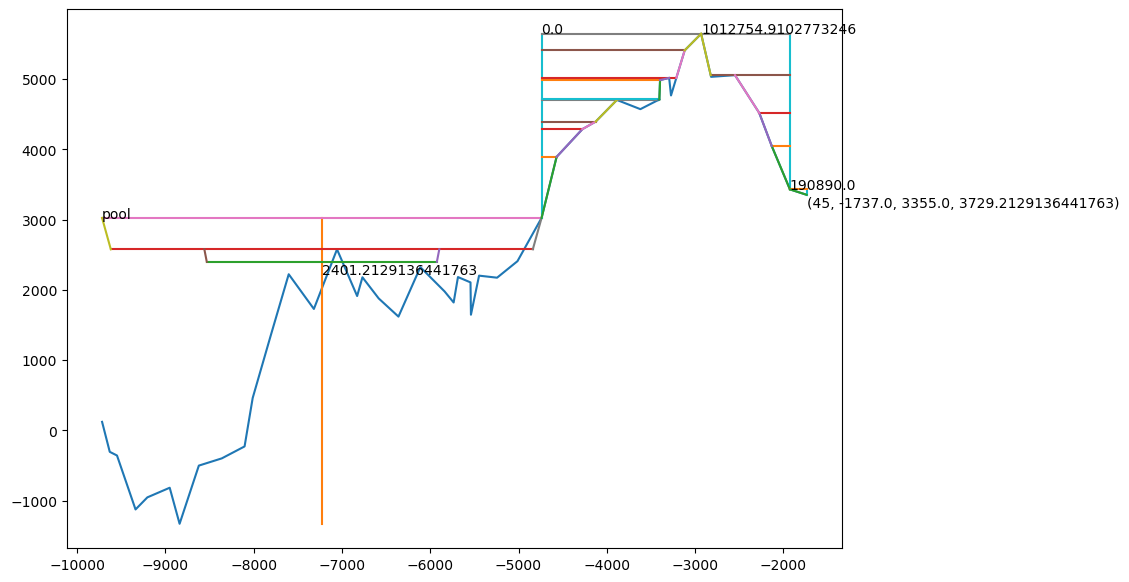

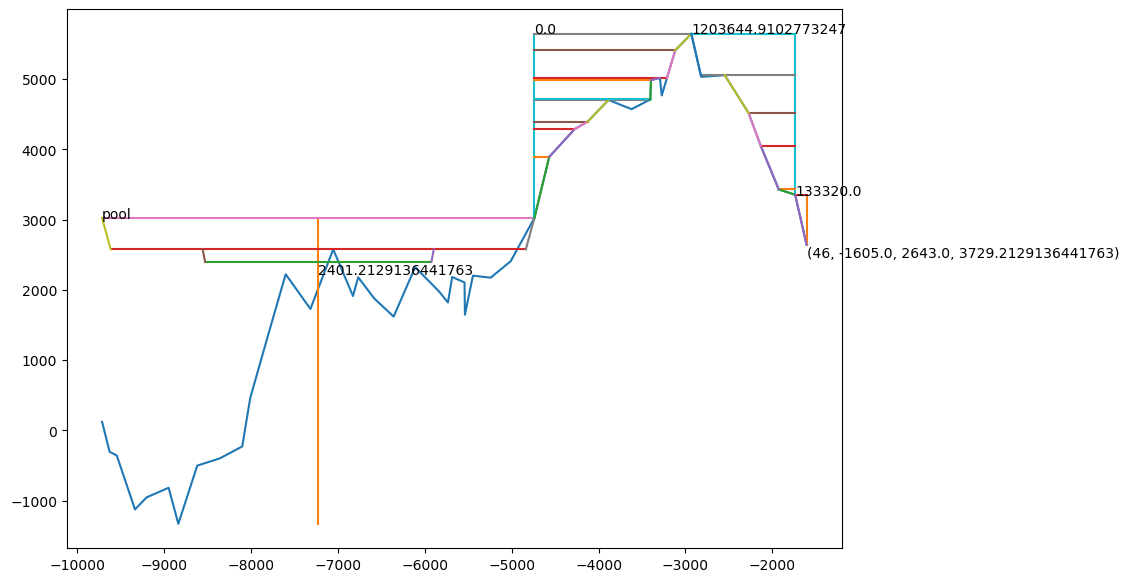

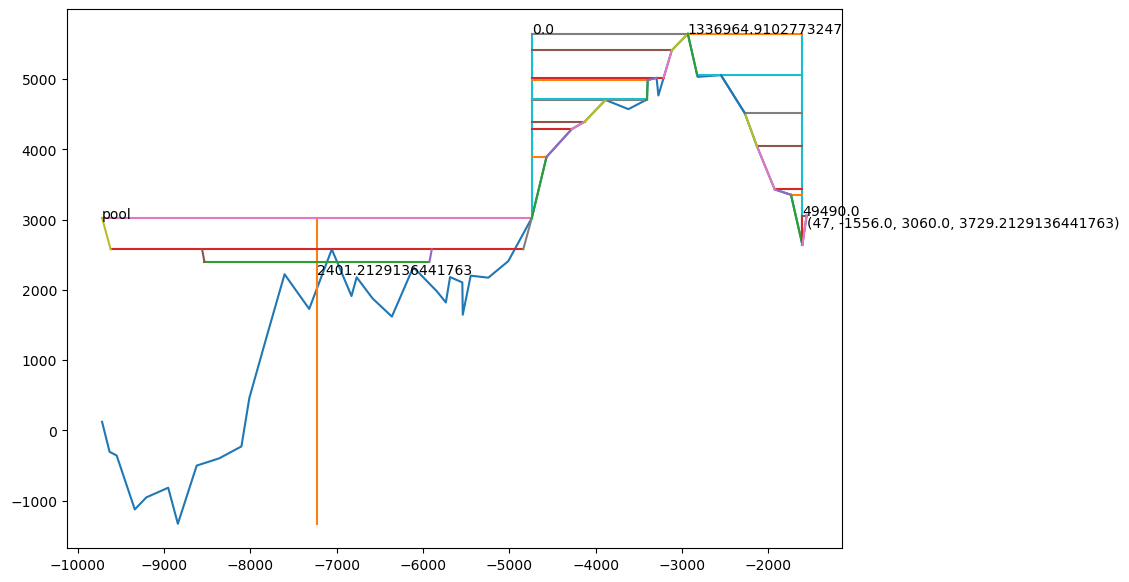

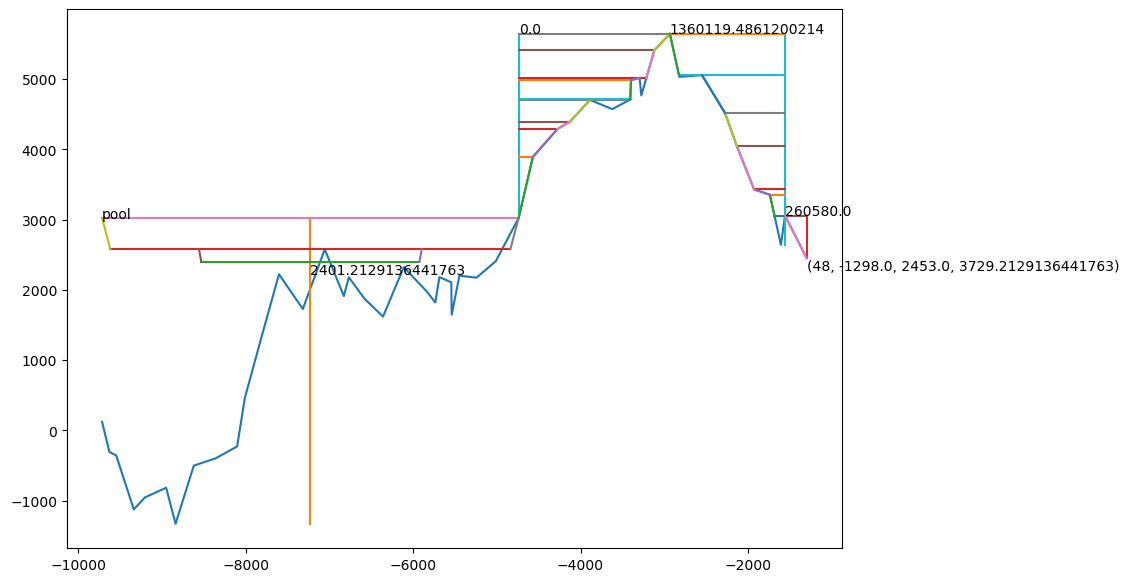

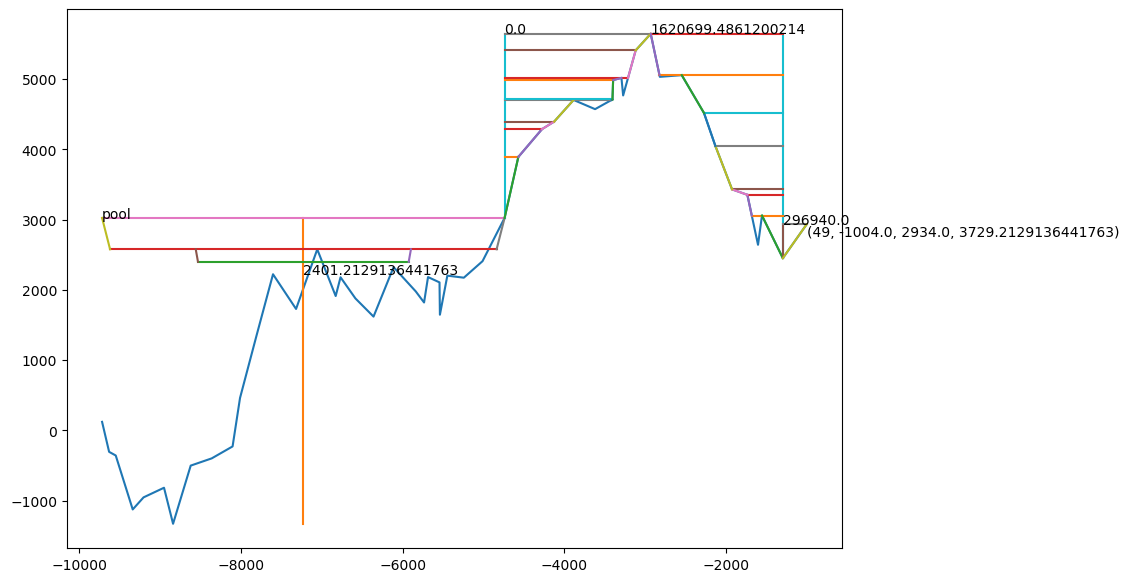

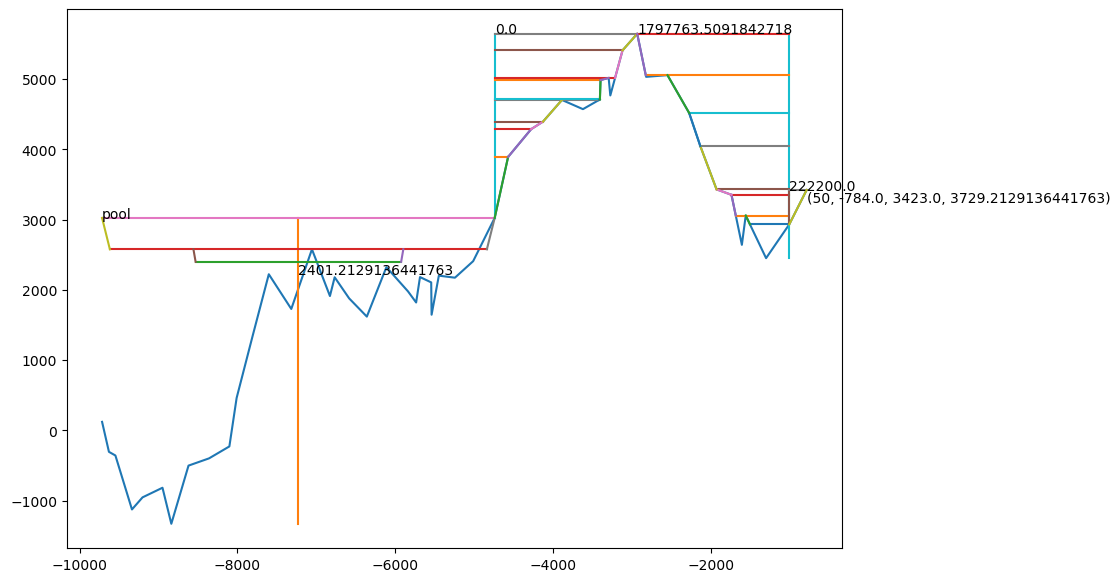

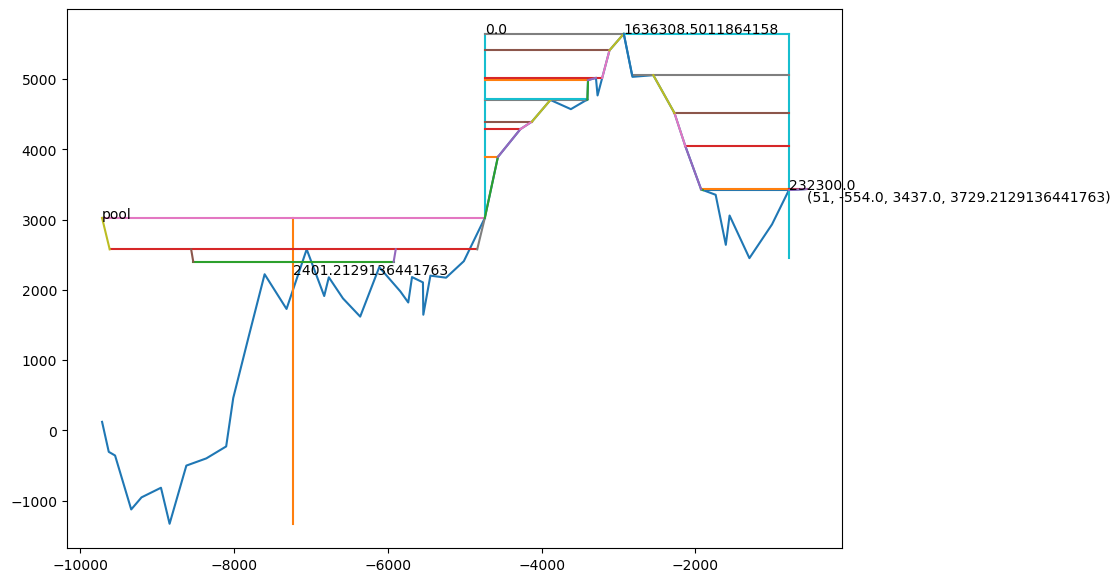

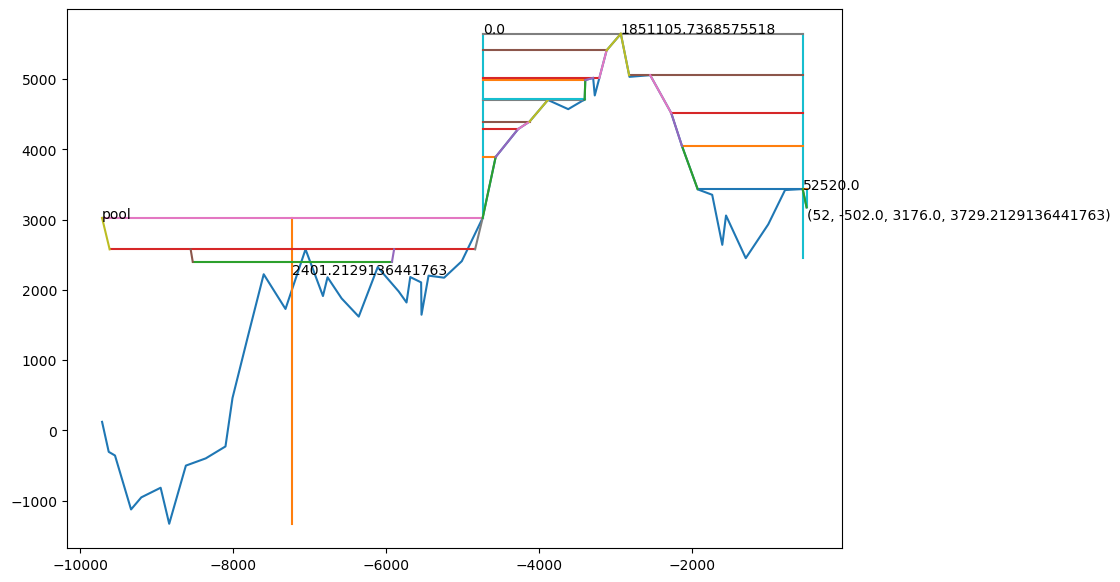

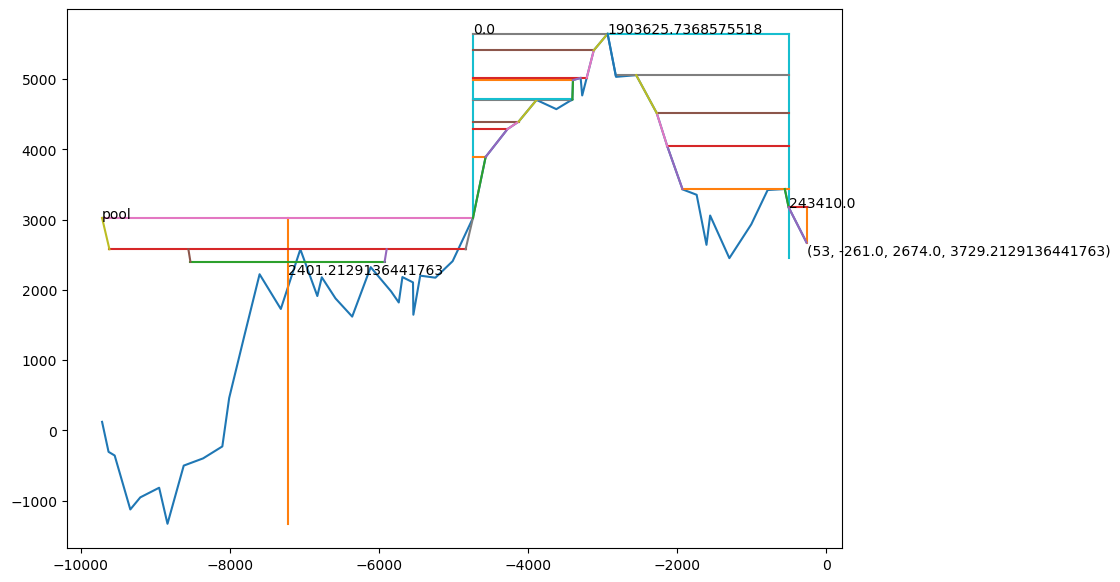

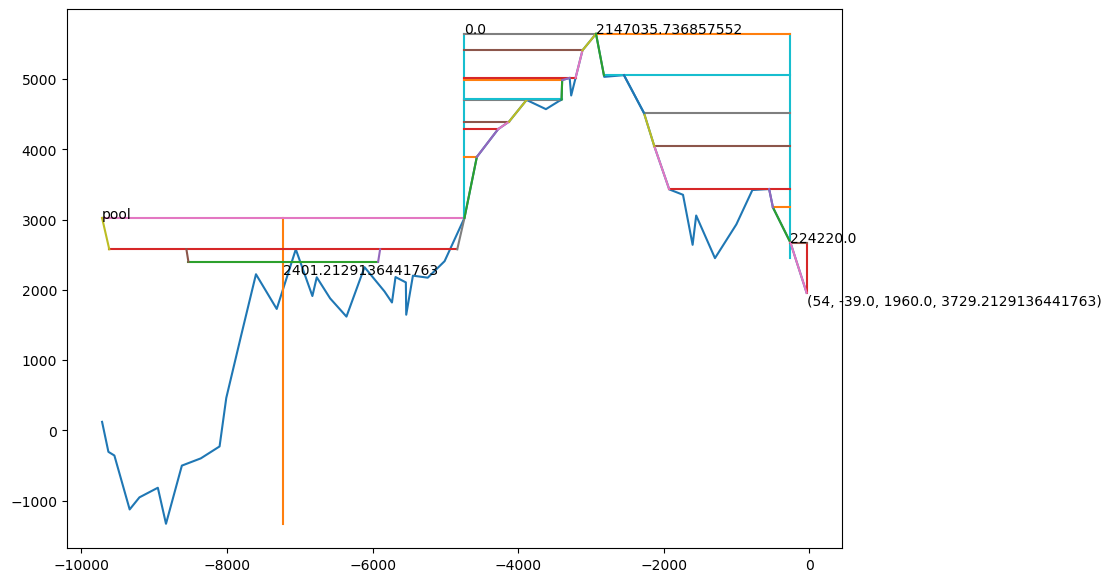

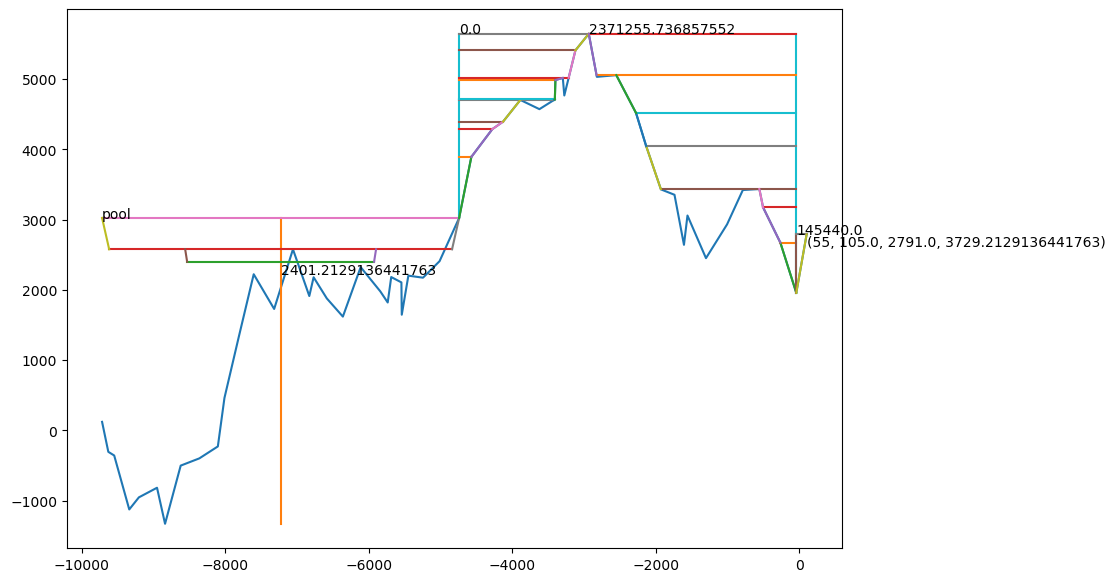

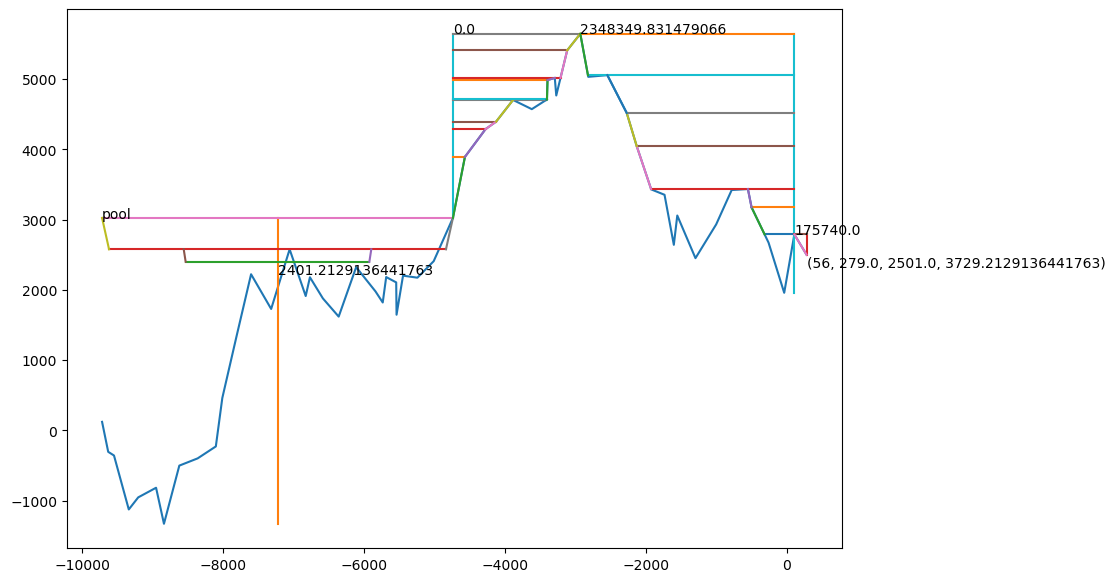

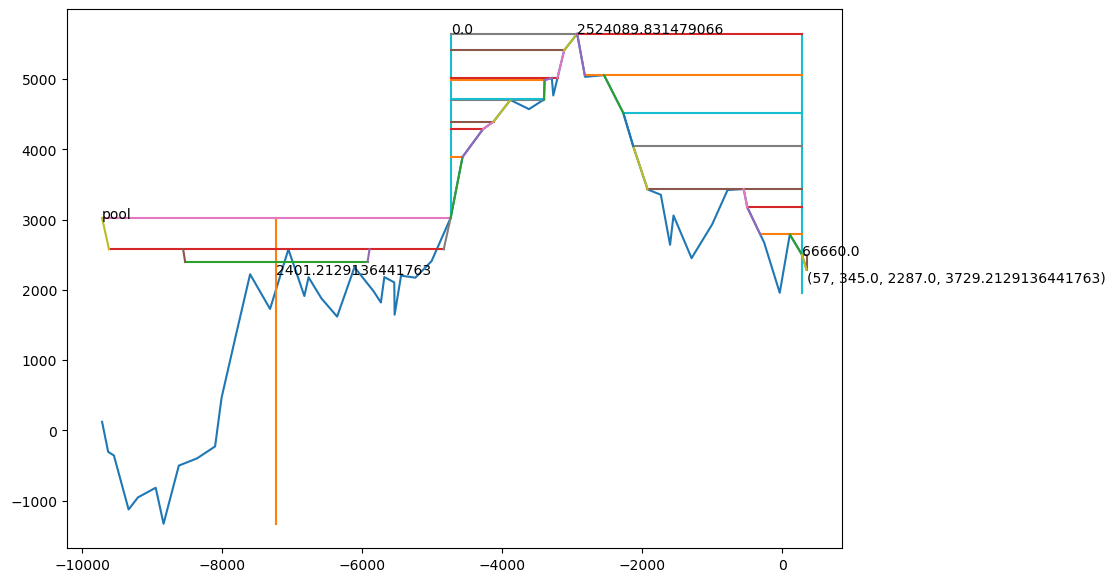

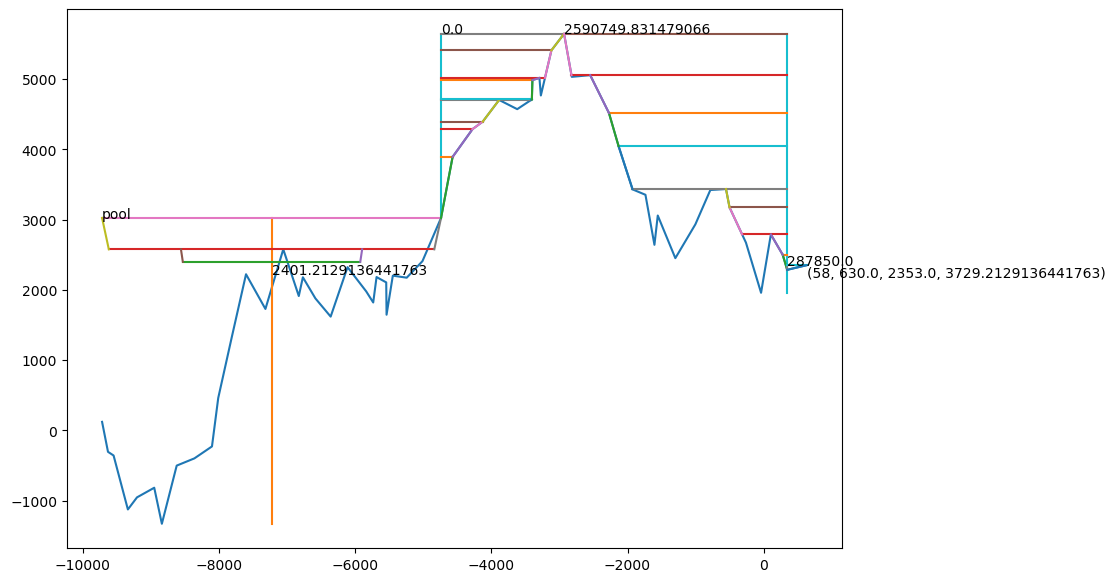

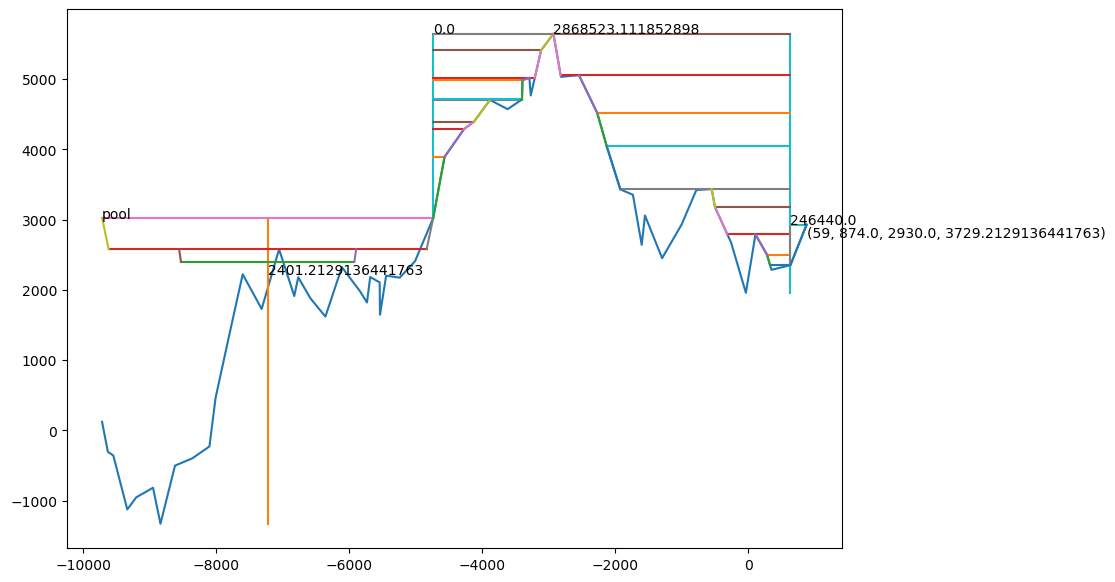

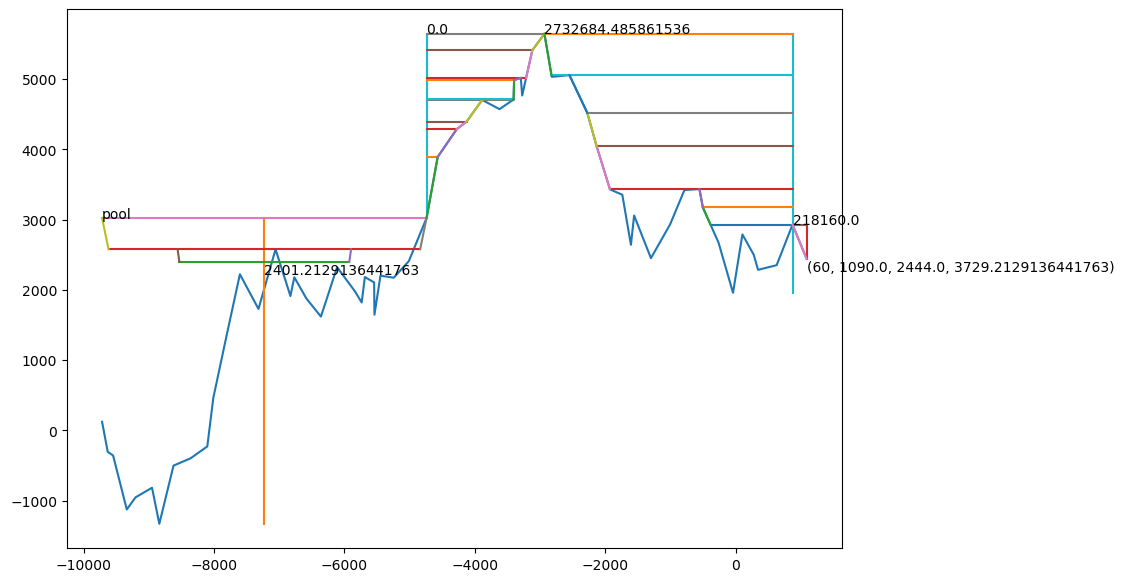

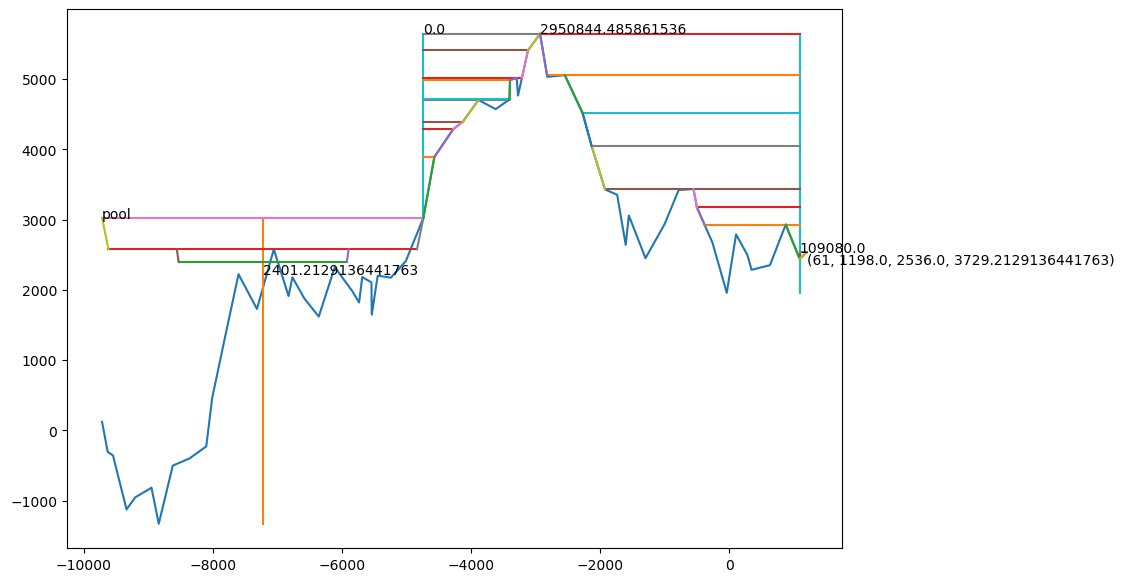

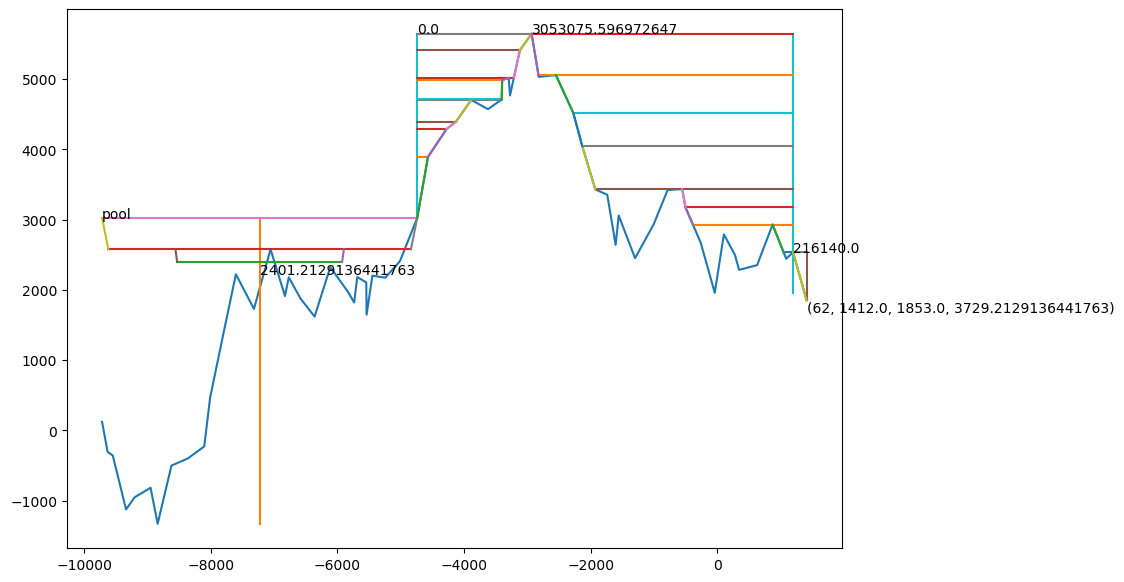

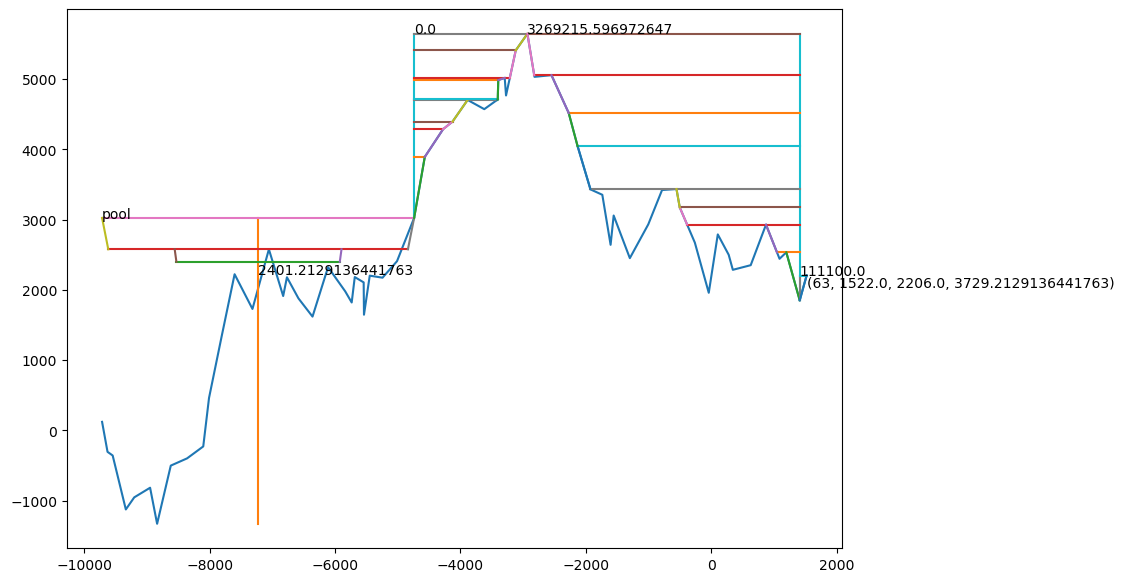

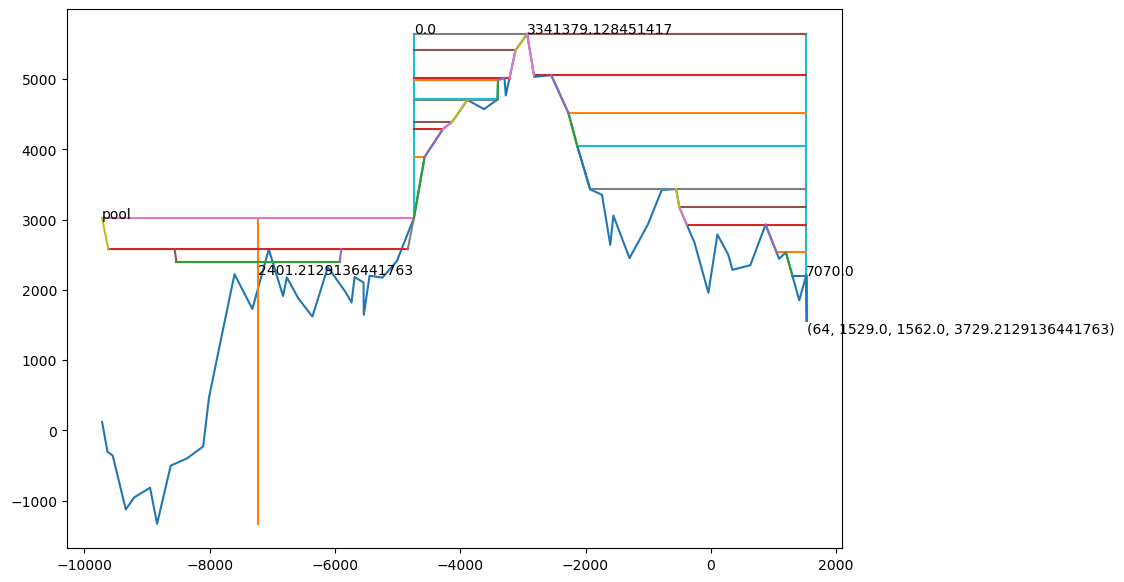

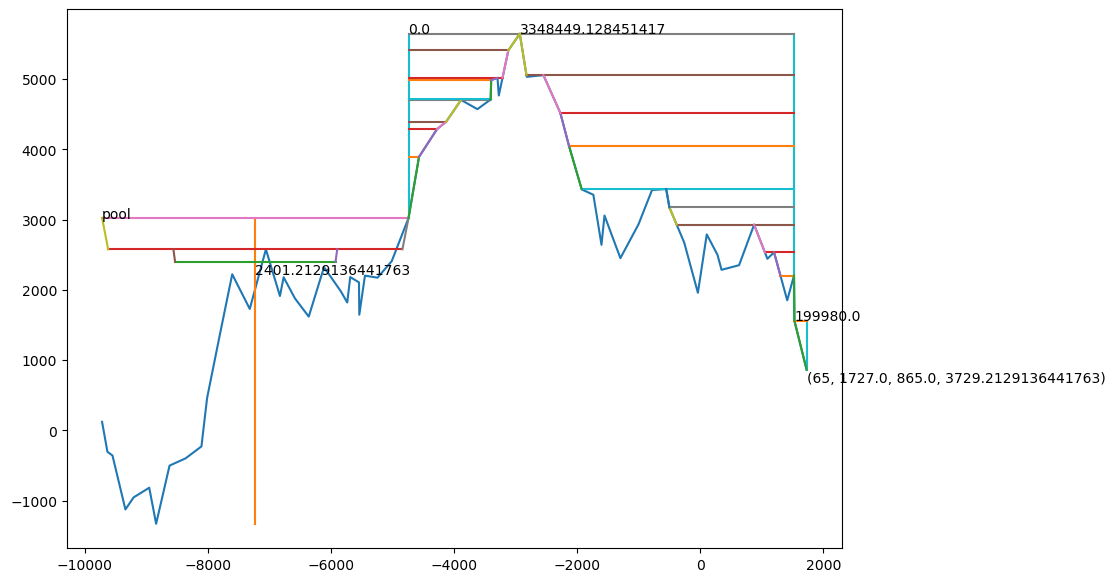

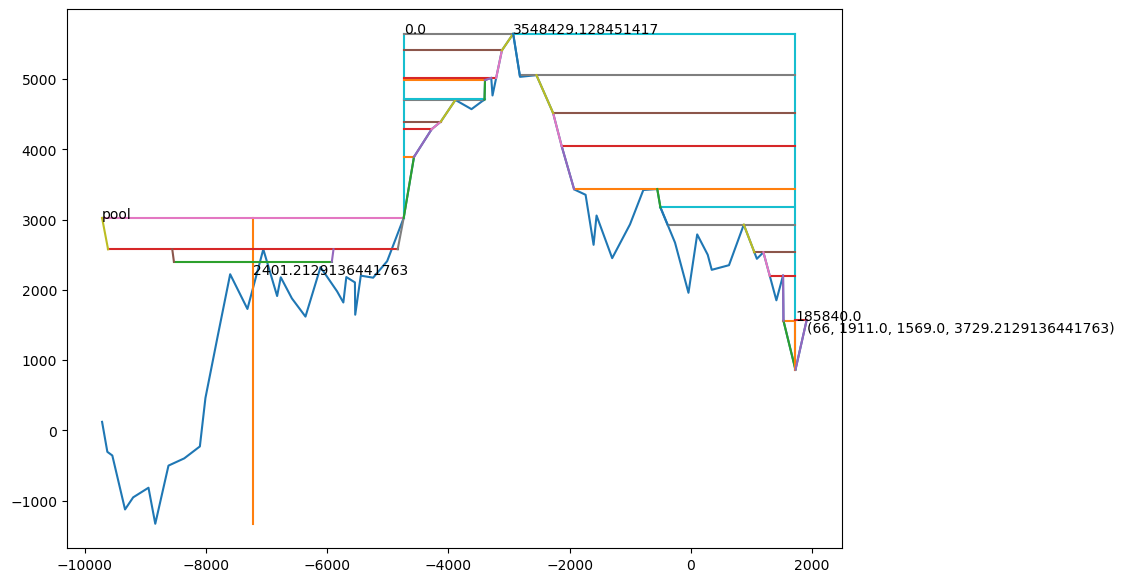

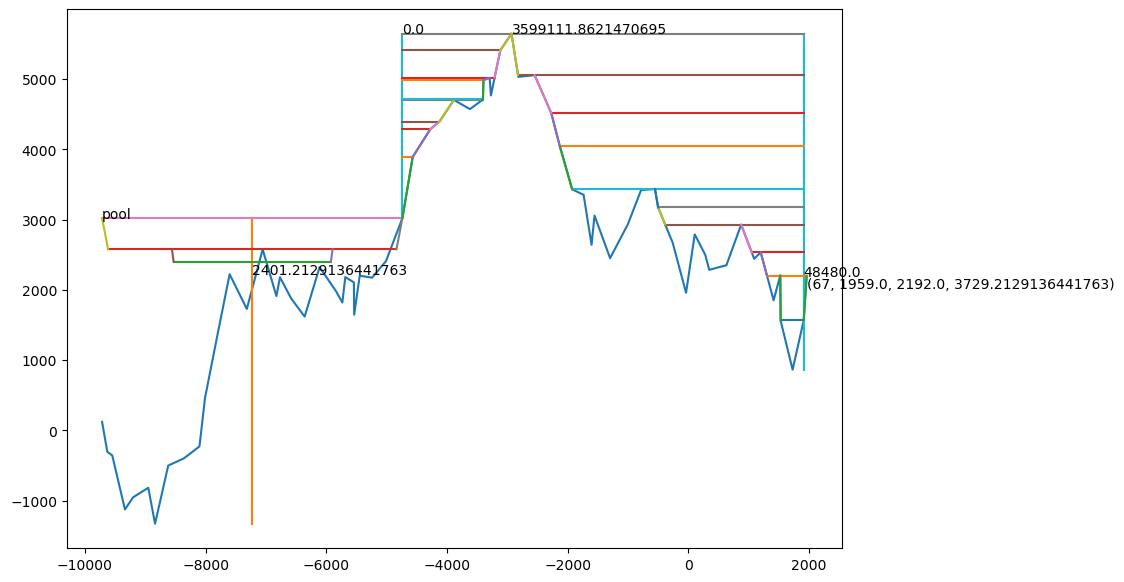

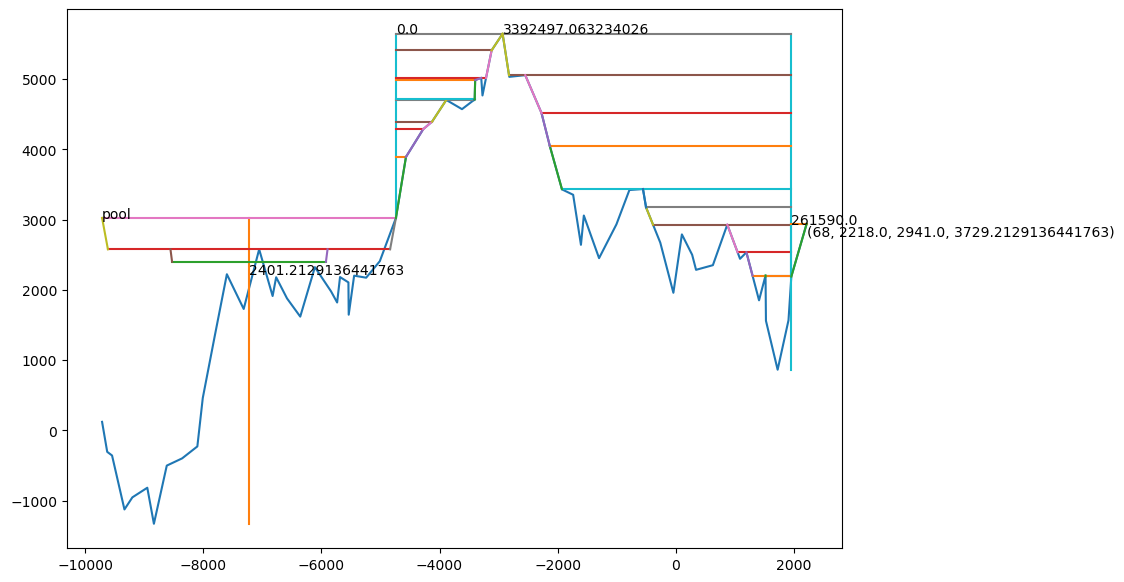

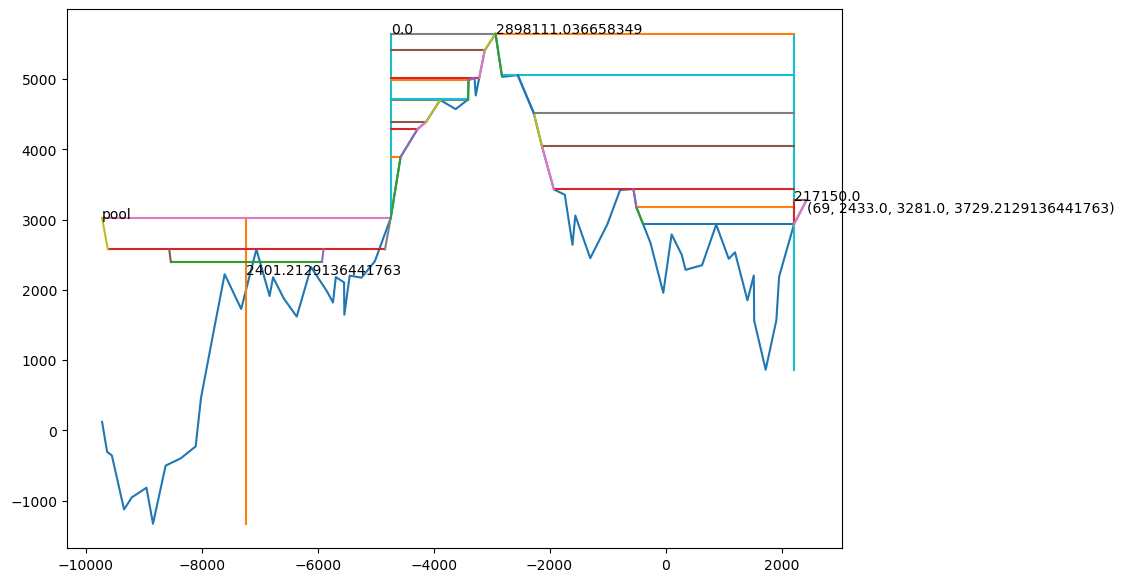

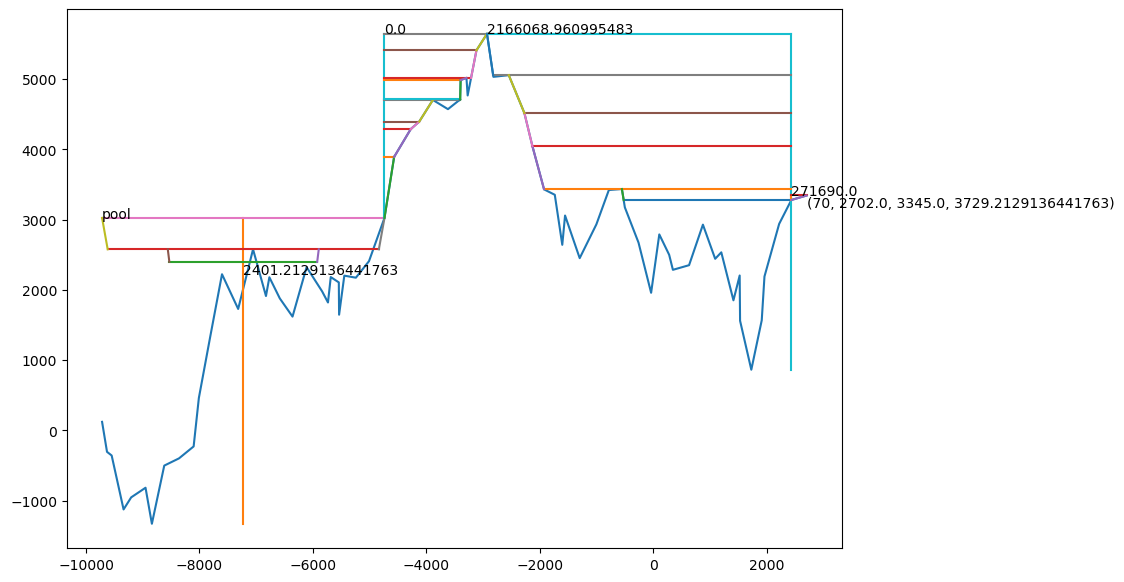

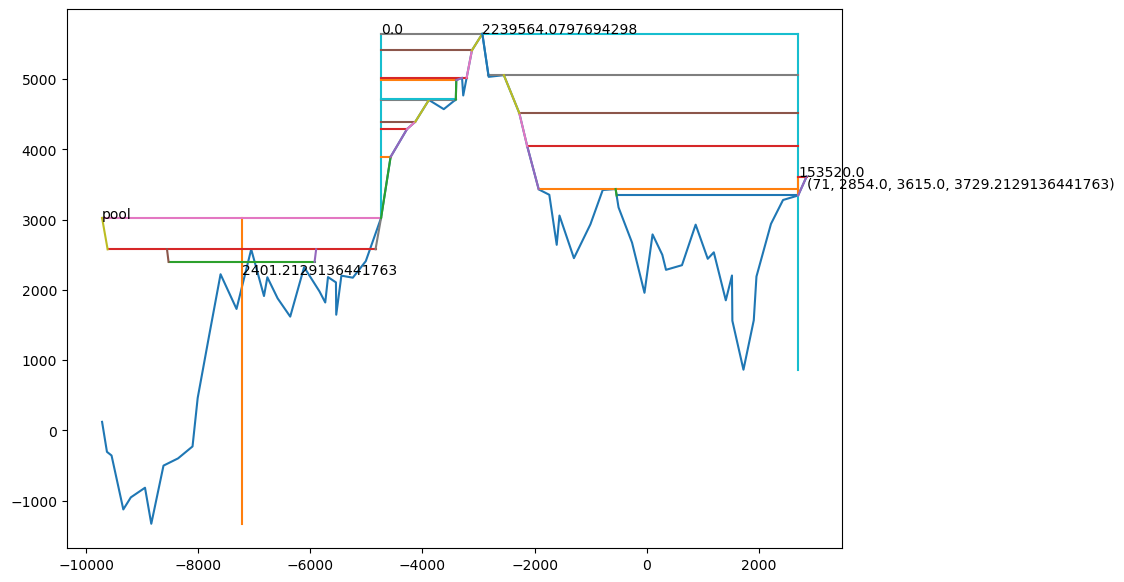

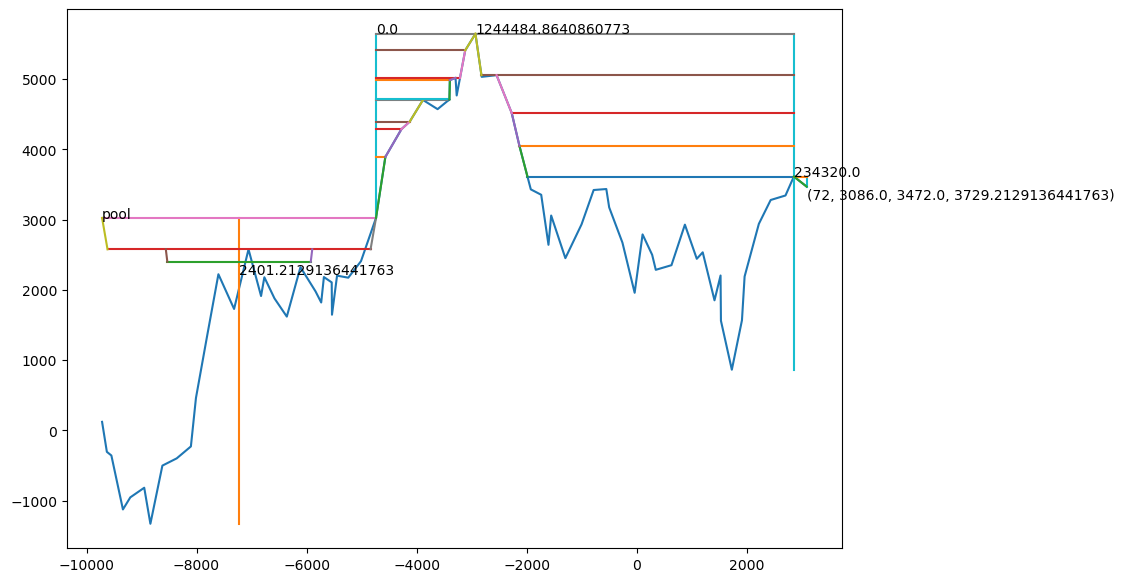

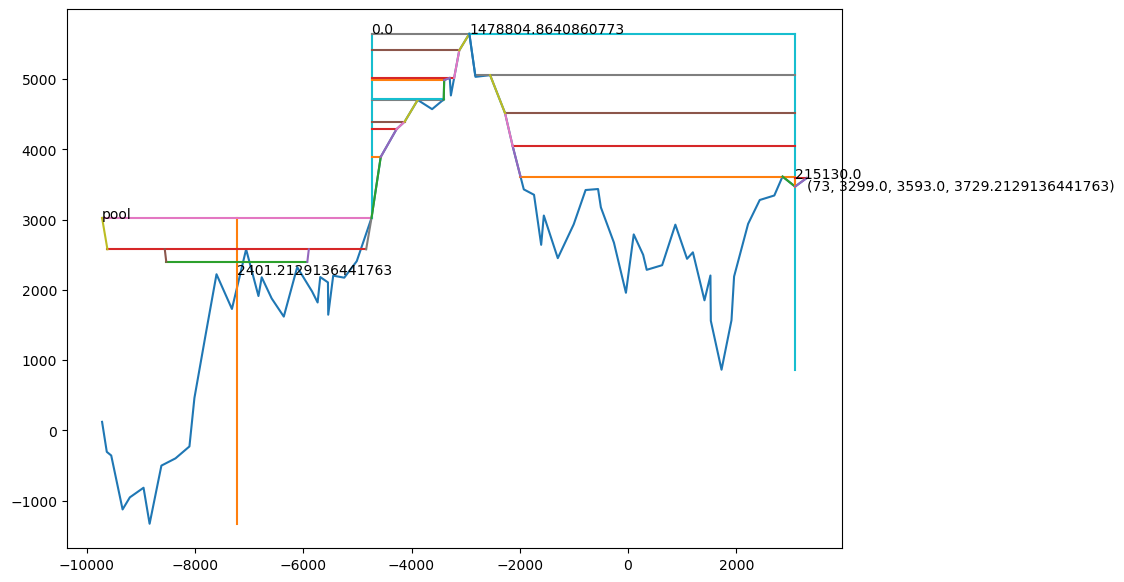

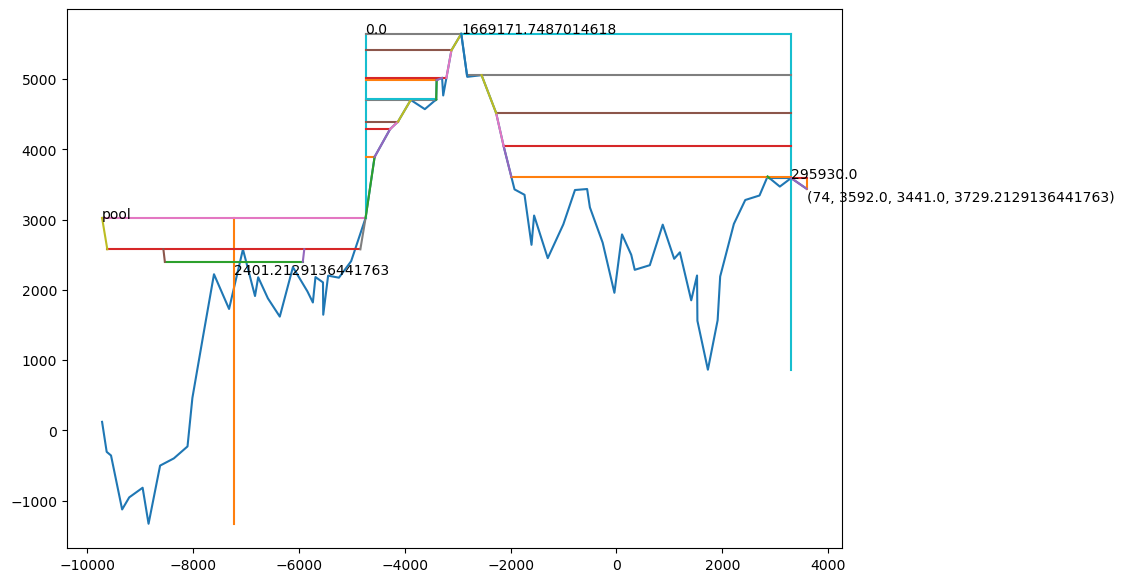

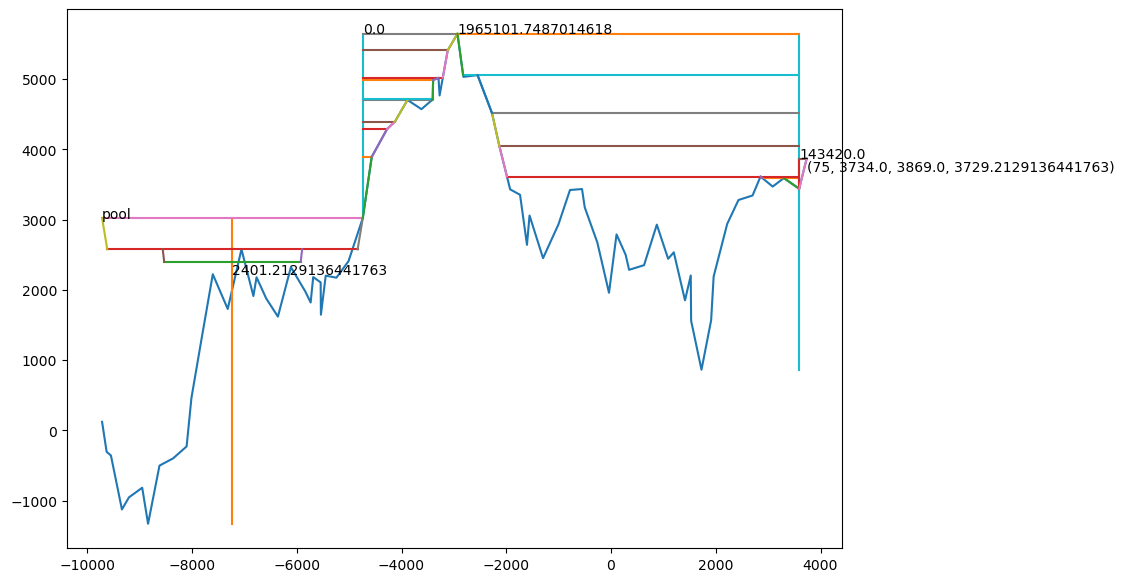

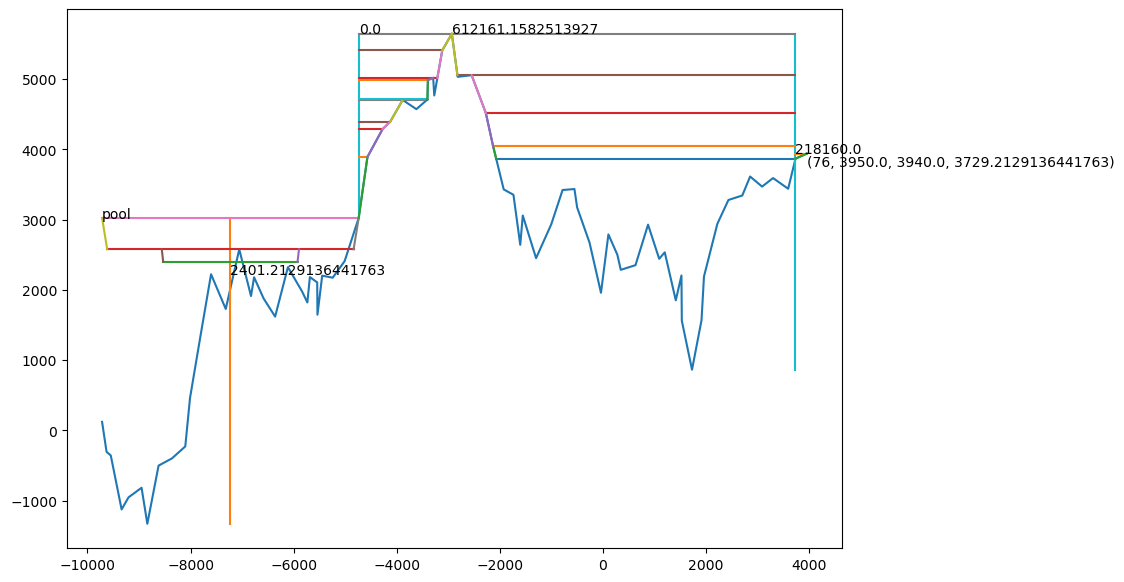

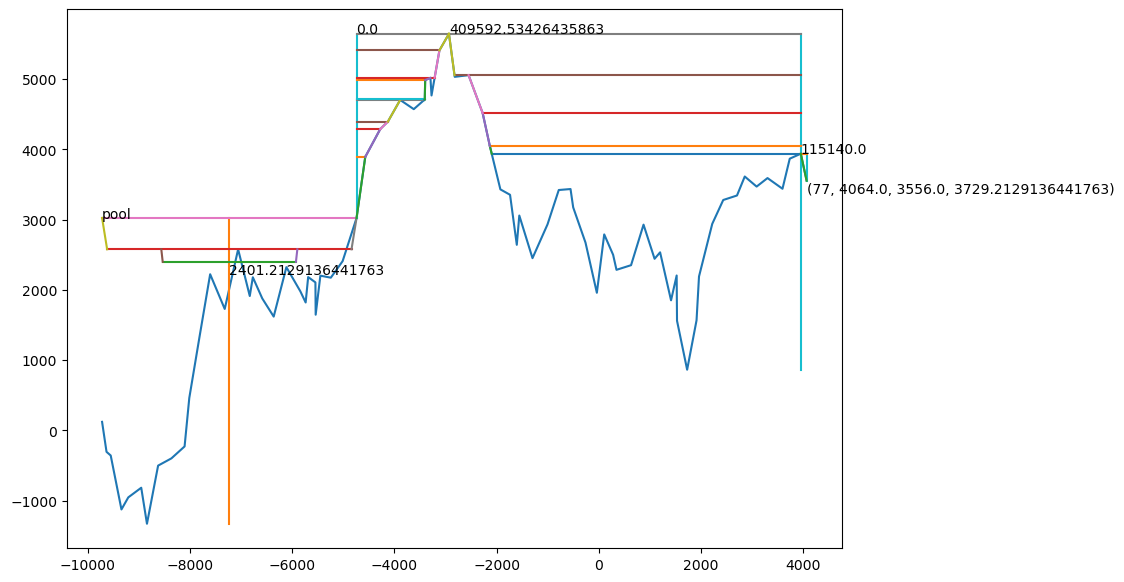

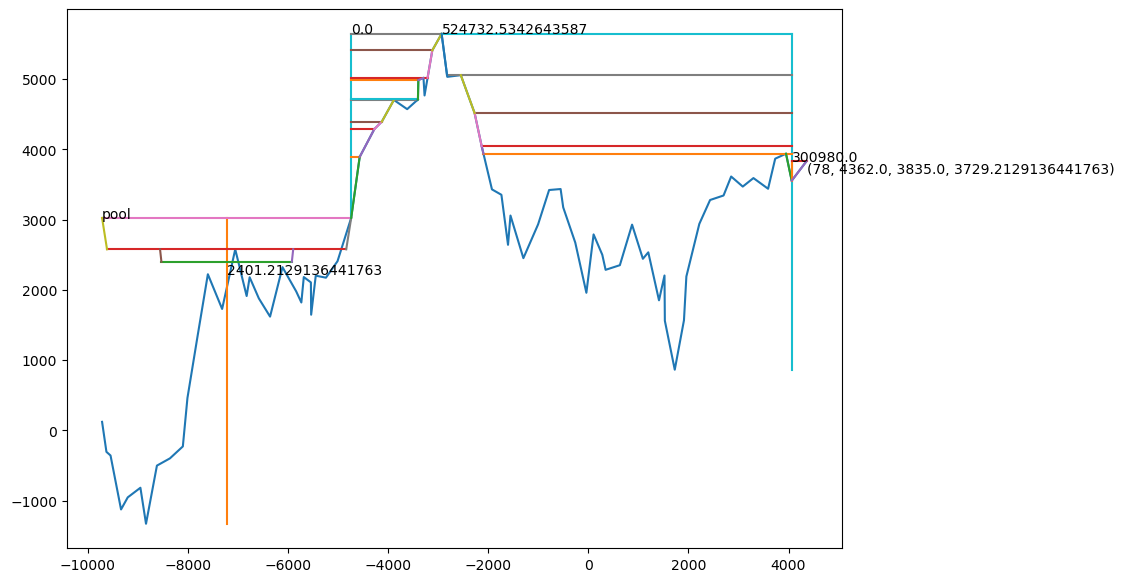

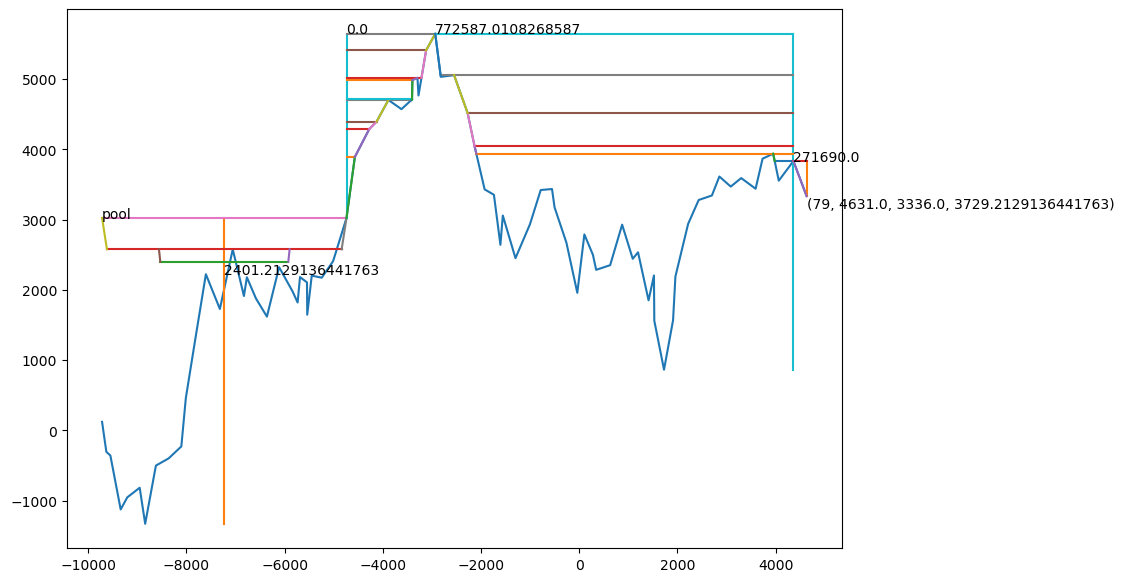

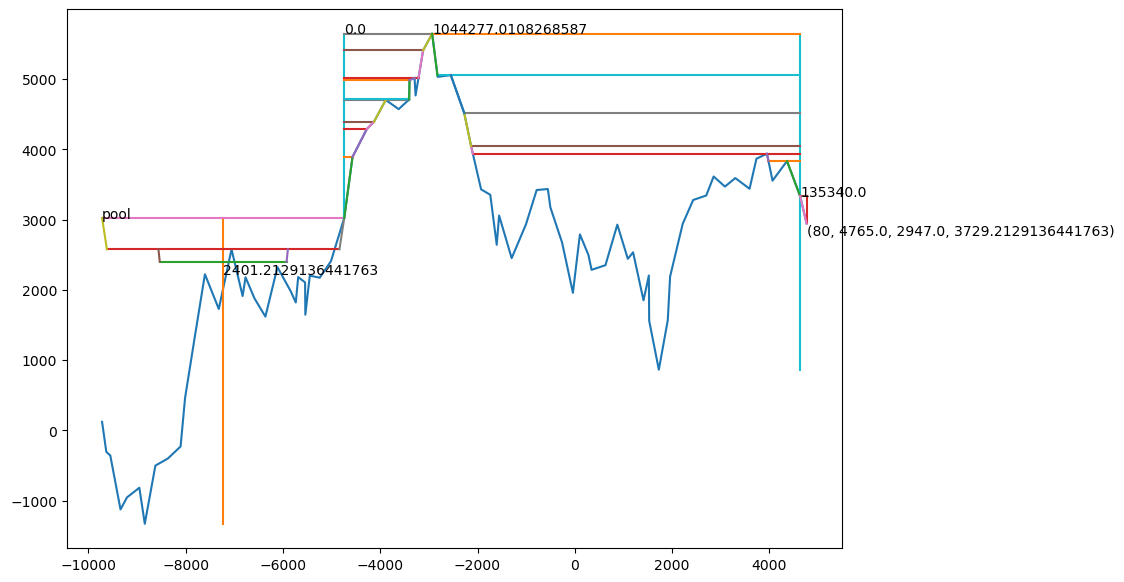

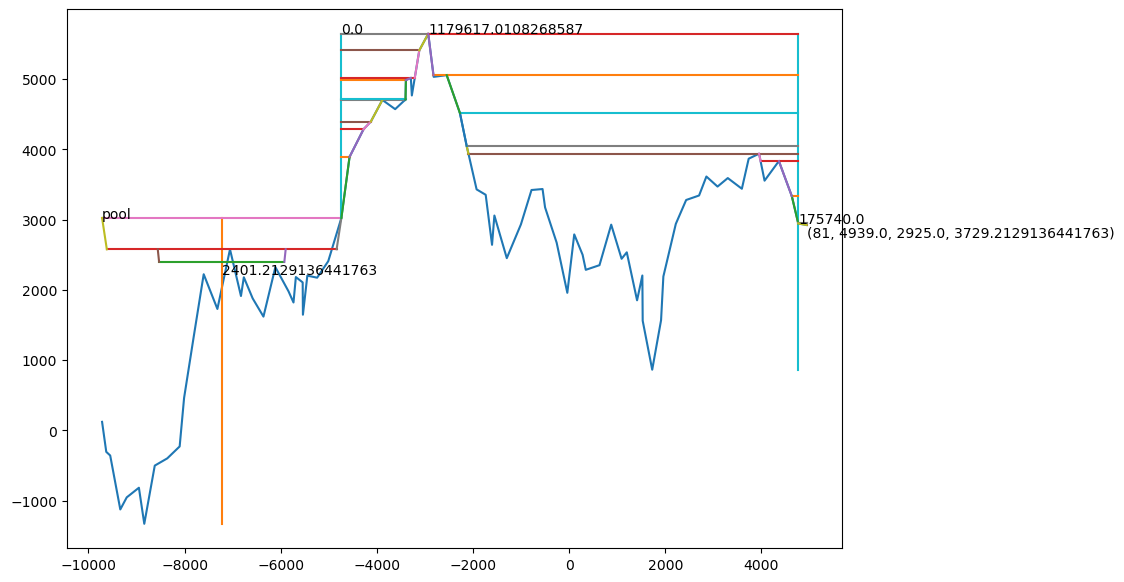

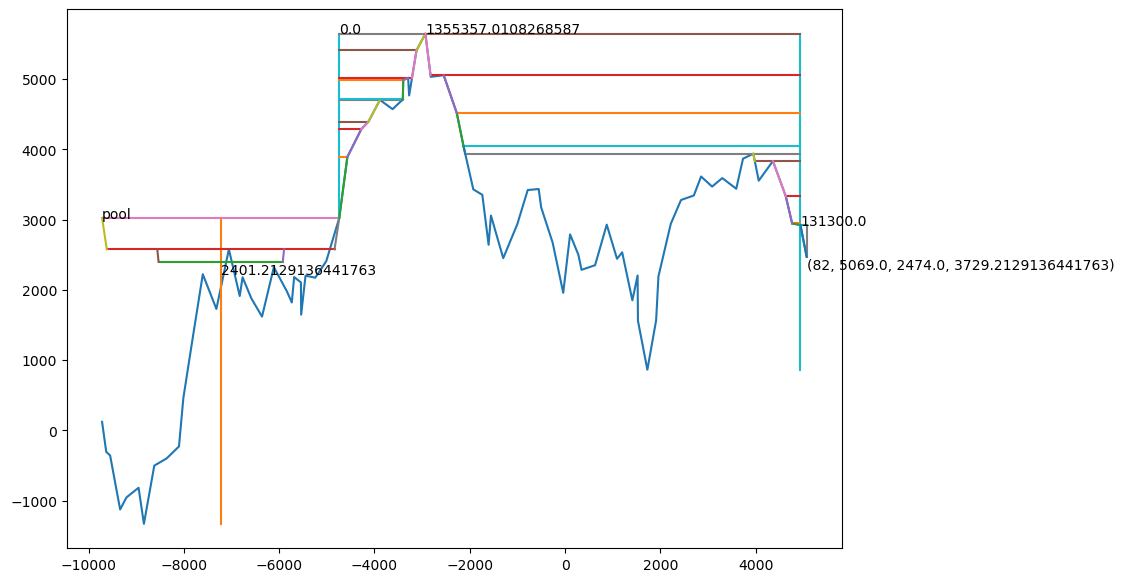

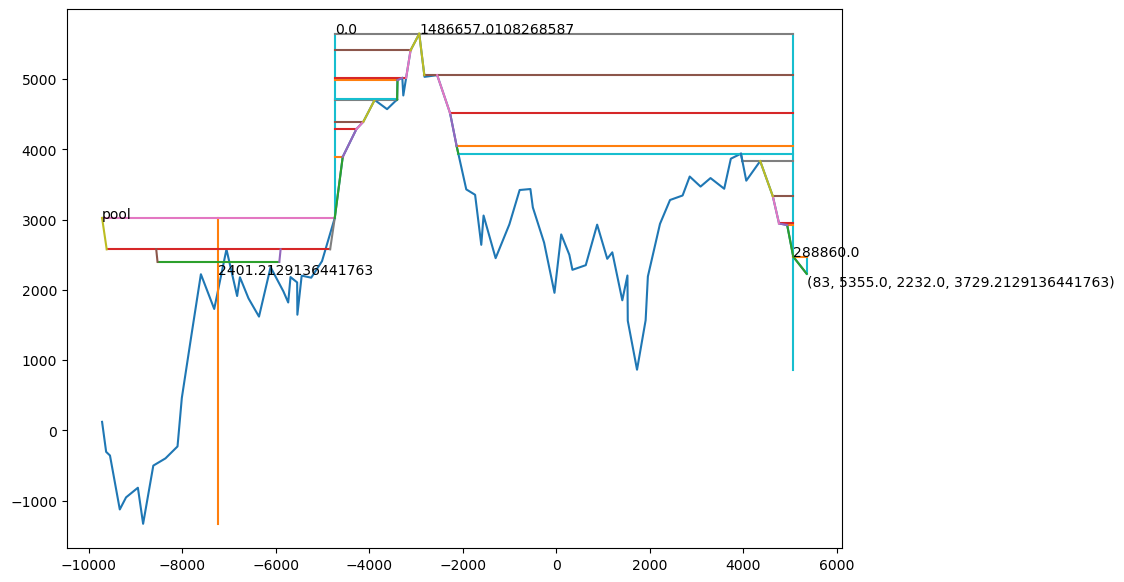

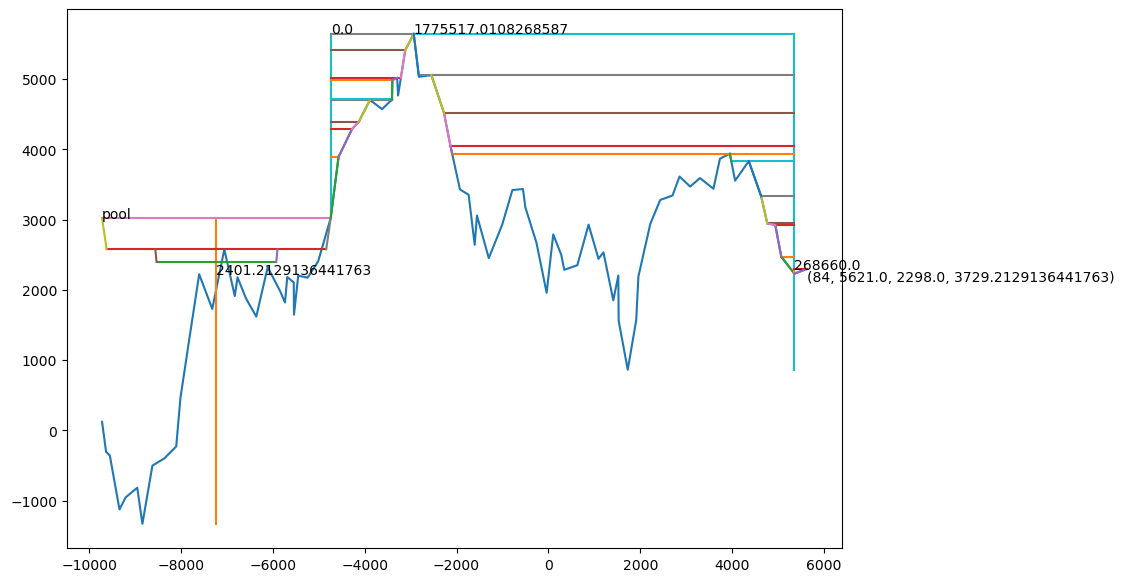

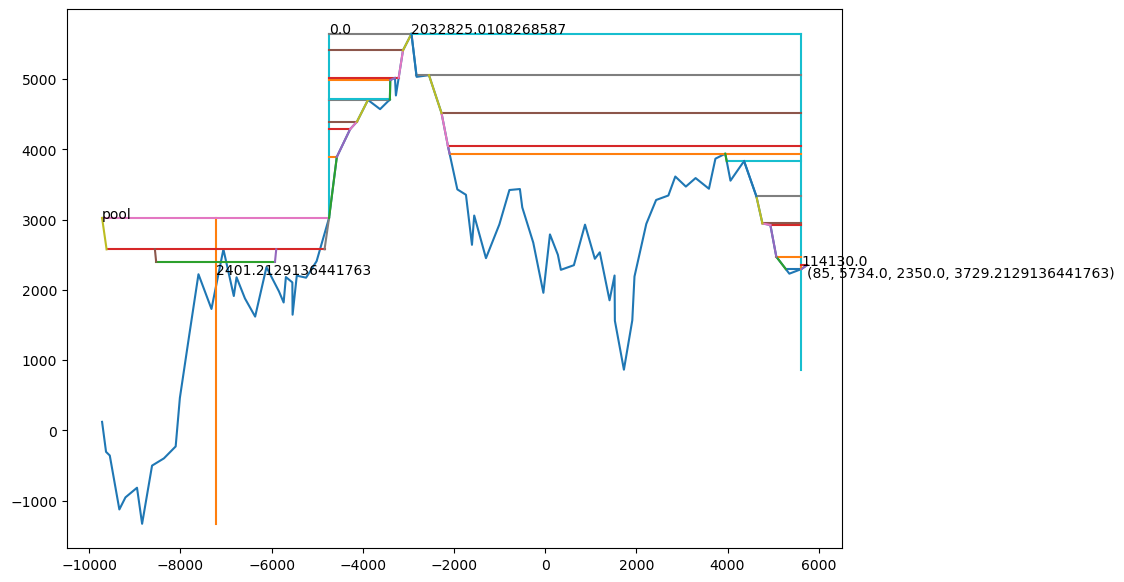

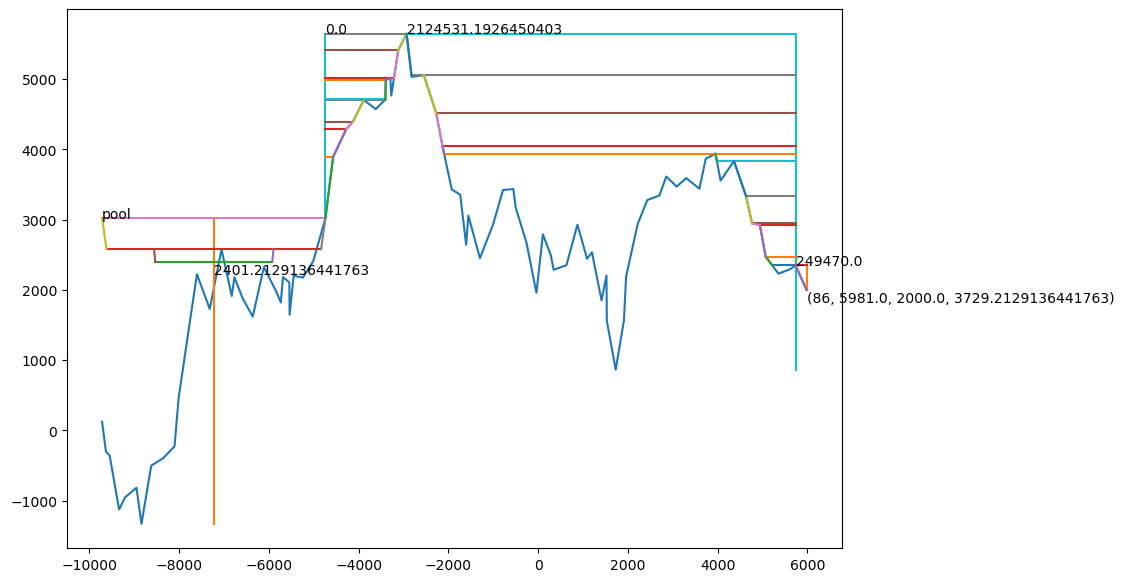

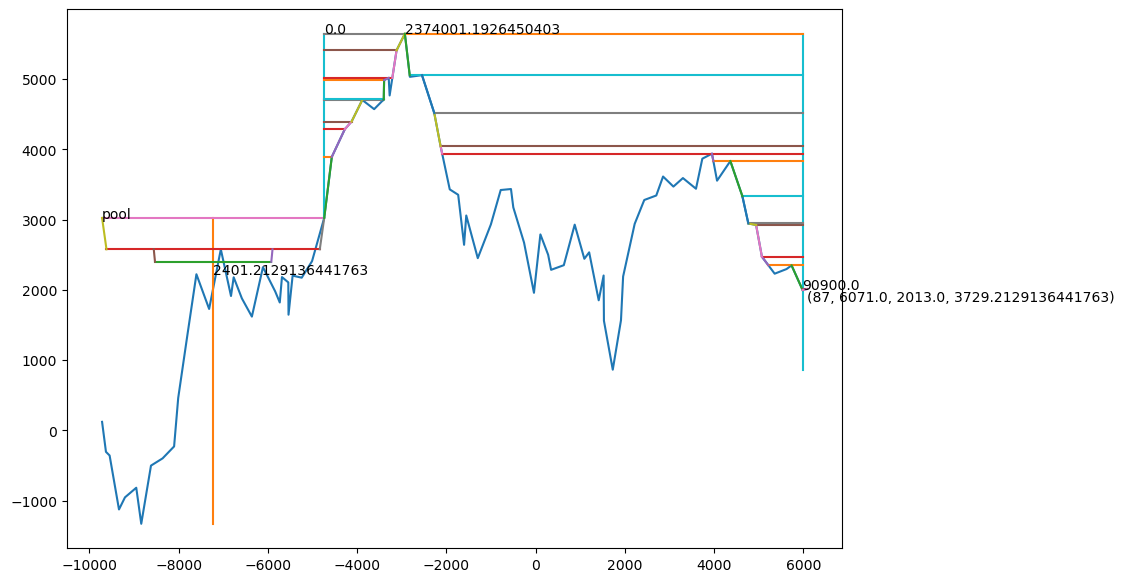

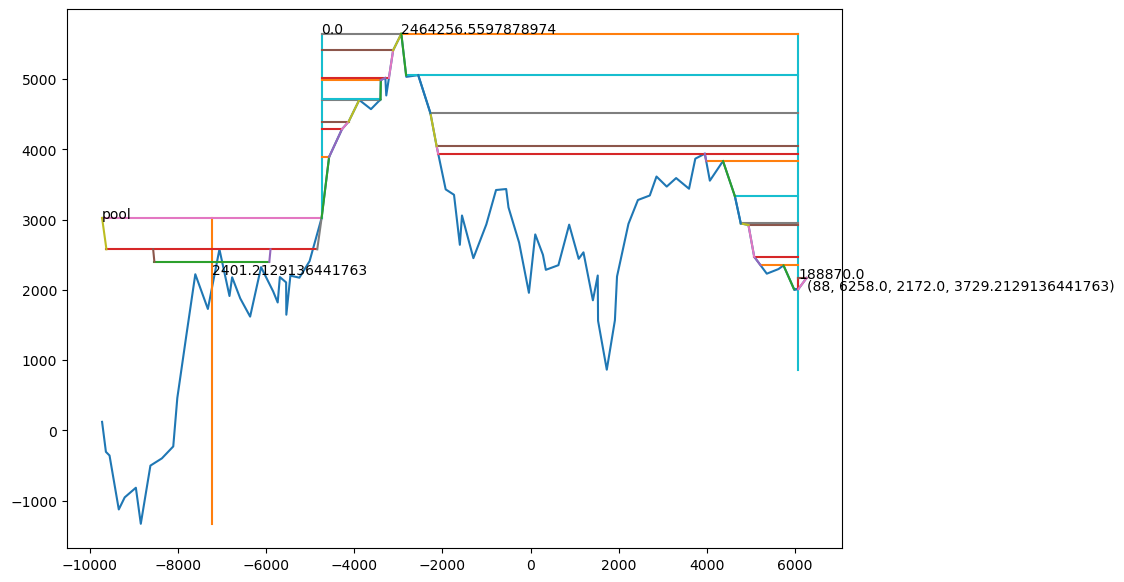

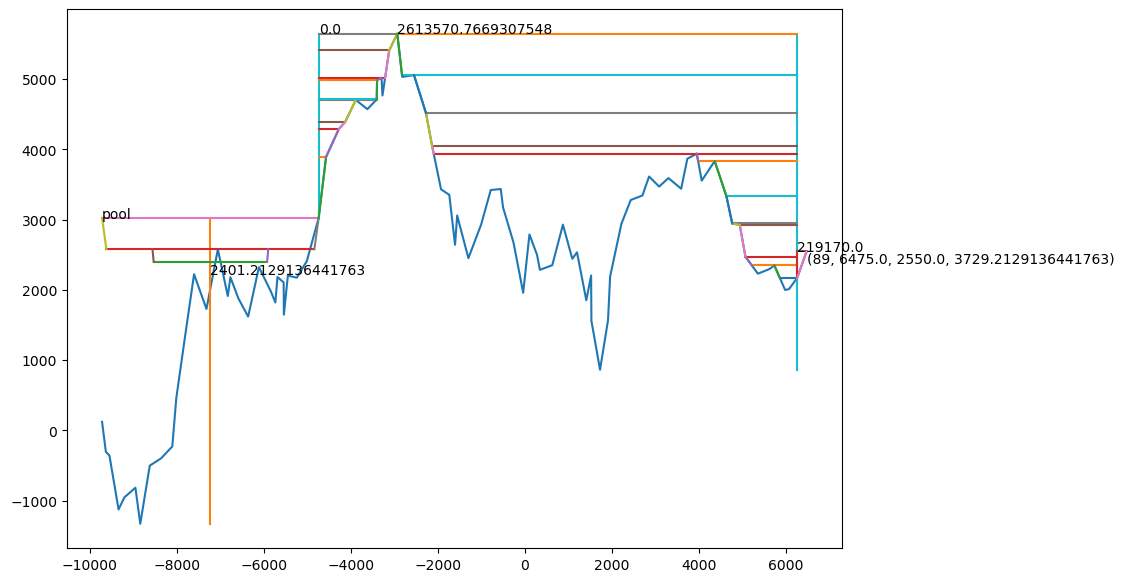

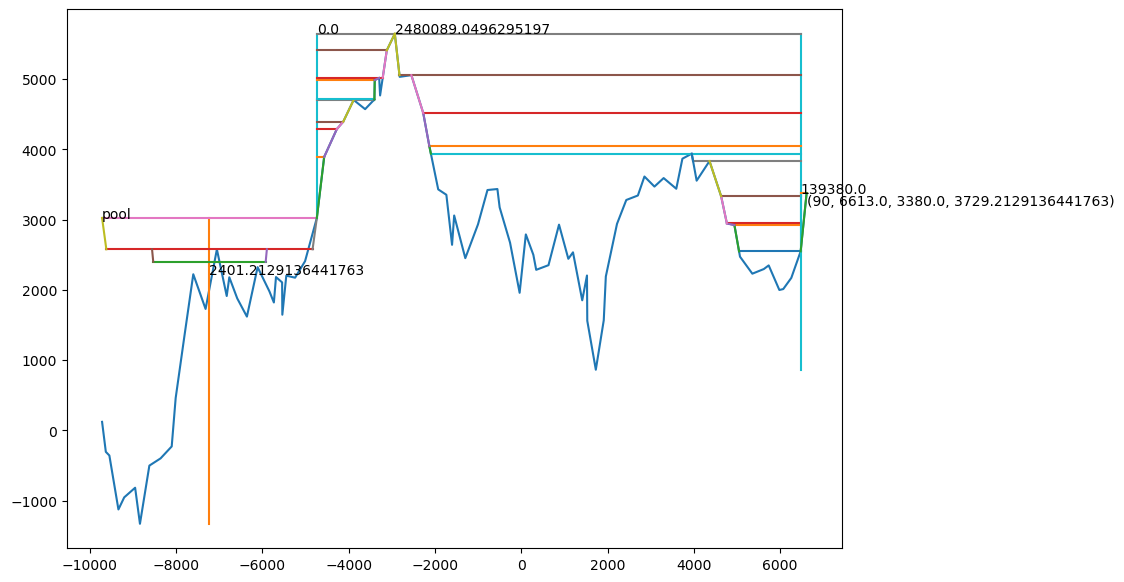

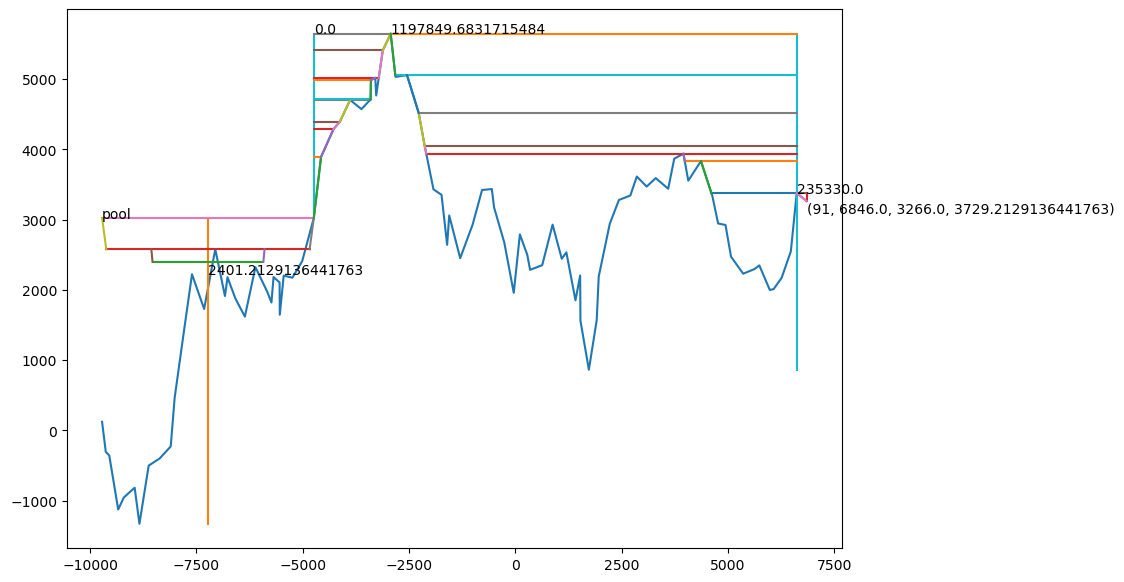

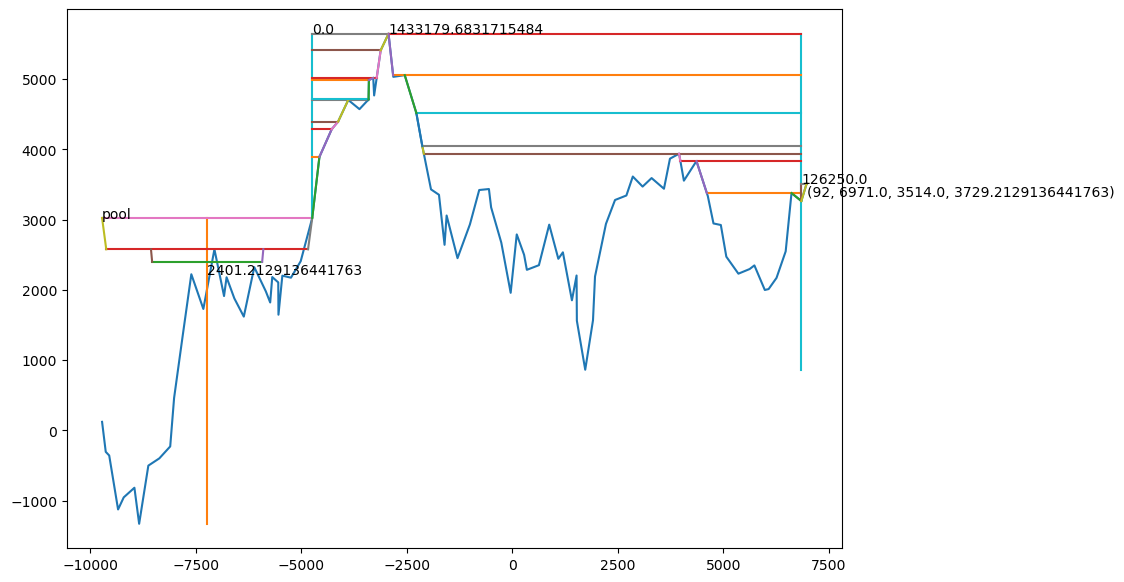

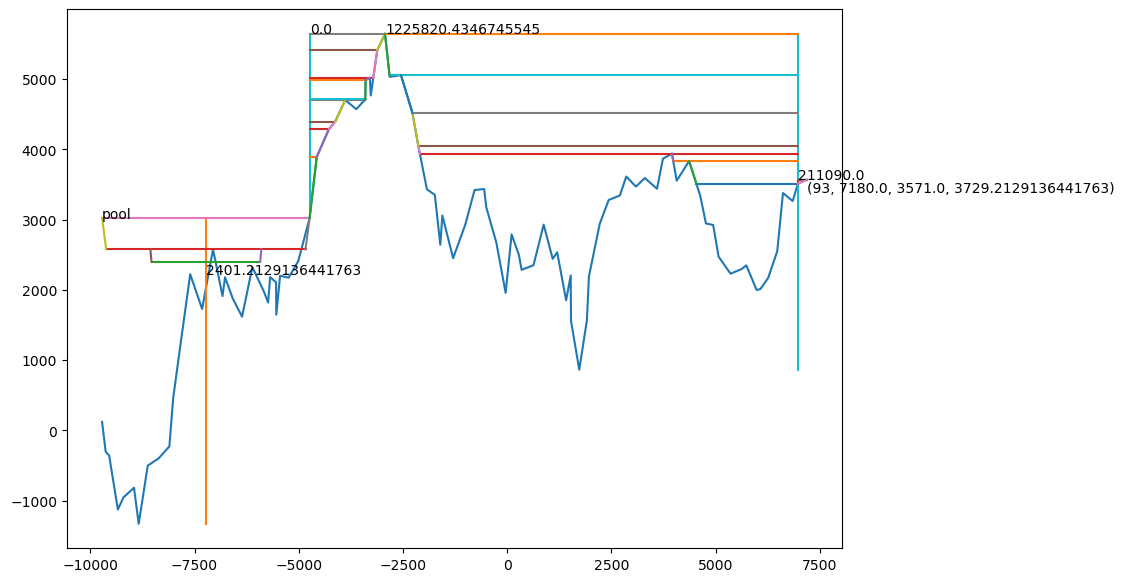

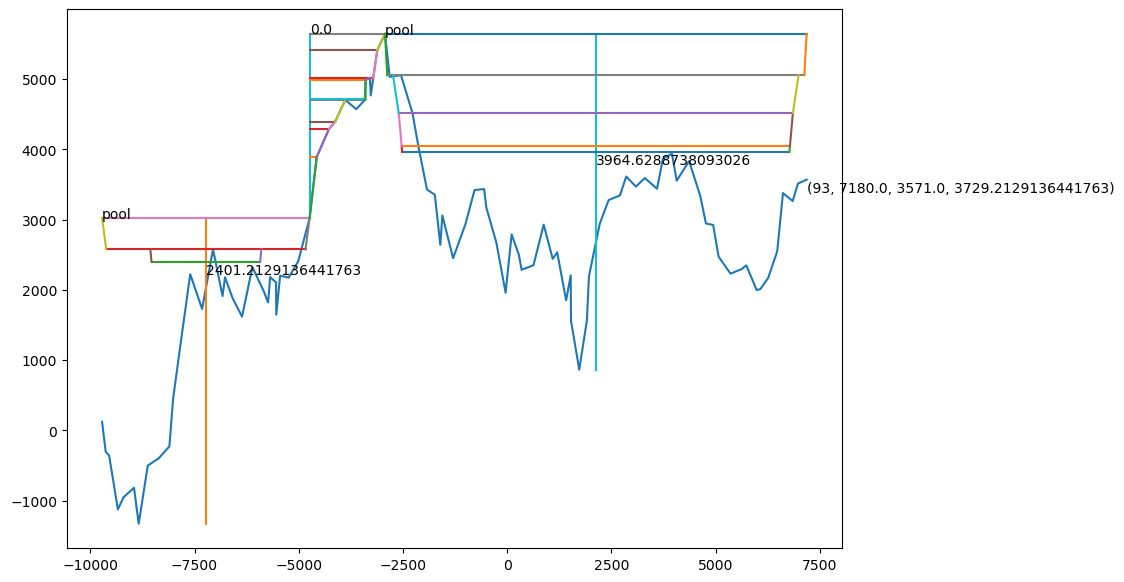

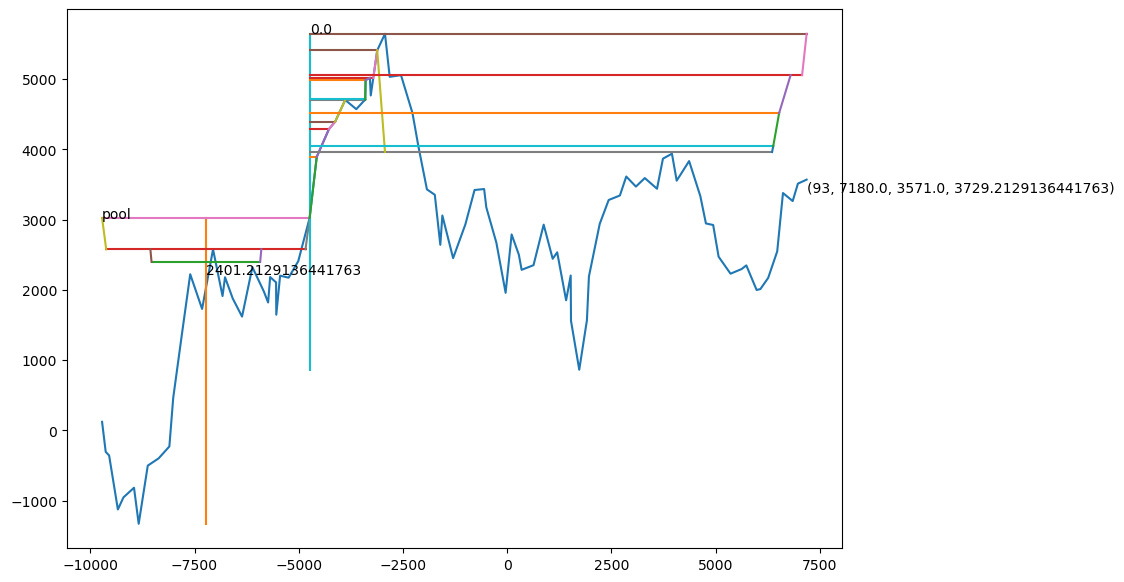

In [7]:
debug = True

from math import sqrt

class AttrDict(dict):
	def __getattr__(self, key):
		if key not in self:
			raise AttributeError(key) # essential for testing by hasattr
		return self[key]
	def __setattr__(self, key, value):
		self[key] = value
	def __repr__(self):
		return 'mkdict('+', '.join(k+'='+(f'{v:.4}' if type(v) is float else repr(v)) for k,v in self.items())+')' 
		# если встретиться ключ, который не является строкой, то будет исключение
def make_dict(**kwargs):
	return AttrDict(kwargs)

F = open("input.txt", "r")
N,V = F.readline().split()
N = int(N)
Dens = float(V)

best_H = 0

Pools = []

leftx,lefty = map(float,F.readline().split())
XX = [leftx]
YY = [lefty]
most_left = leftx

def fill_pool(pool,V):
	# заполняет бассейн, обновляет best_H
	if debug: print('fill_pool',V)
	assert pool.type=='pool'
	lvls = pool.lvls
	while len(lvls)>=2 and V>0.:
		a = lvls[0].maxl
		b = lvls[1].minl
		assert b>a
		hmax = lvls[1].h-lvls[0].h
		k = hmax/(b-a)
		dh = -a*k+sqrt(a*a*k*k + 2*V*k)
		global filledV
		if dh>=hmax:
			dV = (a+b)*hmax/2 
			filledV+=dV
			V-= dV
			if debug: print('fill',lvls[0],lvls[1],dV)
			del lvls[0]
		else:
			b = a+dh/k
			filledV+=(a+b)*dh/2
			assert V-(a+b)*dh/2 < 0.00000001 , V-(a+b)*dh/2
			a+=dh/k
			p = lvls[0].h
			q = lvls[0].minl
			r = lvls[0].maxl
			lvls[0].h+=dh
			lvls[0].minl = lvls[0].maxl = a
			if debug: print('fill partial',[p,q,r],lvls[0],V)
			V=0.
	global best_H
	best_H = max(best_H,pool.lvls[0].h-pool.bottom)
	return V
def extend_to(stok,L):
	for lvl in stok.lvls:
		lvl.minl+=L
		lvl.maxl+=L
def merge_toto(bot,top):
	# объединяет два подряд идущих стока
	# верхний расширить нижним и соединить
	# обновить bottom
	# объединить объёмы
	extend_to(top,bot.lvls[-1].maxl)
	top.lvls[0].minl = bot.lvls[-1].minl
	bot.lvls.pop()
	bot.lvls+=top.lvls
	bot.bottom = min(bot.bottom,top.bottom)
	bot.overvol += top.overvol
	return bot
def make_pool(lr,rl):
	lb,rb = lr.bottom, rl.bottom
	llvls = lr.lvls
	rlvls = rl.lvls
	assert llvls[0].h==rlvls[0].h , (llvls[0].h,rlvls[0].h)
	h0 = llvls[0].h
	lminl = llvls[0].minl
	lmaxl = llvls[0].maxl
	rminl = rlvls[0].minl
	rmaxl = rlvls[0].maxl
	del llvls[0]
	del rlvls[0]
	reslvls = [make_dict(h=h0,minl=lminl+rminl,maxl=lmaxl+rmaxl)]
	while len(llvls) and len(rlvls):
		#print(h0,lminl,lmaxl,rminl,rmaxl)
		if llvls[0].h<rlvls[0].h:
			h1 = llvls[0].h
			h2 = rlvls[0].h
			a = rmaxl
			b = rlvls[0].minl
			assert b>a
			l = a+ (b-a)*(h1-h0)/(h2-h0)
			h0 = h1
			lminl = llvls[0].minl
			lmaxl = llvls[0].maxl
			rminl = l
			rmaxl = l
			reslvls.append(make_dict(h=h1,minl=lminl+l,maxl=lmaxl+l))
			del llvls[0]
		else:
			h1 = rlvls[0].h
			h2 = llvls[0].h
			a = lmaxl
			b = llvls[0].minl
			assert b>a
			l = a+ (b-a)*(h1-h0)/(h2-h0)
			h0 = h1
			lminl = l
			lmaxl = l
			rminl = rlvls[0].minl
			rmaxl = rlvls[0].maxl
			reslvls.append(make_dict(h=h1,minl=rminl+l,maxl=rmaxl+l))
			del rlvls[0]
	#print('h0=',h0,lminl,lmaxl,rminl,rmaxl)
	#print(f'{reslvls=}')
	assert len(llvls) or len(rlvls)
	if len(rlvls):
		extend_to(rl,-rmaxl)
		rlvls.insert(0,make_dict(h=h0,minl=0.,maxl=0.))
		lr.lvls = reslvls
		lr.type = 'pool'
	else:
		extend_to(lr,-lmaxl)
		llvls.insert(0,make_dict(h=h0,minl=0.,maxl=0.))
		rl.lvls = reslvls
		rl.type = 'pool'
	lr.bottom = rl.bottom = min(lr.bottom, rl.bottom)
	#if debug: print('make_pool',lb,rb,lr.bottom, rl.bottom)
	return lr,rl

if debug:
	print()
	print('add zero section',leftx,lefty)
	import matplotlib.pyplot as plt
i=0
watchdog = 0
droppedV = 0.
filledV = 0.
while True:
	if debug:
		print(':::::::')
		print('outer cycle',len(Pools),i)
		#for pool in Pools:
		#	print(pool)
	if i<N:
		rightx,righty = map(float,F.readline().split())
		XX.append(rightx)
		YY.append(righty)
		most_right = rightx
		assert rightx>leftx
		curlen = rightx-leftx
		curV = curlen*Dens
		droppedV += curV
		#print('adding',i,curlen)
		if righty<lefty: # decrease
			Pools.append(make_dict(
				type='toright',
				lvls=[make_dict(h=righty,minl=0.,maxl=0.),make_dict(h=lefty,minl=curlen,maxl=curlen)],
				overvol=curV,
				bottom=righty
				))
		else: # increase
			Pools.append(make_dict(
				type='toleft',
				lvls=[make_dict(h=lefty,minl=0.,maxl=0.),make_dict(h=righty,minl=curlen,maxl=curlen)],
				overvol=curV,
				bottom=lefty
				))
		leftx,lefty = rightx,righty
		i+=1
		if debug:
			print('add one section',leftx,lefty)
	else:
		pool = Pools.pop()
		if pool.type=='toright':
			#print(':::::::')
			if debug: print('do to right wall')
			pool.type='pool'
			V = pool.overvol
			# уровни остаются теми же
			pool.overvol = 0.
			V = fill_pool(pool,V) # 
			if V>0.:
				if debug: print('do wall (pool) to right')
				pool.type = 'toleft'
				pool.overvol = V
			Pools.append(pool)
			watchdog+=1
			if watchdog>10:
				raise Exception()
		else:
			#print(':::::::')
			Pools.append(pool)
			break

	while True:
		if debug:
			print('inner cycle',len(Pools))

			plt.figure(figsize=(10,7))
			plt.plot(XX,YY)
			plt.annotate(str((i,rightx,righty,best_H)),xy=(rightx,righty-3/120*(max(YY)-min(YY))))
			pleft = most_left
			for pool in Pools:
				pright = pleft + pool.lvls[-1].maxl
				if pool.type=='toright':
					plt.annotate(str(pool.overvol),xy=(pleft,pool.lvls[-1].h))
					plt.plot([pright,pright],[pool.lvls[-1].h,pool.bottom])
					lvl0 = pool.lvls[0]
					plt.plot([pright,pright-lvl0.maxl],[lvl0.h,lvl0.h])
					px,py = pright-lvl0.maxl , lvl0.h
					for lvl in pool.lvls[1:]:
						plt.plot([pright,pright-lvl.maxl],[lvl.h,lvl.h])
						plt.plot([px,pright-lvl.minl],[py,lvl.h])
						px,py = pright-lvl.maxl , lvl.h
				elif pool.type=='toleft':
					plt.annotate(str(pool.overvol),xy=(pleft,pool.lvls[-1].h))
					plt.plot([pleft,pleft],[pool.lvls[-1].h,pool.bottom])
					lvl0 = pool.lvls[0]
					plt.plot([pleft,pleft+lvl0.maxl],[lvl0.h,lvl0.h])
					px,py = pleft+lvl0.maxl , lvl0.h
					for lvl in pool.lvls[1:]:
						plt.plot([pleft,pleft+lvl.maxl],[lvl.h,lvl.h])
						plt.plot([px,pleft+lvl.minl],[py,lvl.h])
						px,py = pleft+lvl.maxl , lvl.h
				elif pool.type=='pool':
					assert abs(pool.overvol)<0.0000001
					plt.annotate('pool',xy=(pleft,pool.lvls[-1].h))
					pc= (pright+pleft)/2
					plt.annotate(str(pool.lvls[0].h),xy=(pc,pool.lvls[0].h -3/120*(max(YY)-min(YY))))
					plt.plot([pc,pc],[pool.lvls[-1].h,pool.bottom])
					lvl0 = pool.lvls[0]
					plt.plot([pc-lvl0.maxl/2,pc+lvl0.maxl/2],[lvl0.h,lvl0.h])
					pxl,pxr,py = pc-lvl0.maxl/2,pc+lvl0.maxl/2 , lvl0.h
					for lvl in pool.lvls[1:]:
						plt.plot([pc-lvl.maxl/2,pc+lvl.maxl/2],[lvl.h,lvl.h])
						plt.plot([pxr,pc+lvl.minl/2],[py,lvl.h])
						plt.plot([pxl,pc-lvl.minl/2],[py,lvl.h])
						pxl,pxr,py = pc-lvl.maxl/2,pc+lvl.maxl/2 , lvl.h
				else:
					assert False
				pleft = pright
			#for pool in Pools:
			#	print(pool)

		assert len(Pools)!=0
		assert sum(pool.lvls[-1].maxl for pool in Pools) - (most_right - most_left)<0.000000001
		assert droppedV-filledV-sum(pool.overvol for pool in Pools) < 0.0000001 , droppedV-filledV-sum(pool.overvol for pool in Pools)
		pool = Pools.pop()

		if len(Pools)==0:
			if pool.type=='toright':
				if debug: print('do wall to right')
				Pools.append(pool)
			else: # toleft
				if debug: print('do wall to left')
				pool.type='pool'
				V = pool.overvol
				# уровни остаются теми же
				pool.overvol = 0.
				V = fill_pool(pool,V) # 
				if V>0.:
					if i<N:
						if debug: print('do wall (pool) to right')
						pool.type = 'toright'
						pool.overvol = V
					else:
						pool.type = 'pool'
						pool.overvol = 0
						best_H += V/(most_right - most_left)
				Pools.append(pool)
			break # 
		else:
			if pool.type=='toright':
				if Pools[-1].type=='toright':
					if debug: print('do merge right right')
					Pools[-1] = merge_toto(pool,Pools[-1]) # нижний, верхний
				else:
					if debug: print('do right push back')
					Pools.append(pool)
				break
			else:
				two = pool
				one = Pools.pop()
				if one.type=='toleft':
					if debug: print('do merge left left')
					Pools.append(merge_toto(one,two))
				elif one.type=='pool': # pool-toleft
					V = fill_pool(one,two.overvol)
					two.overvol = 0.
					if V==0.:
						if debug: print('do (fill)pool left')
						Pools.append(one)
						Pools.append(two)
						break
					else:
						if debug: print('do (fill pool) left')
						extend_to(two,one.lvls[-1].maxl)
						two.overvol = V
						two.bottom = min(one.bottom,two.bottom)
						one.bottom = min(one.bottom,two.bottom)
						Pools.append(two)
				elif one.type=='toright': # toright-toleft
					if debug: print('do (make pool)')
					V = one.overvol+two.overvol
					one,two = make_pool(one,two) # overvol==0 in both
					#if debug:
					#	print(f'{one=}')
					#	print(f'{two=}')
					if two.type=='pool': # toright-pool
						V = fill_pool(two,V)
						if V==0.:
							if debug: print('do toright (fill)pool')
							one.overvol = 0.
							two.overvol = 0.
							Pools.append(one)
							Pools.append(two)
						else:
							if debug: print('do toright (fill pool)')
							extend_to(one,two.lvls[-1].maxl)
							one.overvol = V
							one.bottom = min(one.bottom,two.bottom)
							two.bottom = min(one.bottom,two.bottom)
							Pools.append(one)
							#if debug:
							#	for pool in Pools:
							#		print(pool)
							#	print()
						break
					else: # pool-toleft
						if debug: print('do pool toleft')
						one.overvol = 0.
						two.overvol = V
						Pools.append(one)
						Pools.append(two)
				else:
					assert False

if debug:
	print(':::::::')
	print('final:')
	for pool in Pools:
		print(pool)

print(best_H)
F.close()